In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('KNNAlgorithmDataset.csv')

In [3]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
df.shape

(569, 33)

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)

In [8]:
df.shape

(569, 31)

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

radius_mean: Skewness = 0.94 (Positive Skewness)


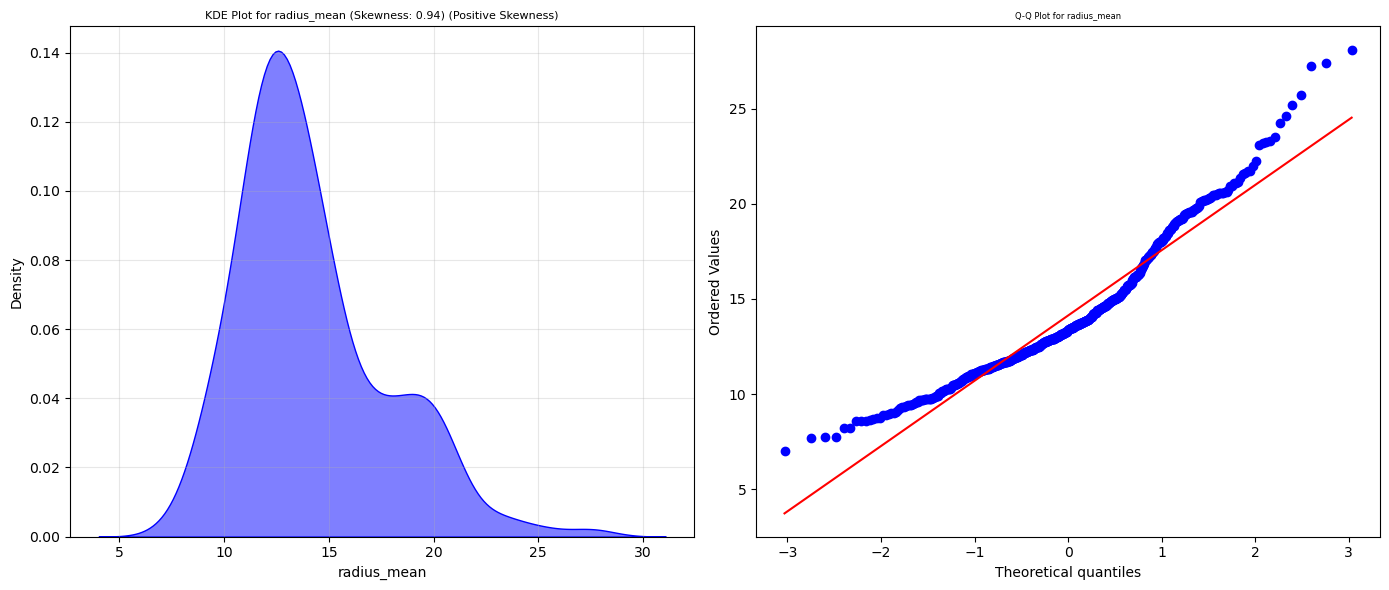

texture_mean: Skewness = 0.65 (Positive Skewness)


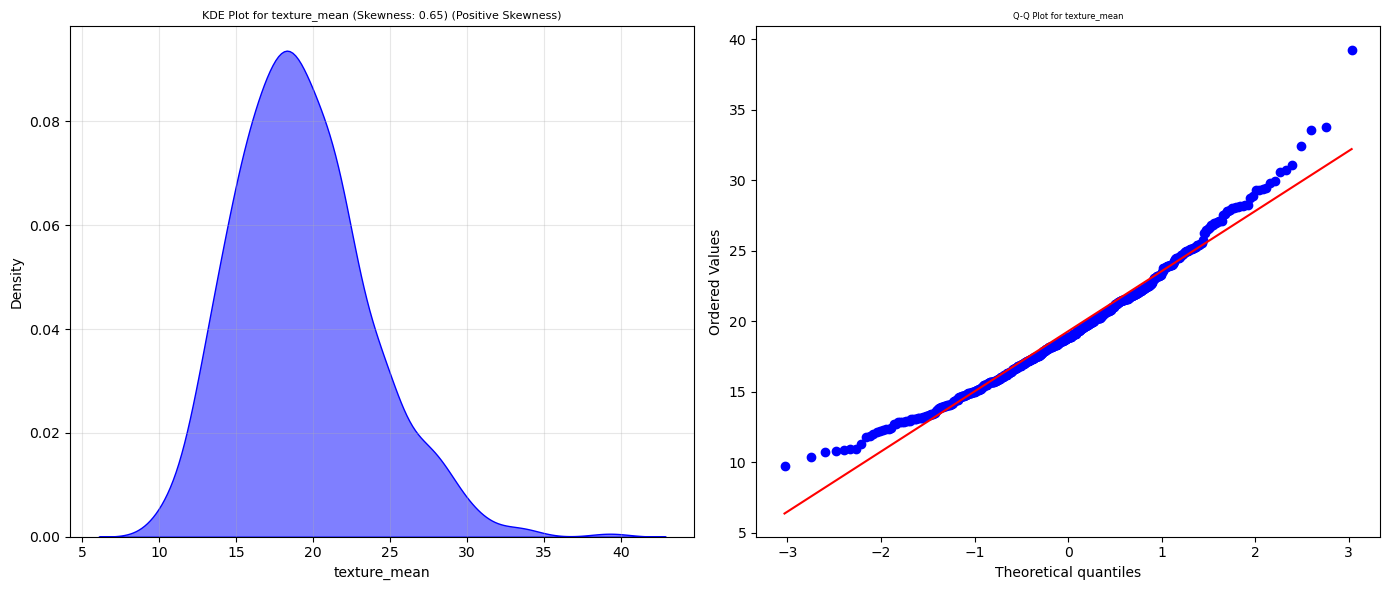

perimeter_mean: Skewness = 0.99 (Positive Skewness)


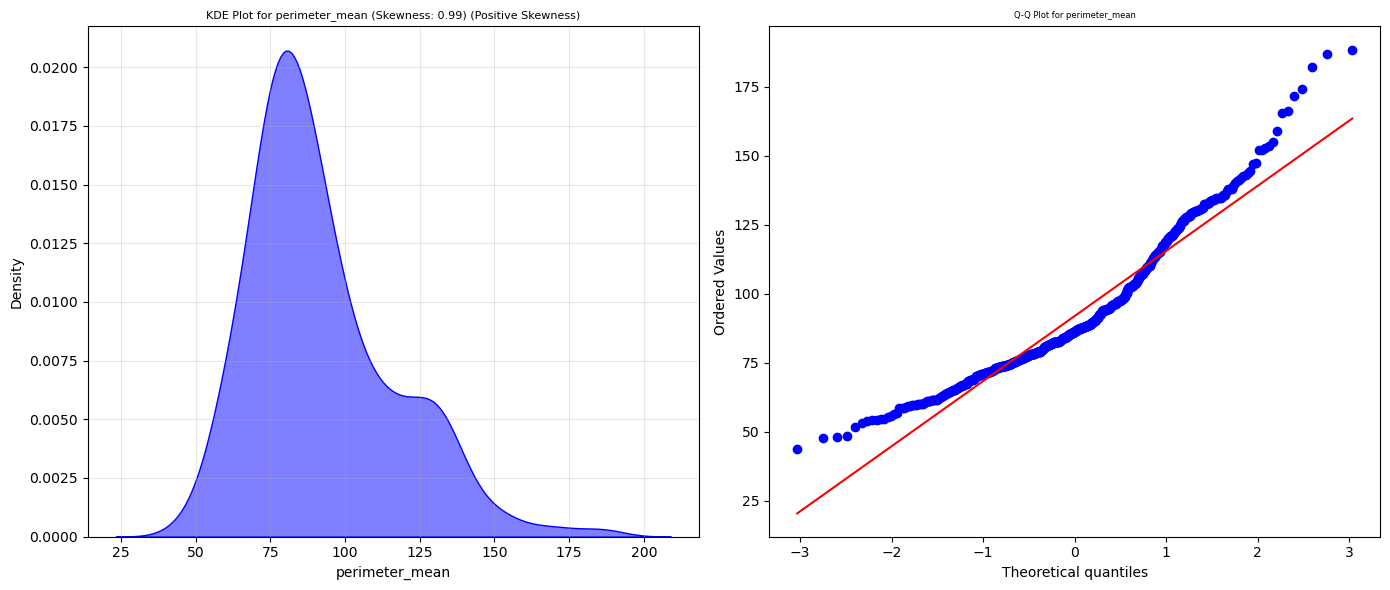

area_mean: Skewness = 1.65 (Positive Skewness)


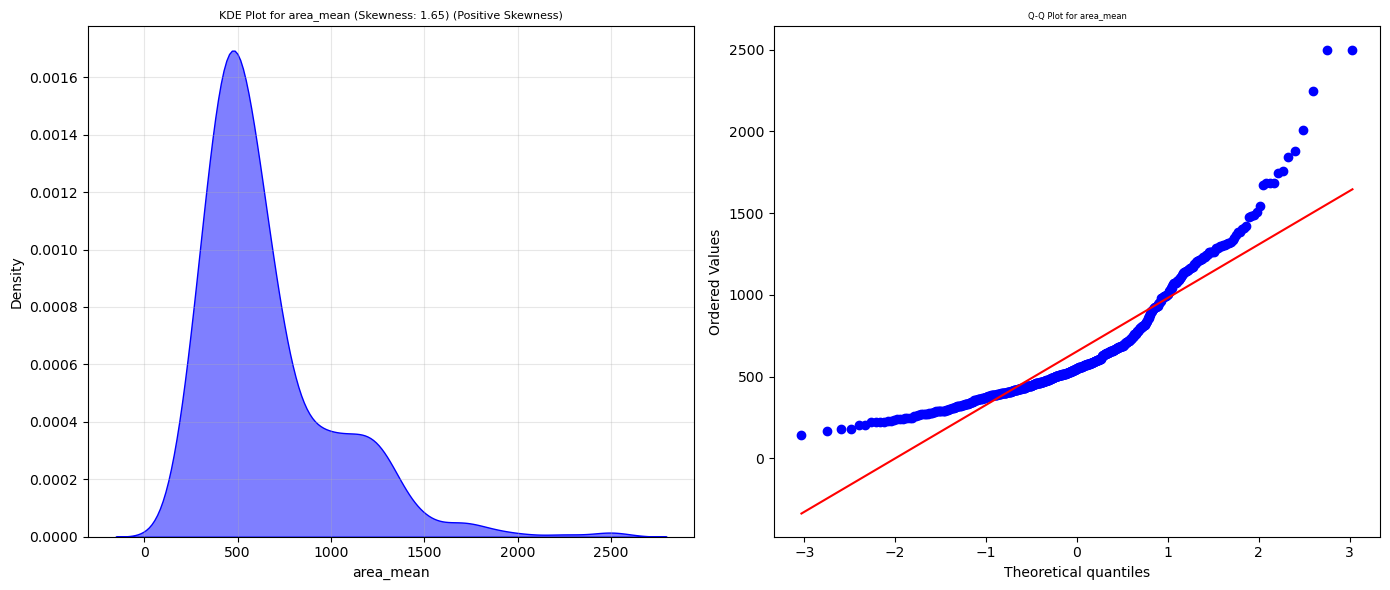

smoothness_mean: Skewness = 0.46 (Positive Skewness)


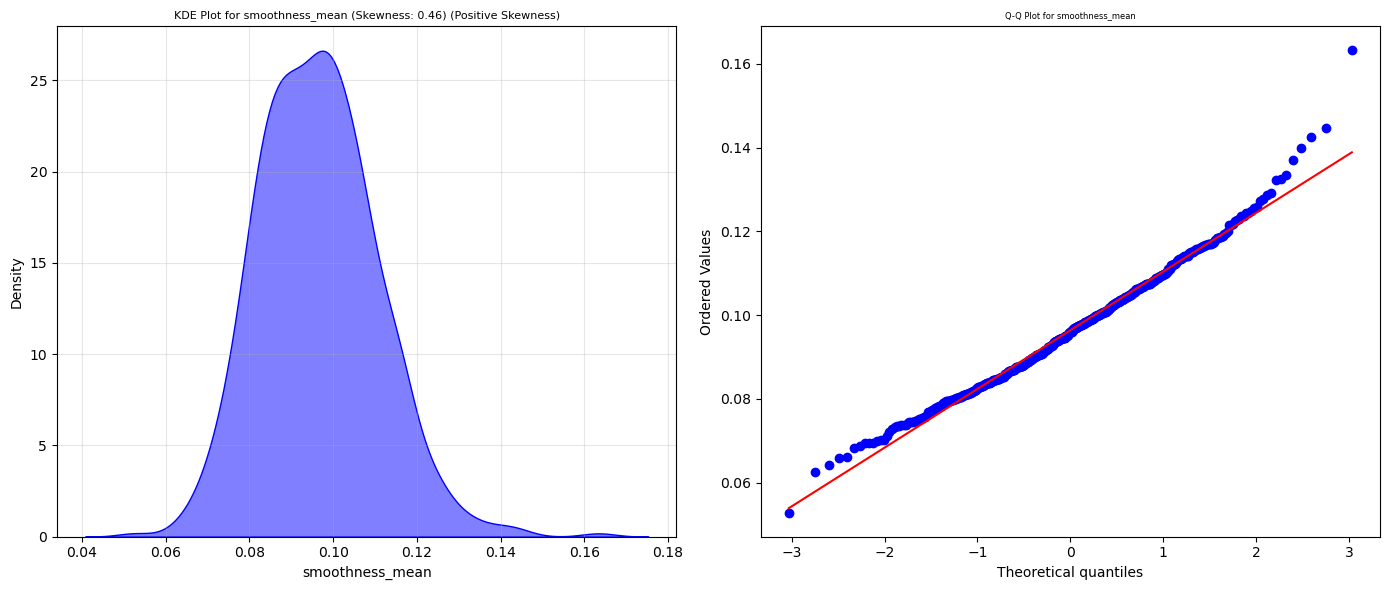

compactness_mean: Skewness = 1.19 (Positive Skewness)


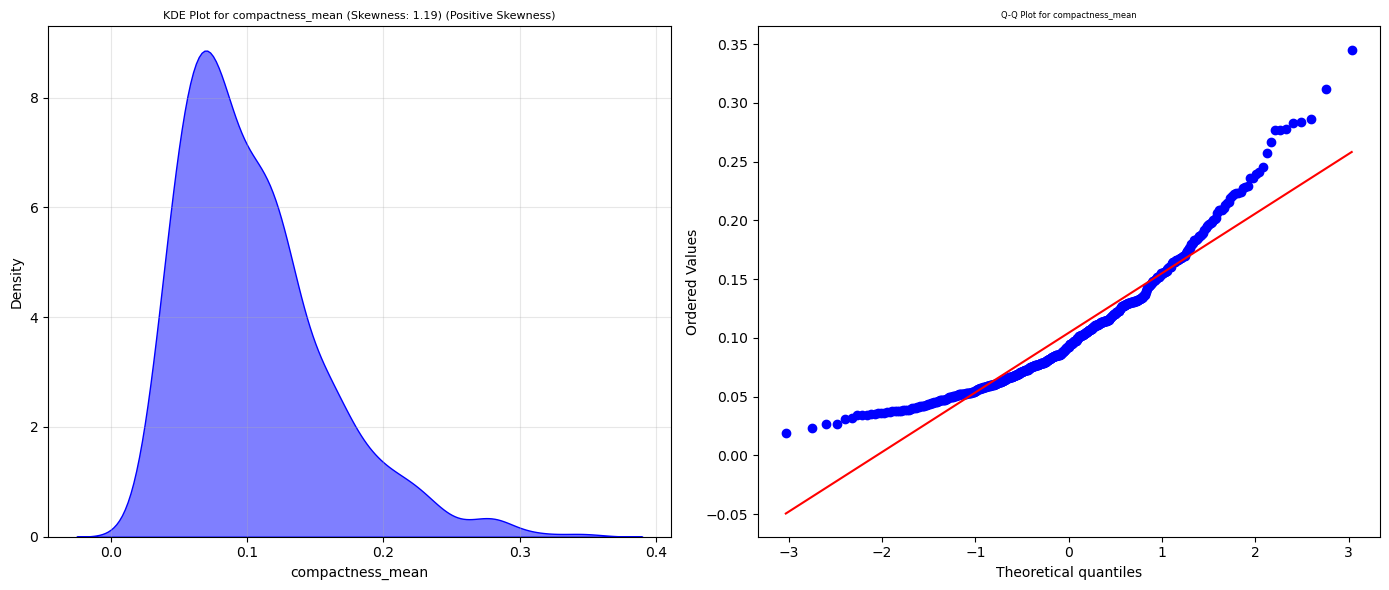

concavity_mean: Skewness = 1.40 (Positive Skewness)


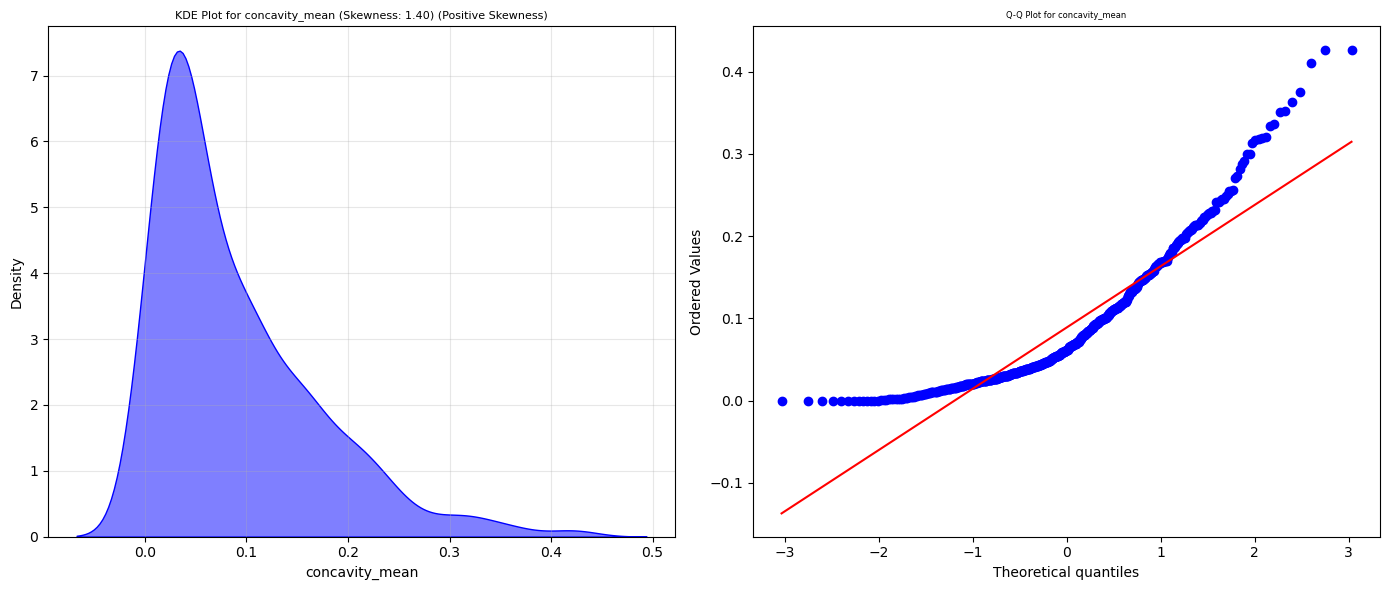

concave points_mean: Skewness = 1.17 (Positive Skewness)


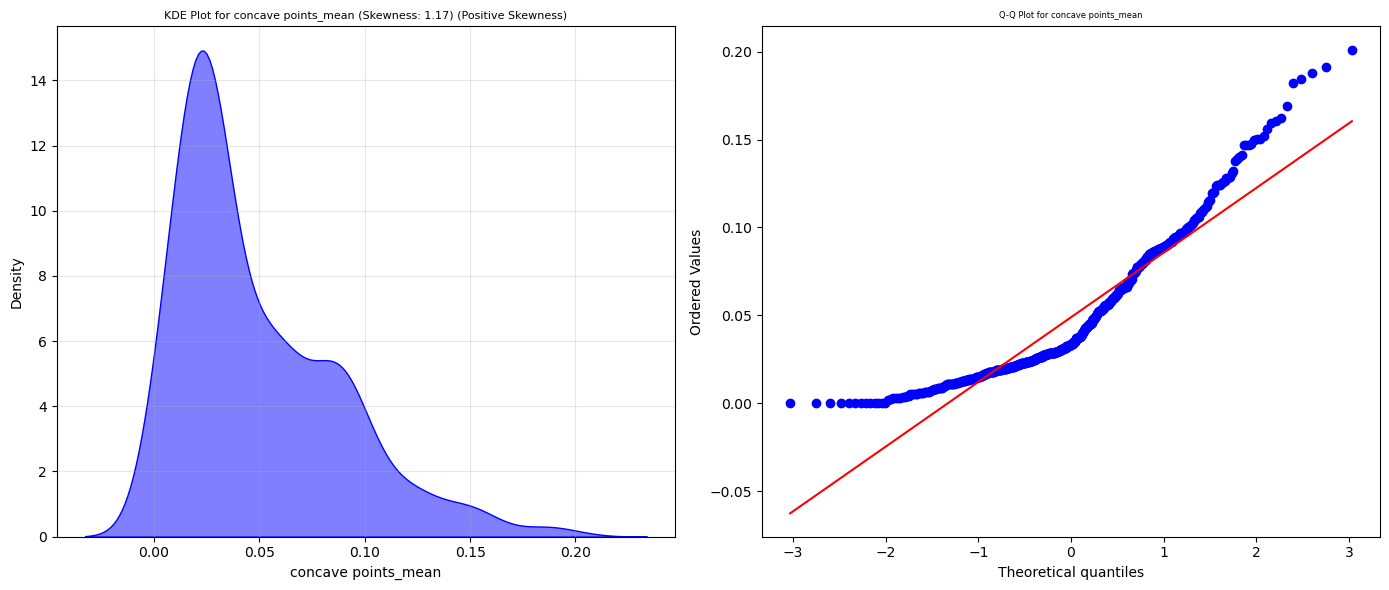

symmetry_mean: Skewness = 0.73 (Positive Skewness)


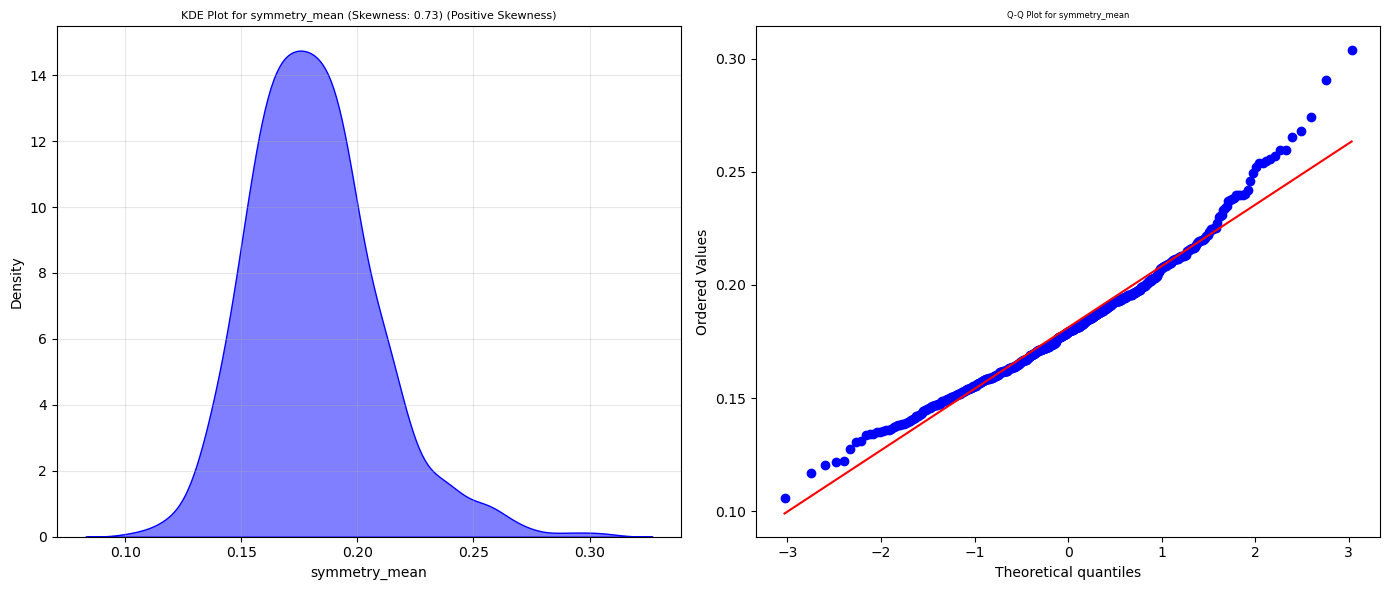

fractal_dimension_mean: Skewness = 1.30 (Positive Skewness)


radius_se: Skewness = 3.09 (Positive Skewness)


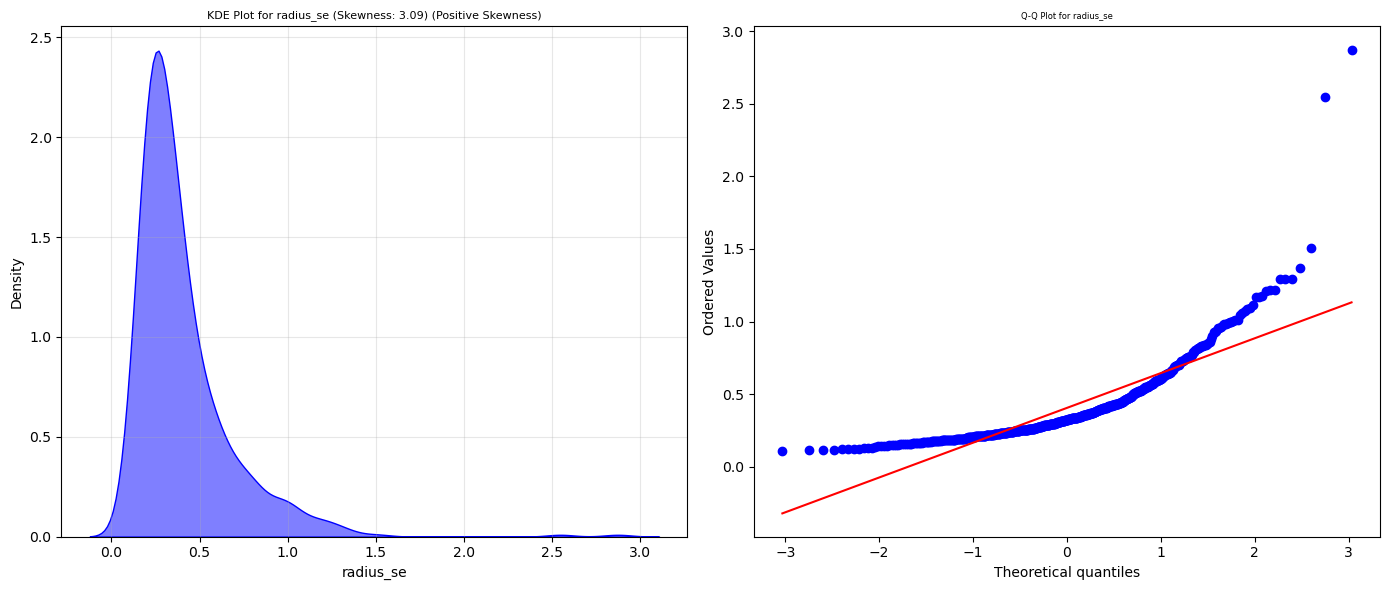

texture_se: Skewness = 1.65 (Positive Skewness)


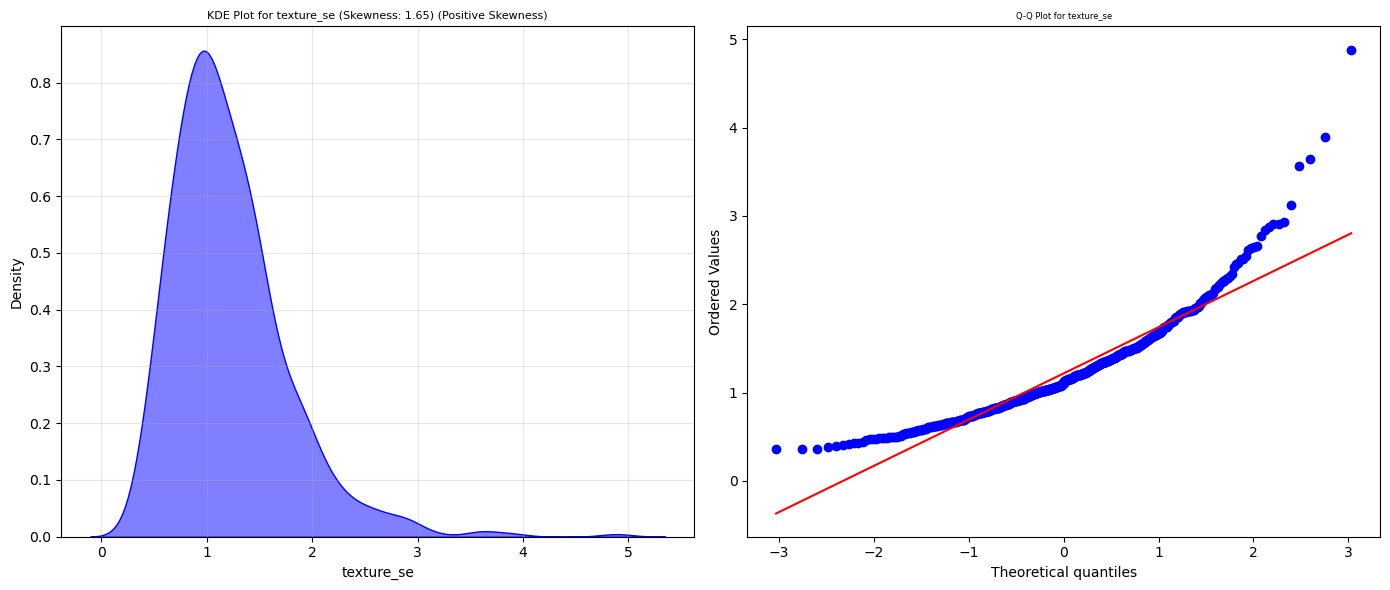

perimeter_se: Skewness = 3.44 (Positive Skewness)


area_se: Skewness = 5.45 (Positive Skewness)


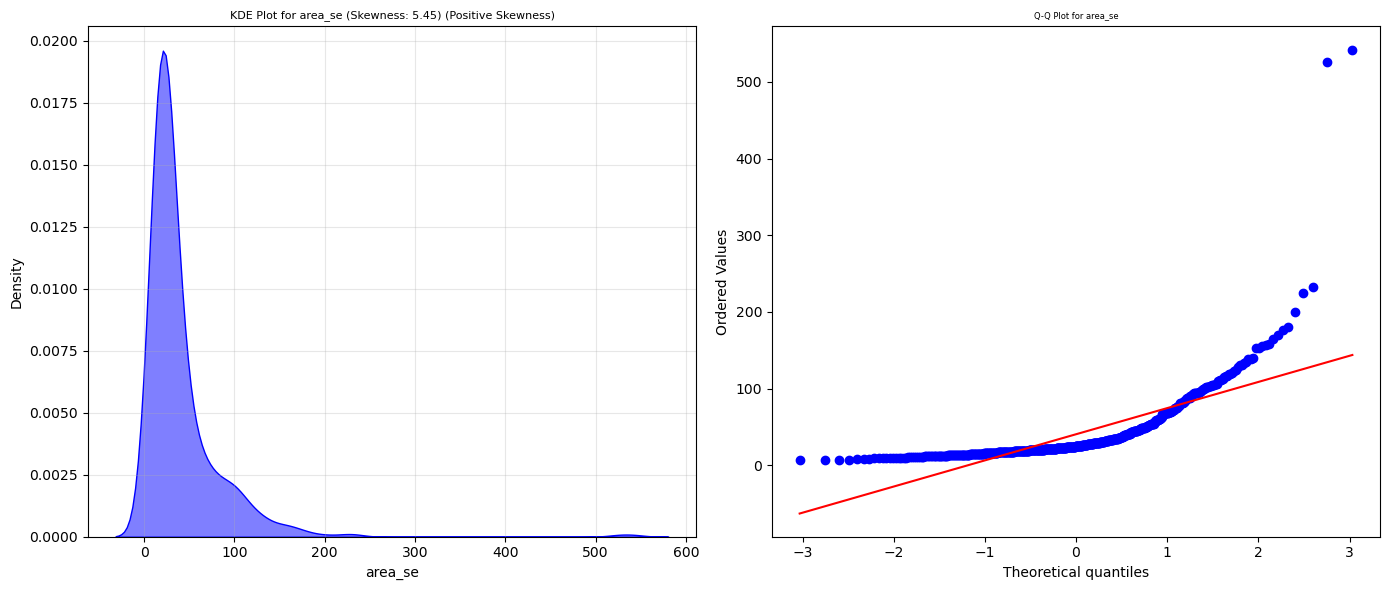

smoothness_se: Skewness = 2.31 (Positive Skewness)


compactness_se: Skewness = 1.90 (Positive Skewness)


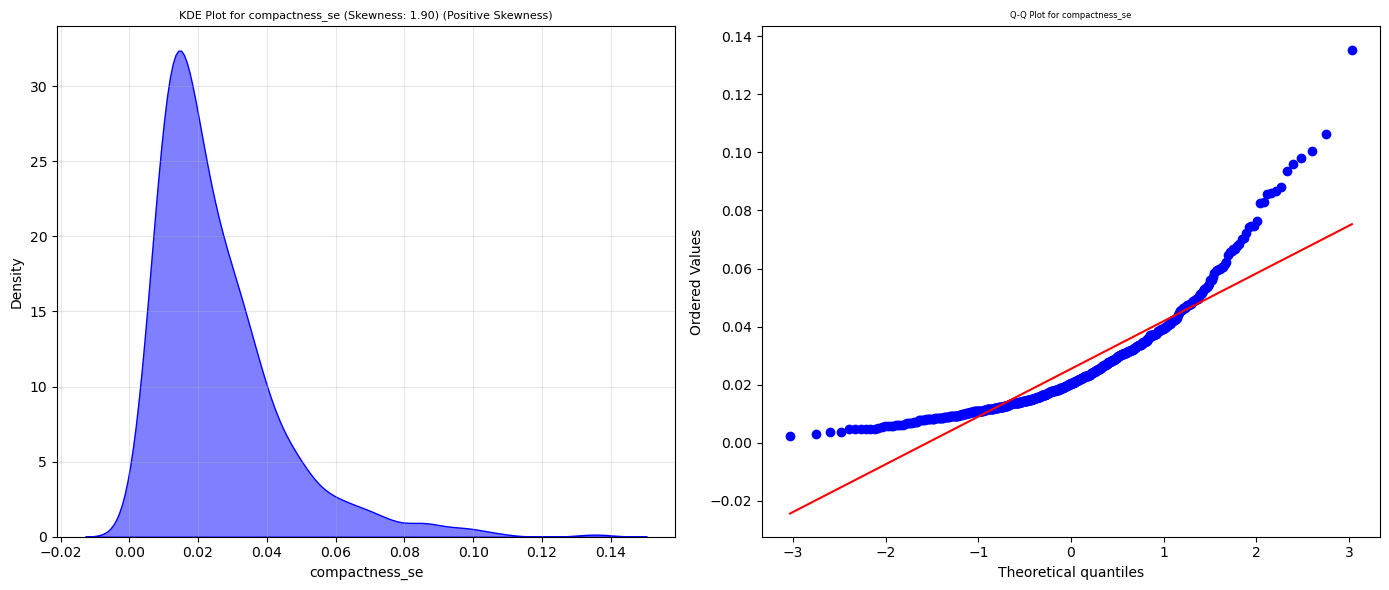

concavity_se: Skewness = 5.11 (Positive Skewness)


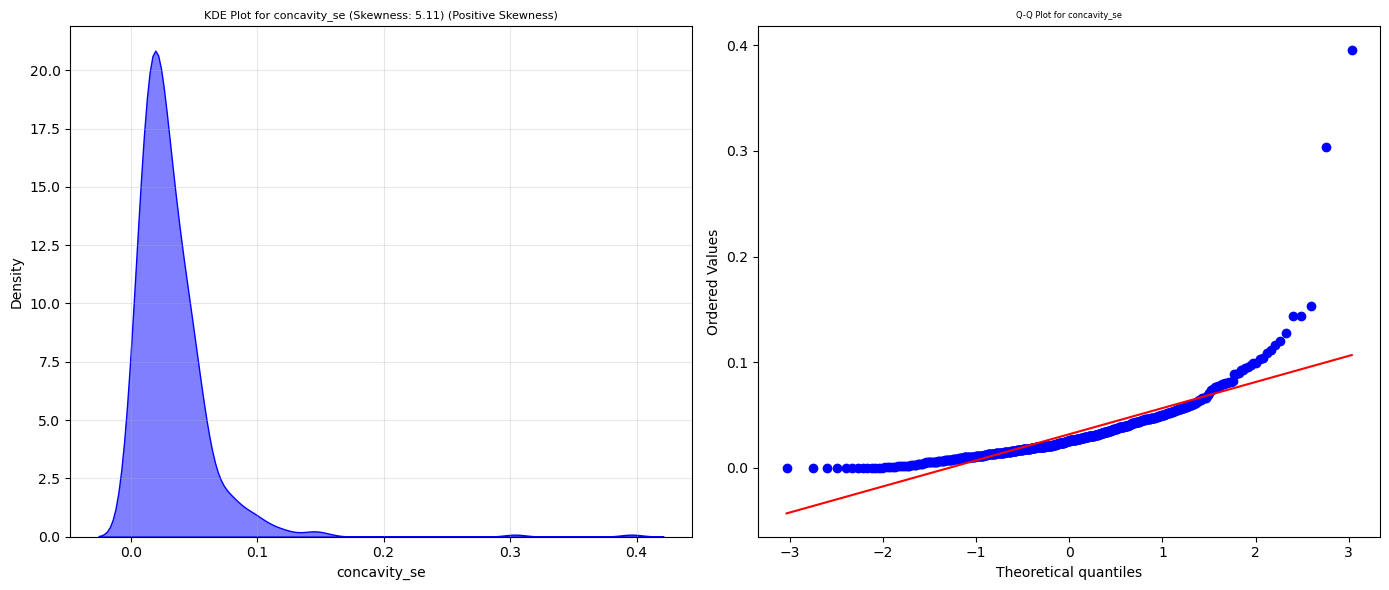

concave points_se: Skewness = 1.44 (Positive Skewness)


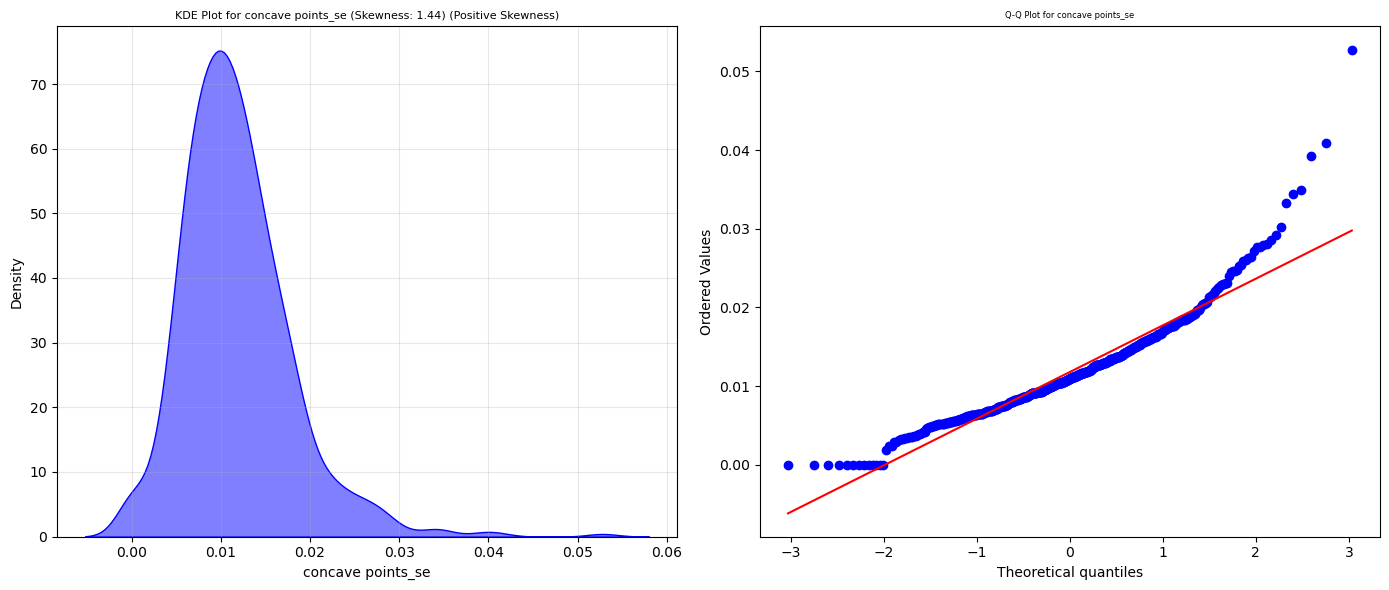

symmetry_se: Skewness = 2.20 (Positive Skewness)


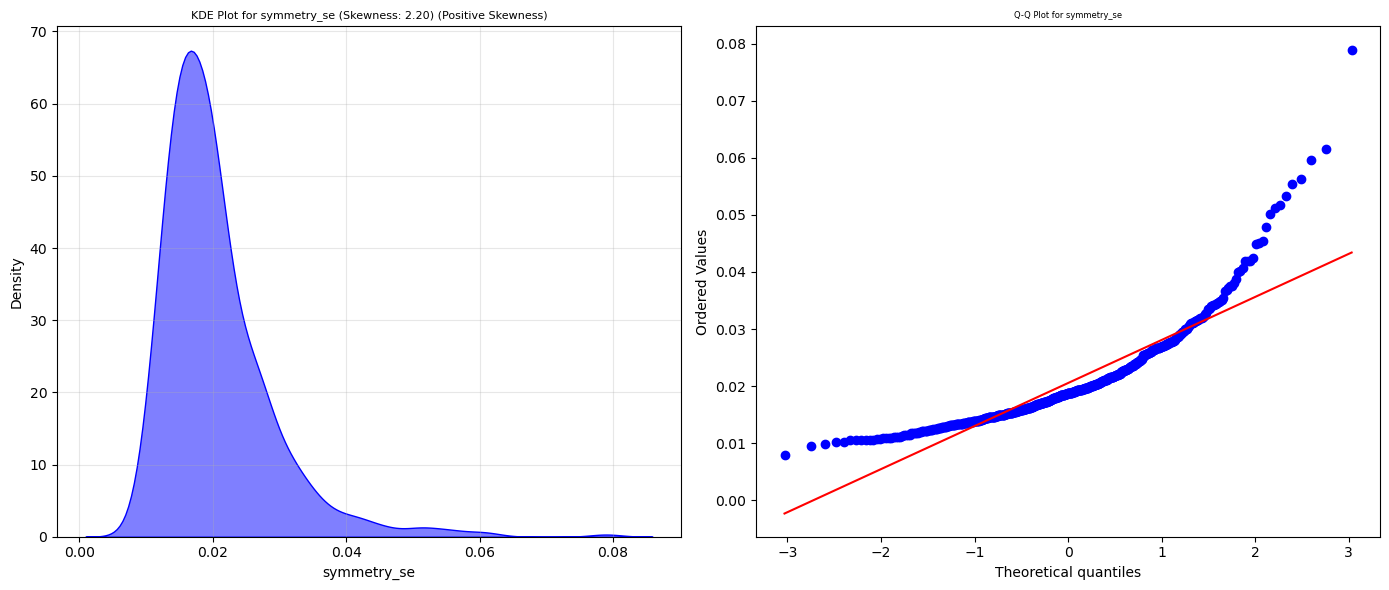

fractal_dimension_se: Skewness = 3.92 (Positive Skewness)


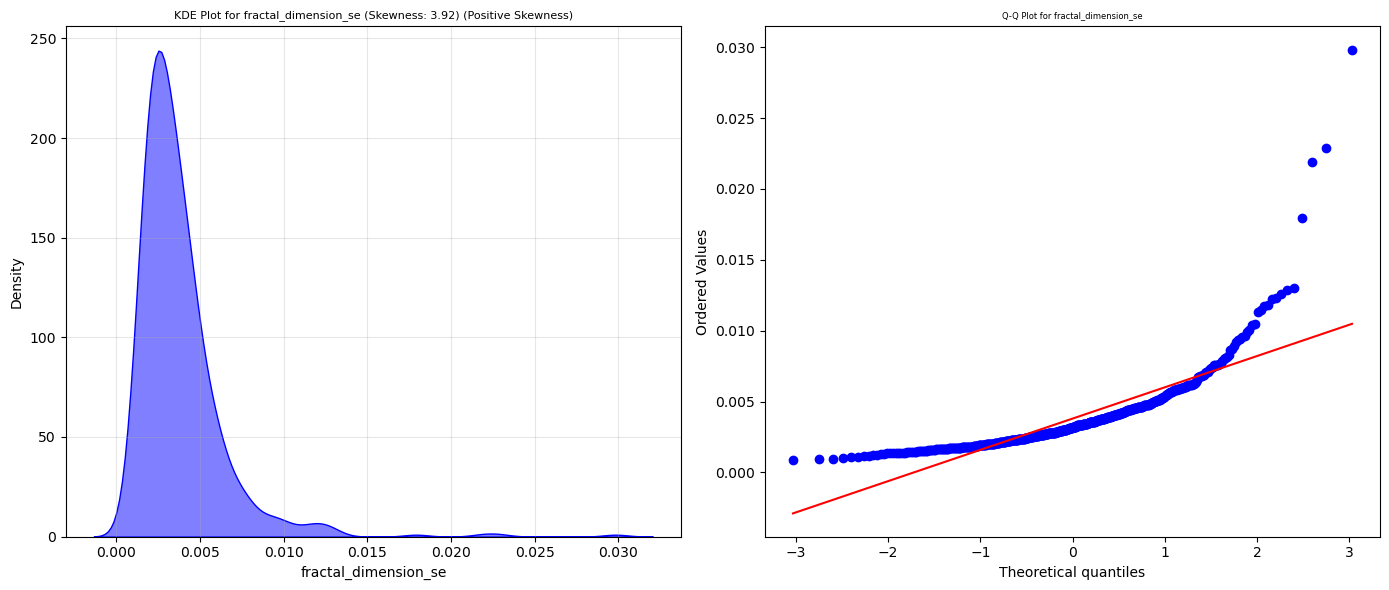

radius_worst: Skewness = 1.10 (Positive Skewness)


texture_worst: Skewness = 0.50 (Positive Skewness)


perimeter_worst: Skewness = 1.13 (Positive Skewness)


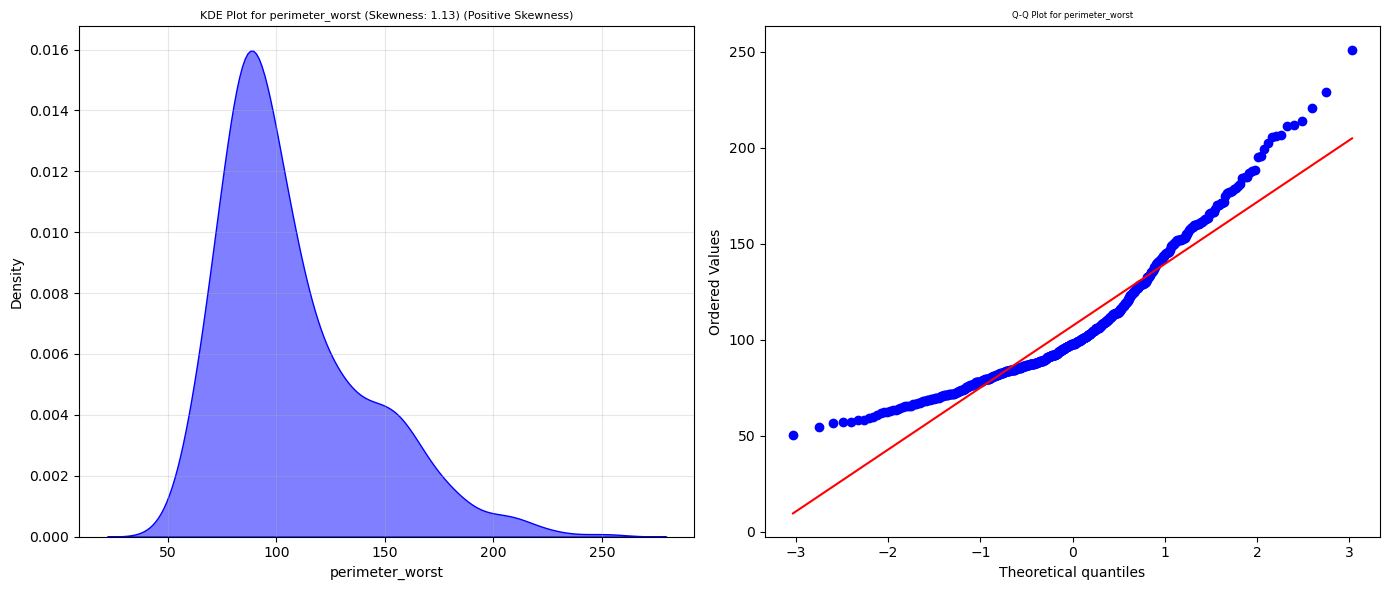

area_worst: Skewness = 1.86 (Positive Skewness)


smoothness_worst: Skewness = 0.42 (Positive Skewness)


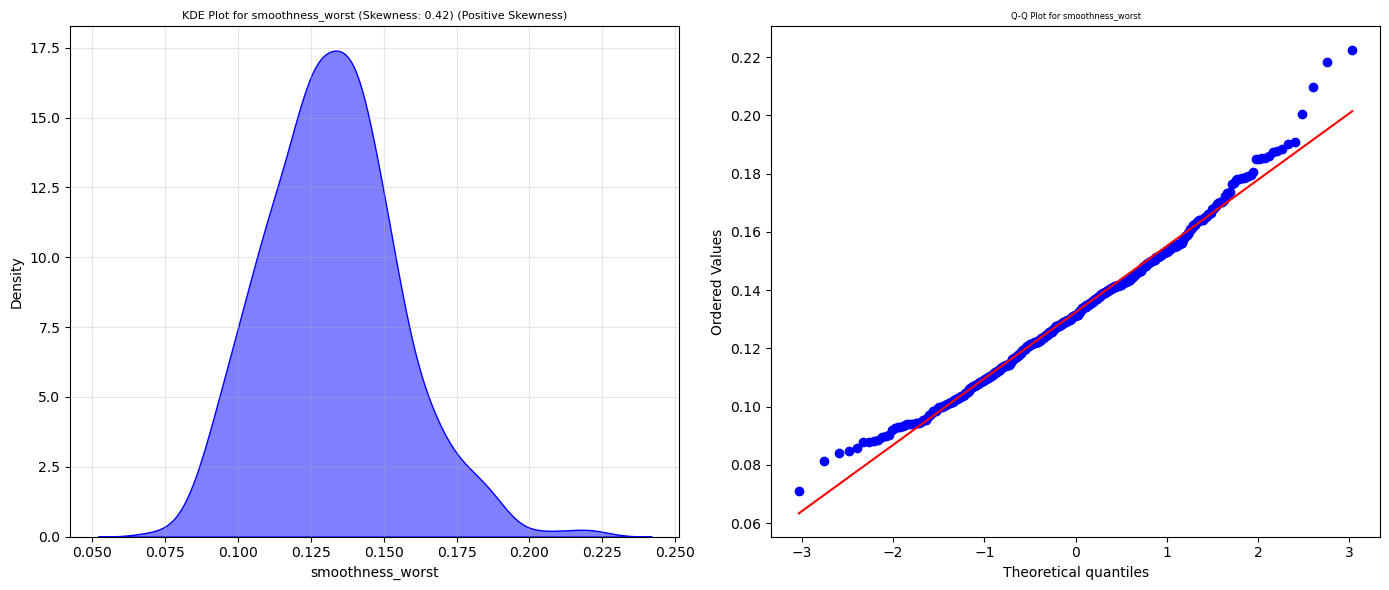

compactness_worst: Skewness = 1.47 (Positive Skewness)


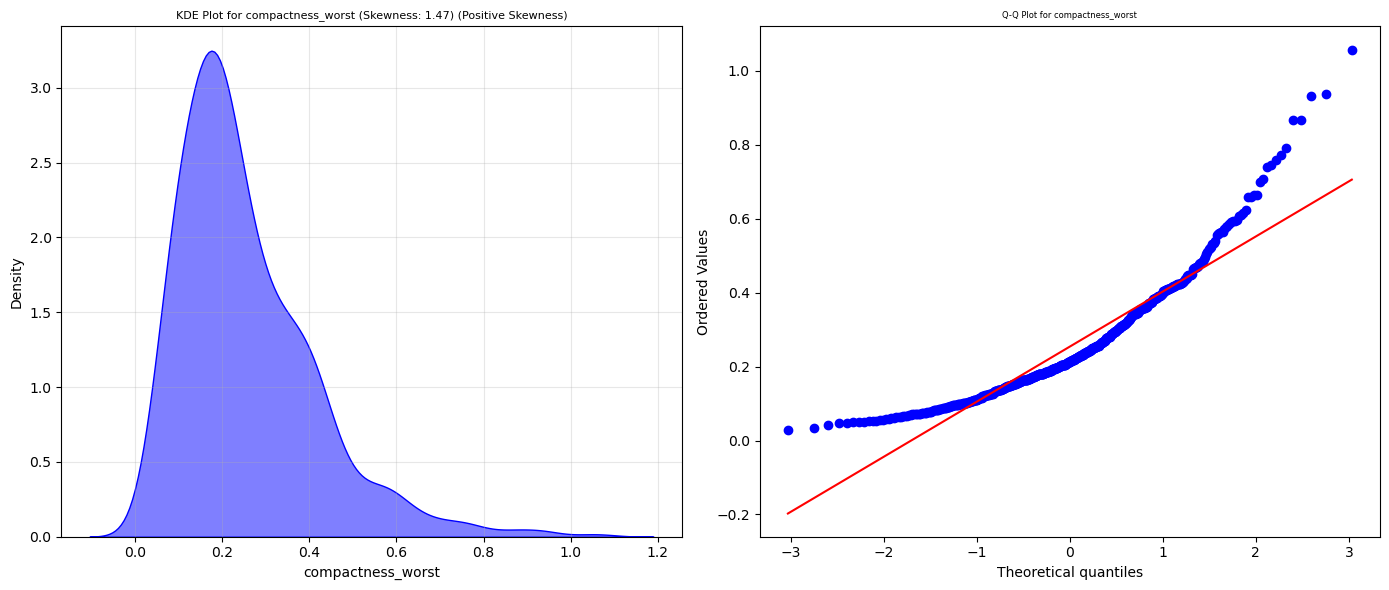

concavity_worst: Skewness = 1.15 (Positive Skewness)


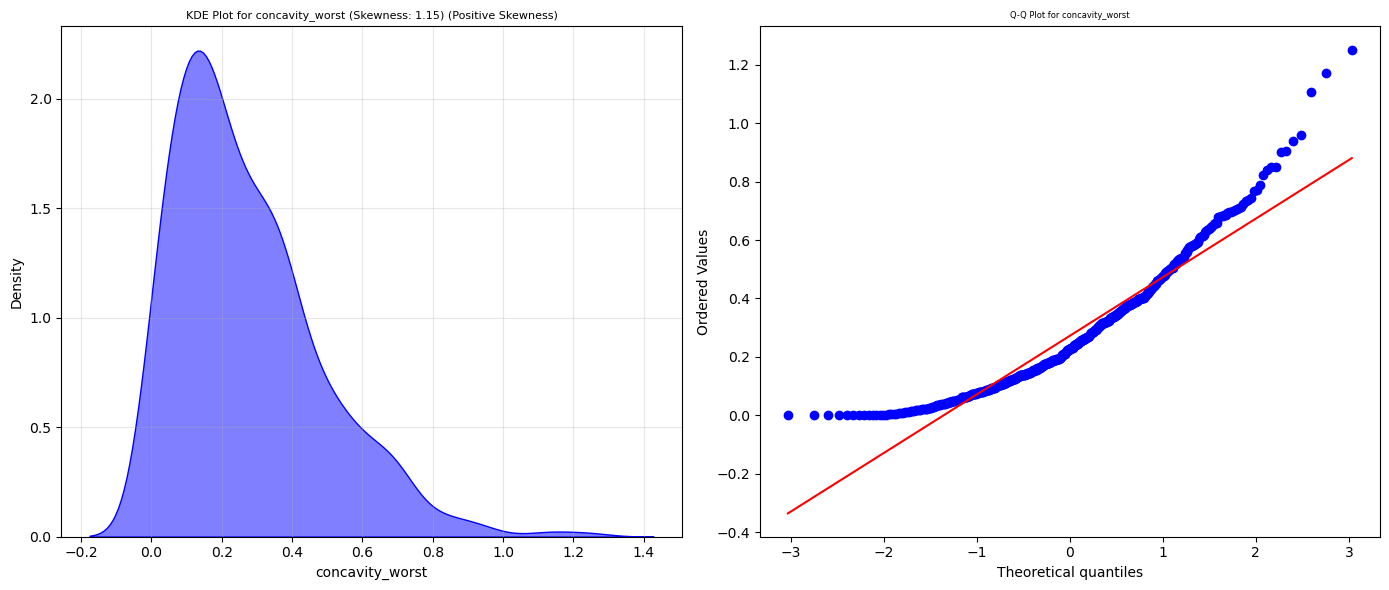

concave points_worst: Skewness = 0.49 (Positive Skewness)


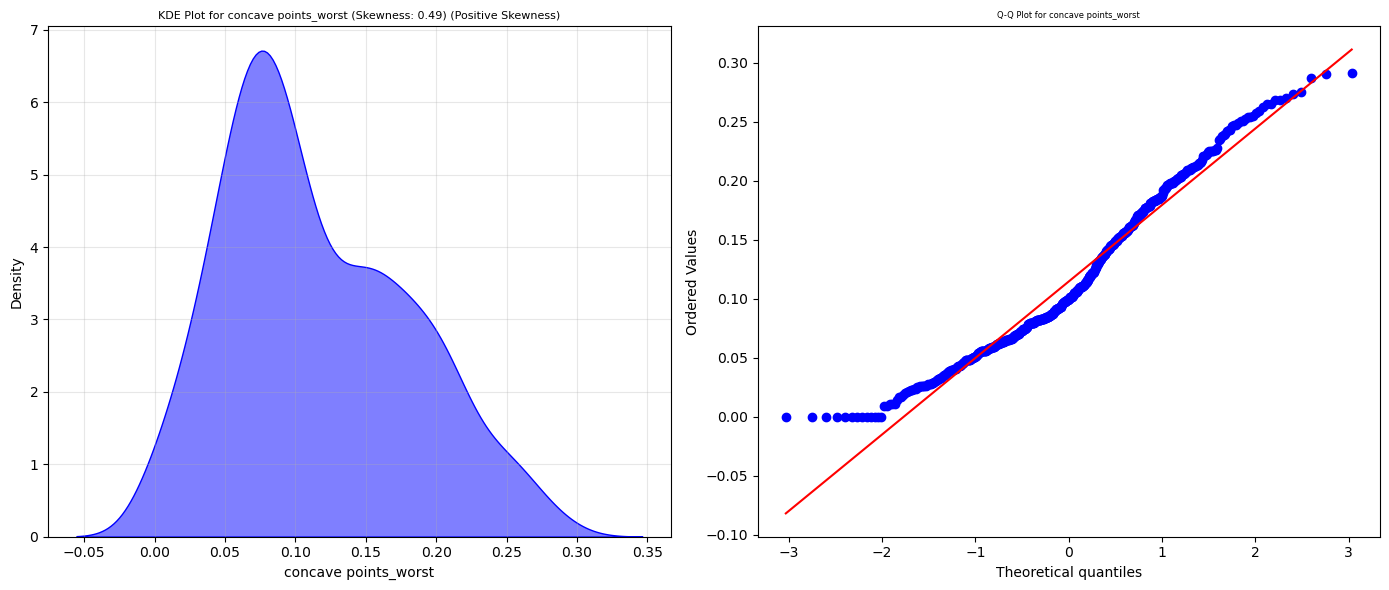

symmetry_worst: Skewness = 1.43 (Positive Skewness)


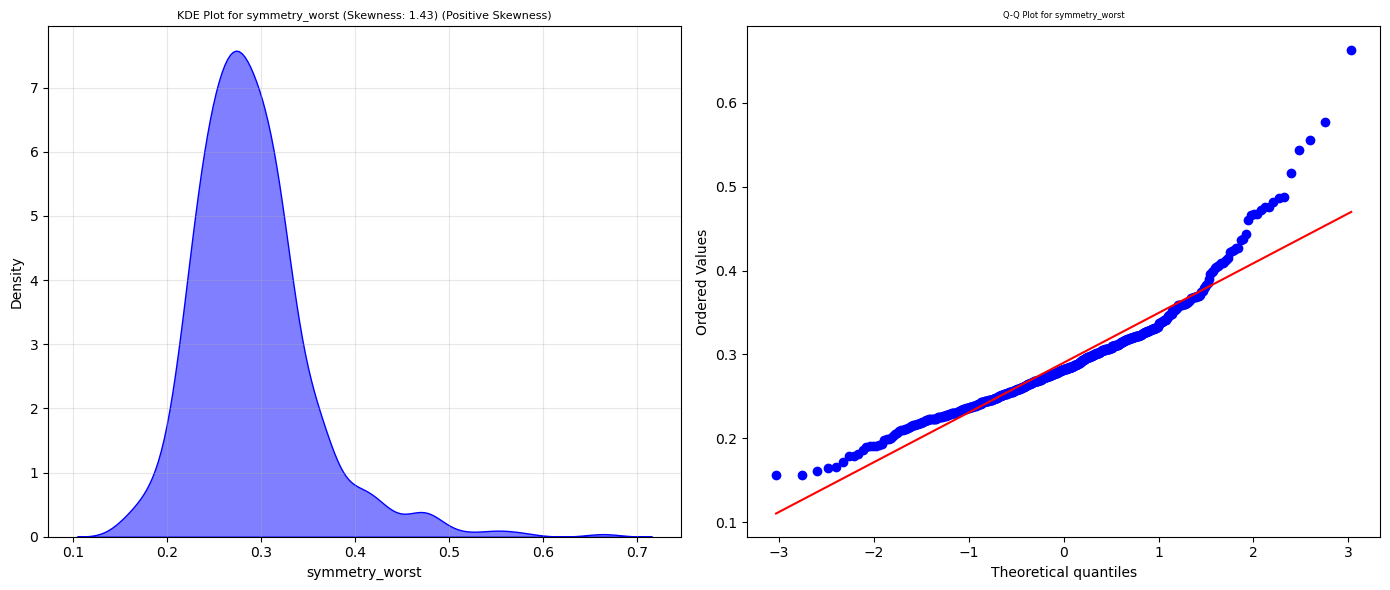

fractal_dimension_worst: Skewness = 1.66 (Positive Skewness)


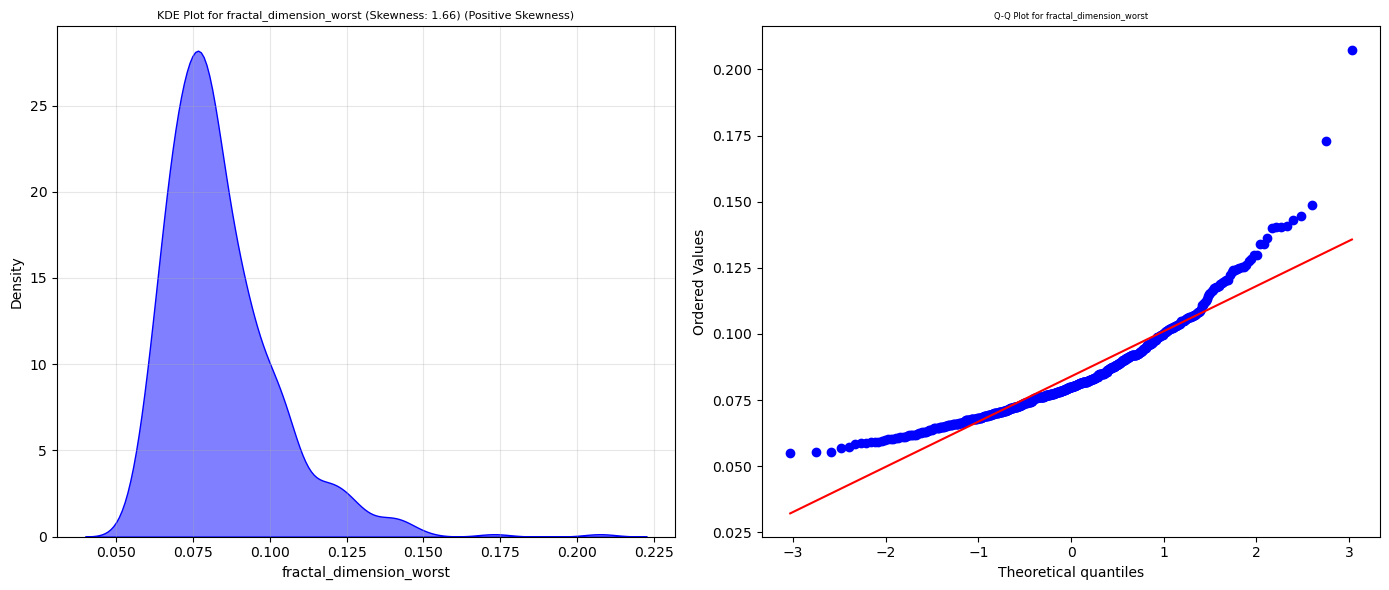

In [12]:
# Loop through each column in the DataFrame
for column in X.columns:
    if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a side-by-side plot
        
        skewness = X[column].skew()
        
        # Determine skewness type
        if skewness > 0:
            skew_type = "Positive Skewness"
        elif skewness < 0:
            skew_type = "Negative Skewness"
        else:
            skew_type = "Approximately Symmetrical"
        
        print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
        # KDE plot
        sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
        skewness = X[column].skew()  # Calculate skewness
        axes[0].set_title(f"KDE Plot for {column} (Skewness: {skewness:.2f}) ({skew_type})", fontsize=8)
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Density')
        axes[0].grid(alpha=0.3)
        
        # Q-Q plot
        stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q-Q Plot for {column}", fontsize=6)
        
        plt.tight_layout()
        plt.show()

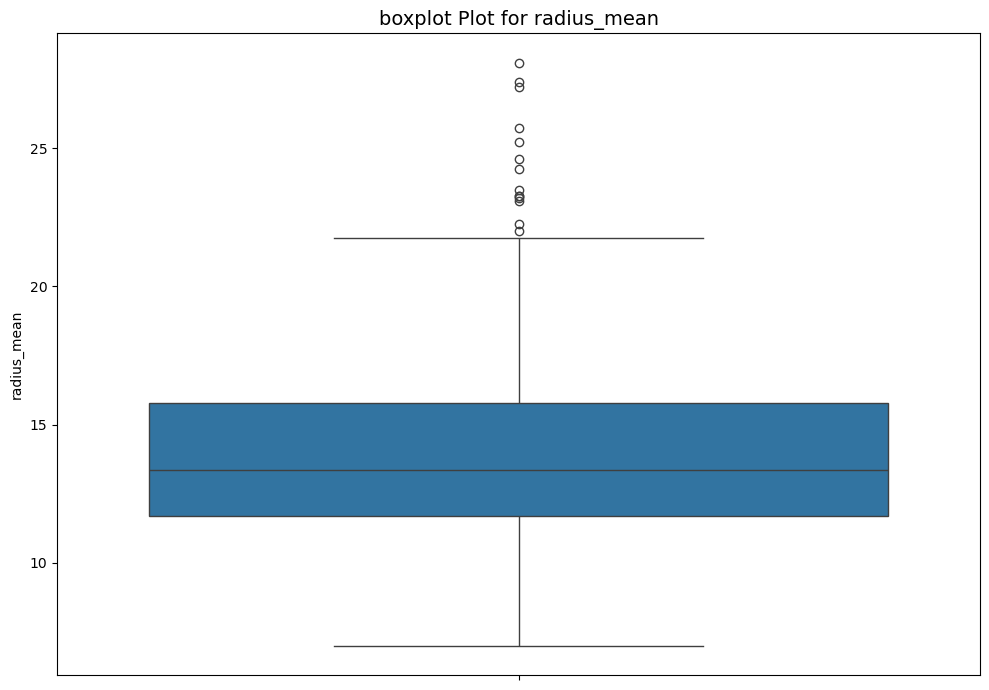

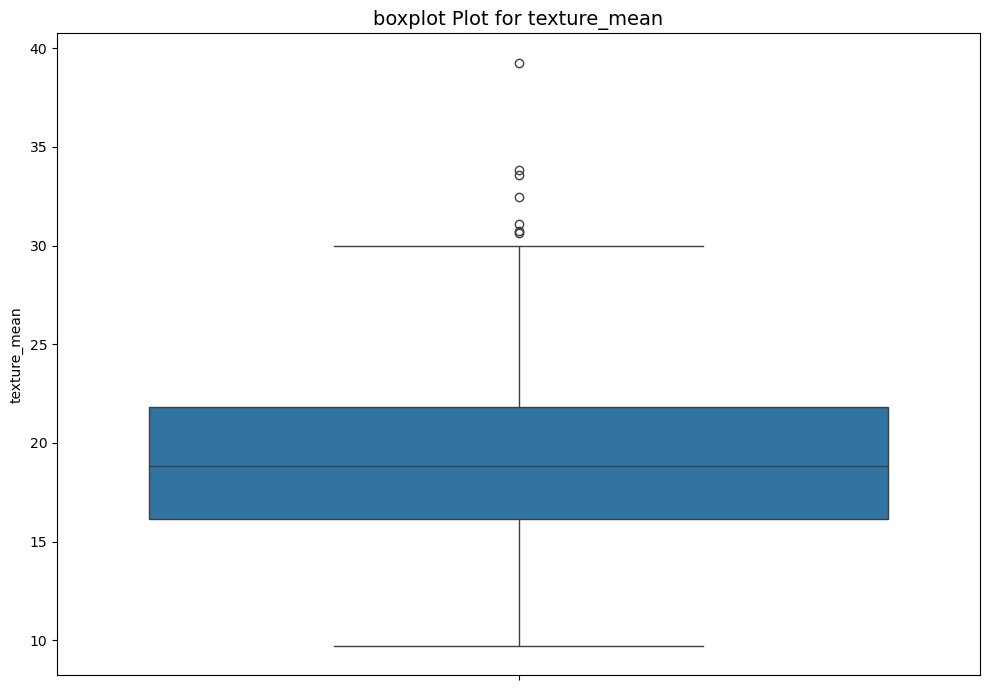

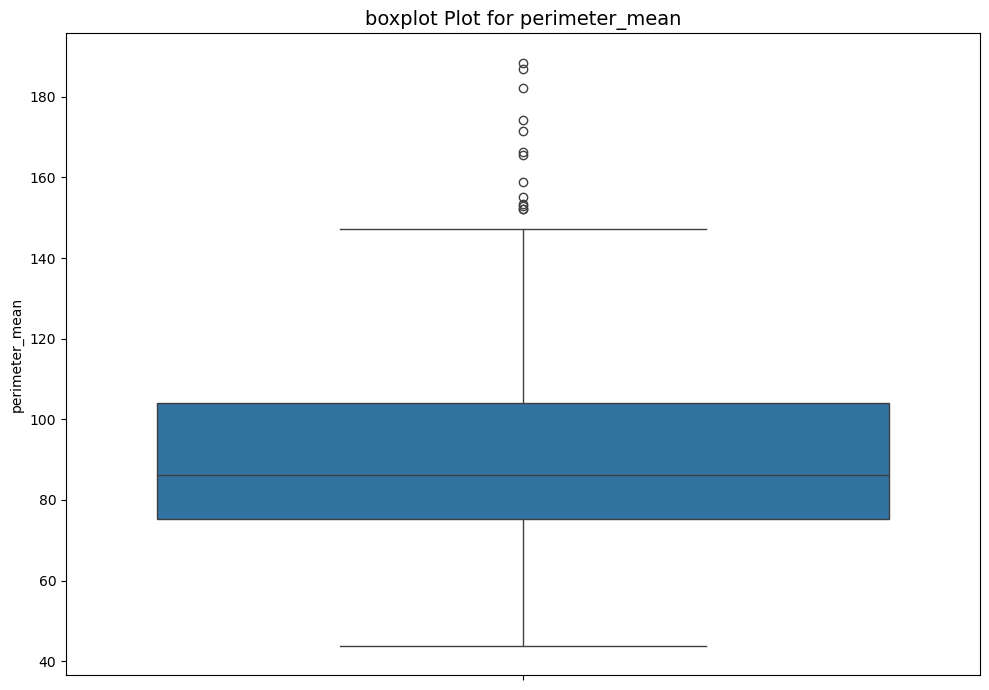

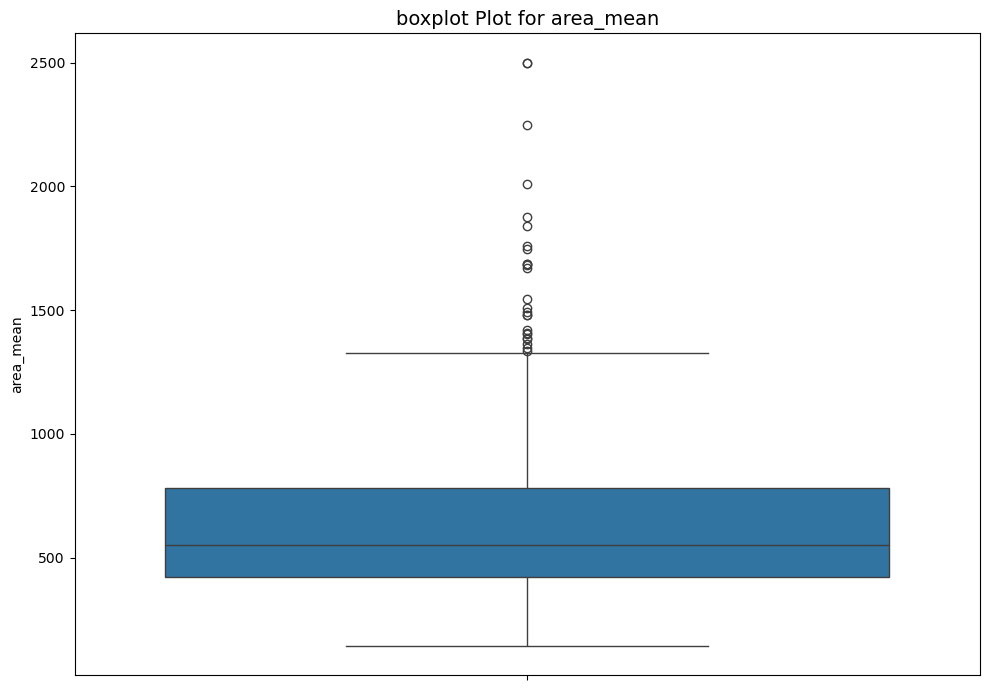

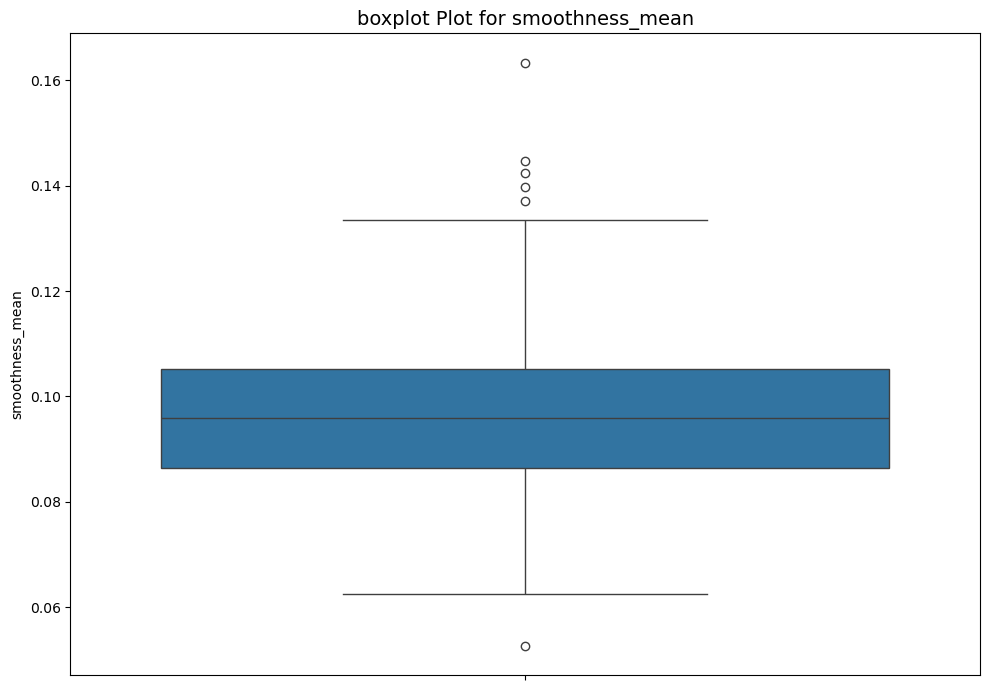

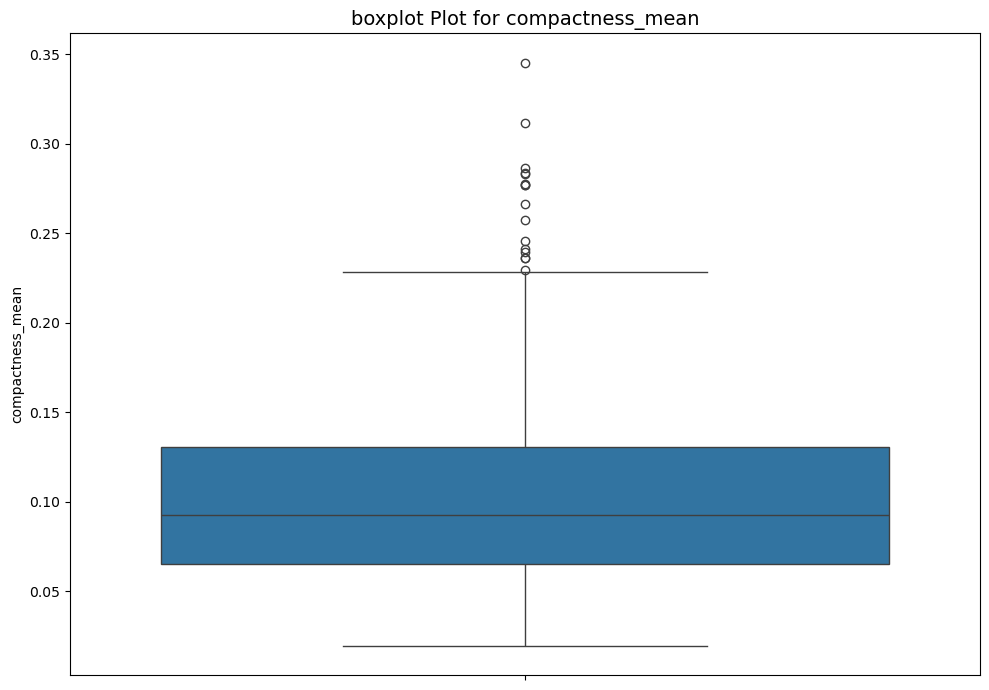

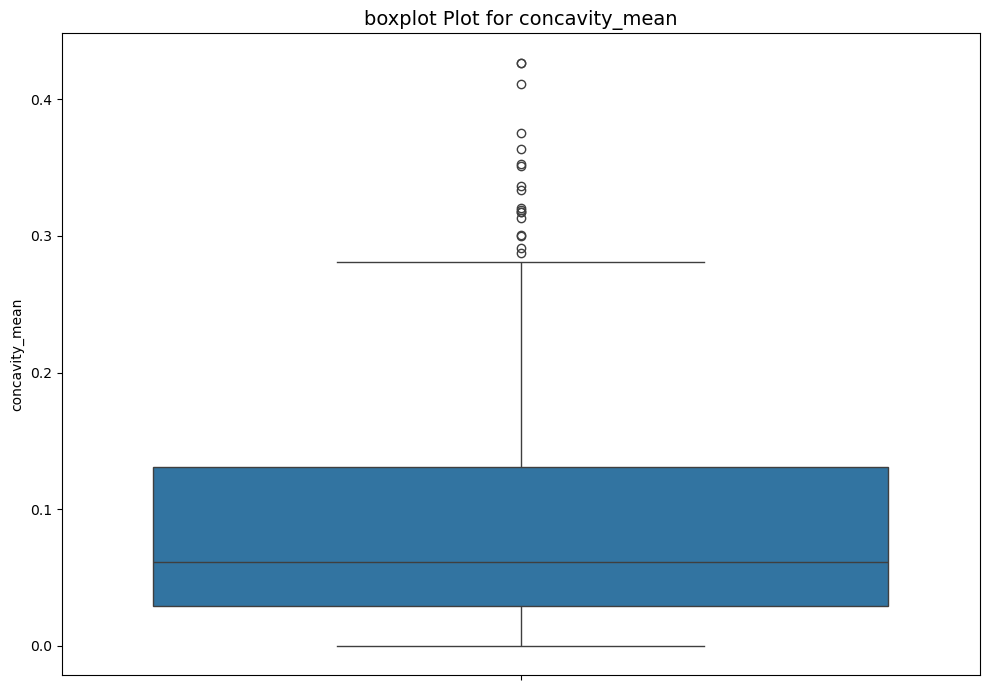

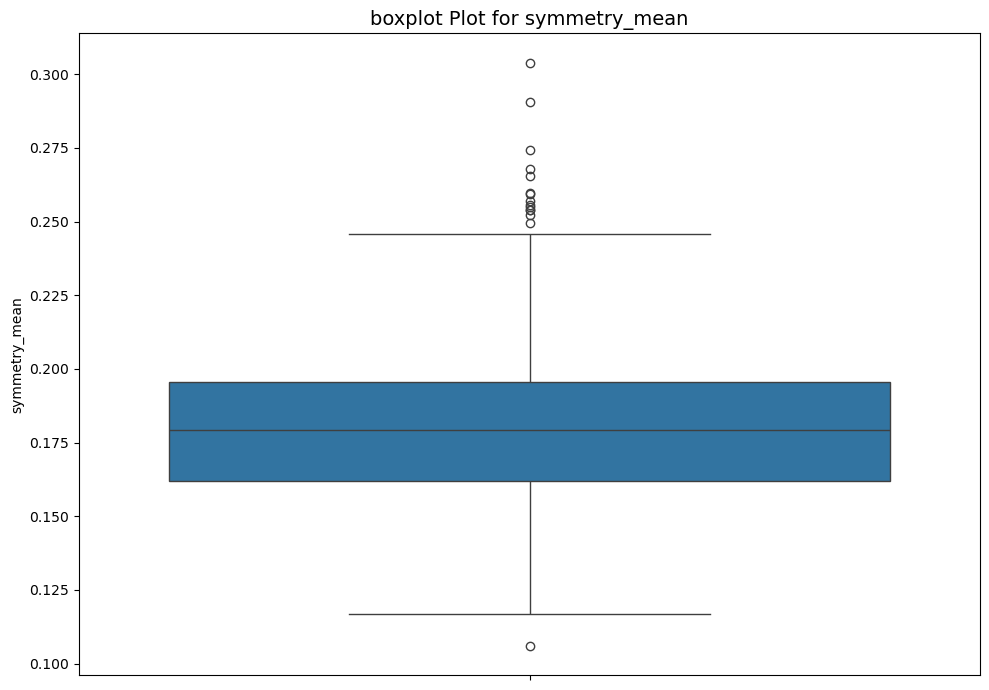

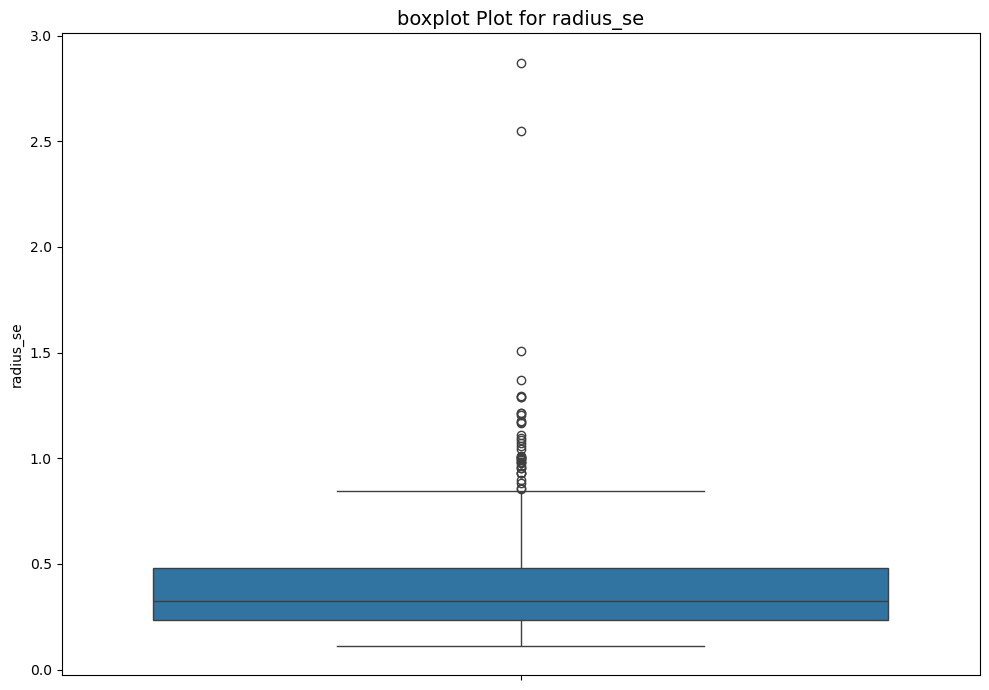

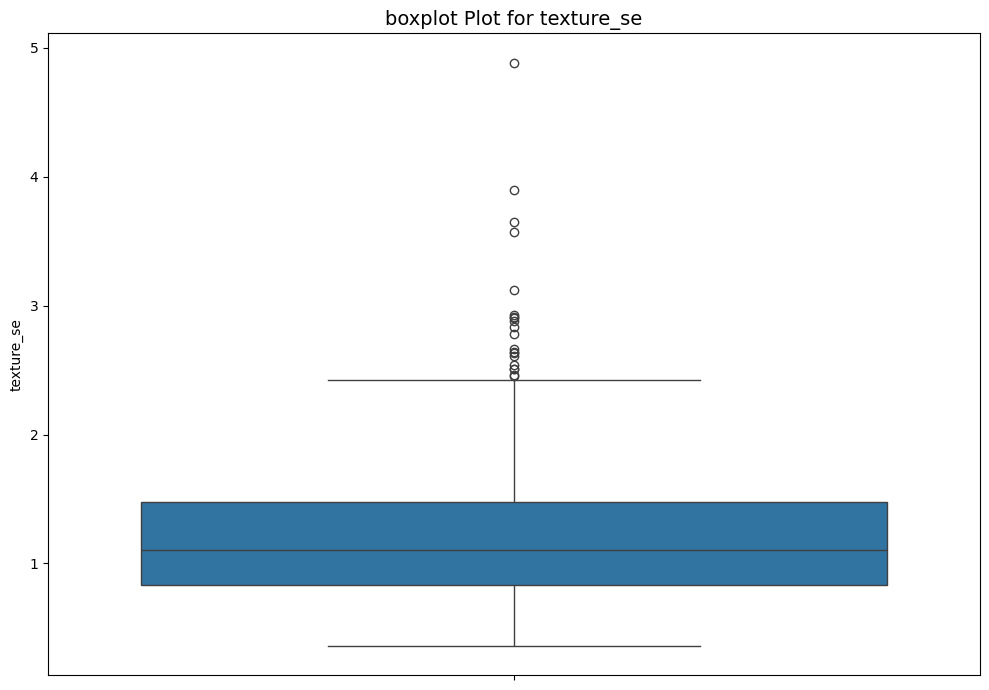

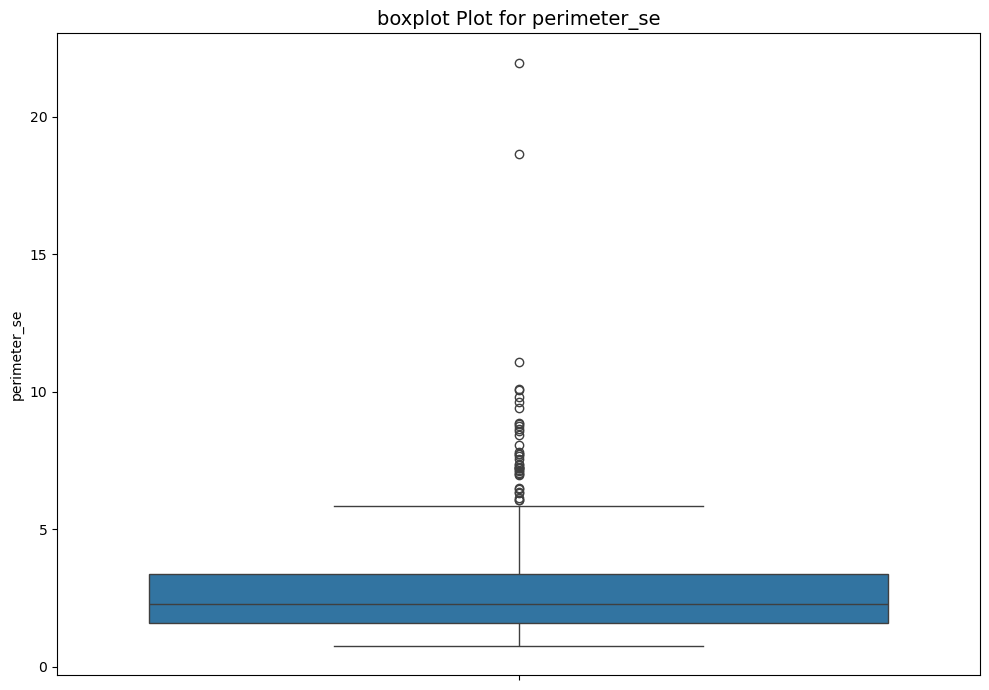

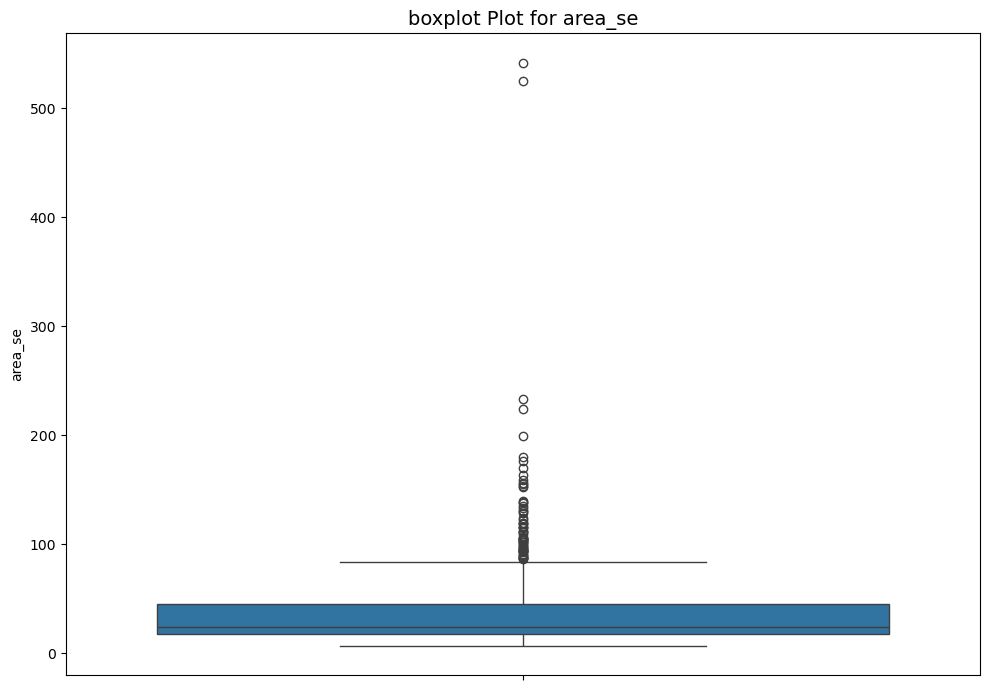

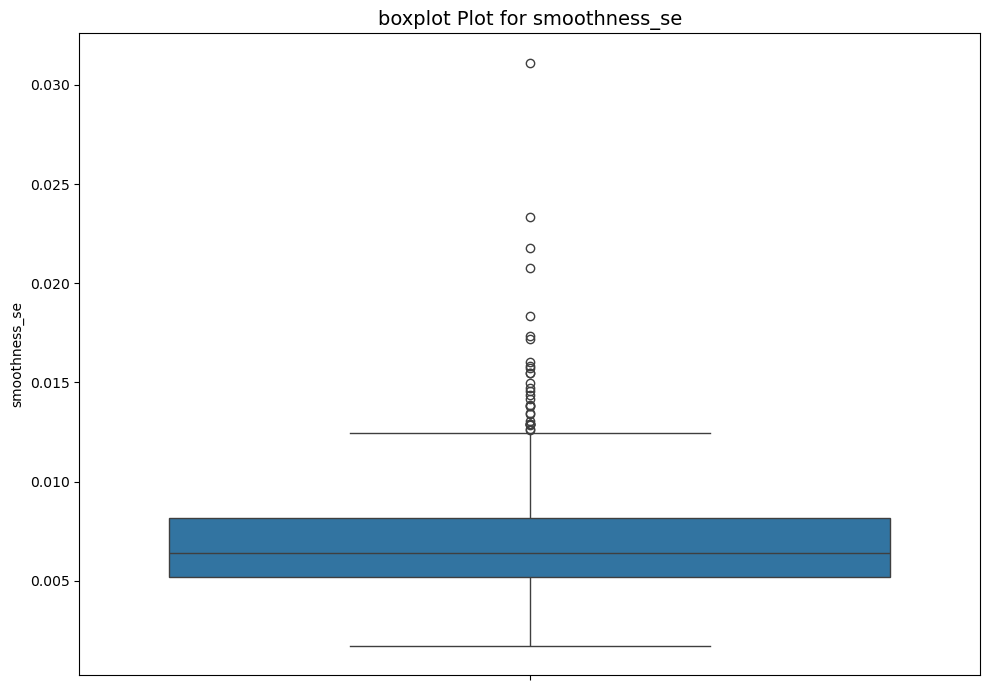

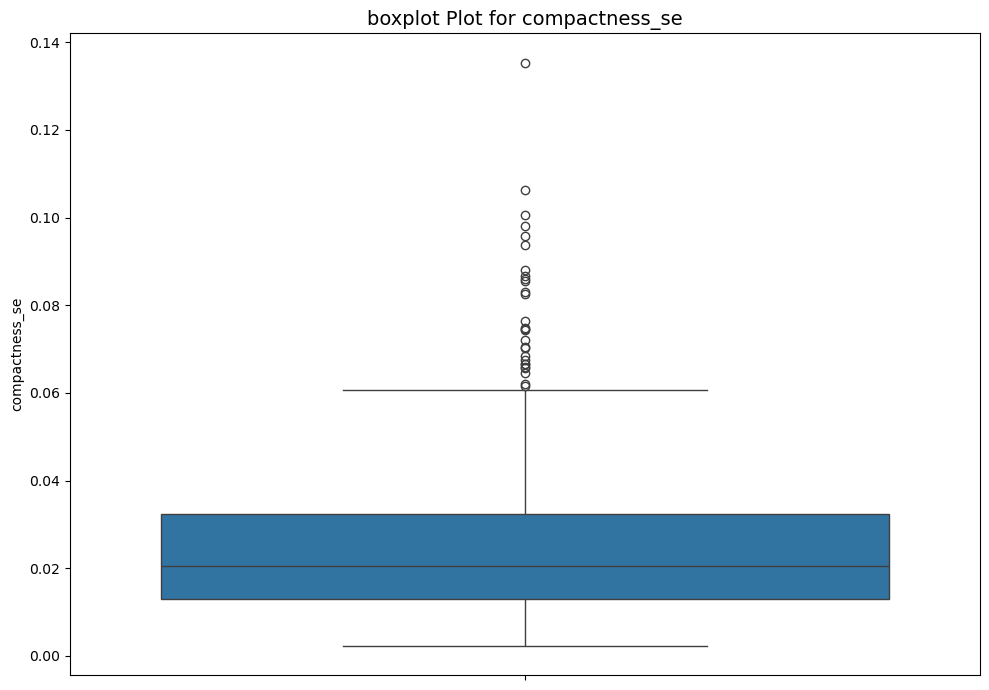

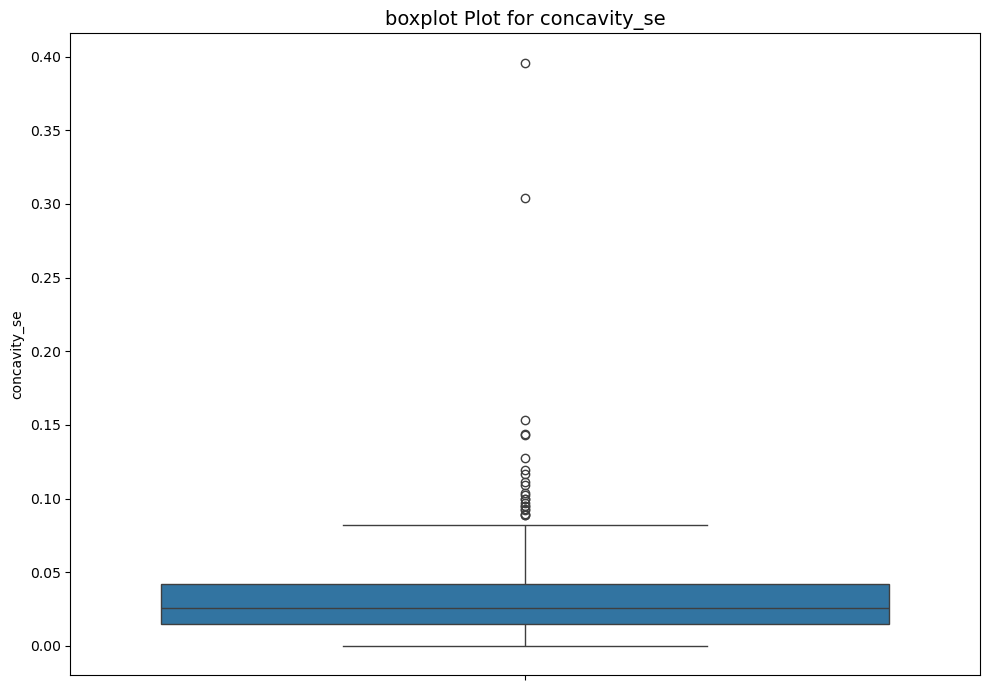

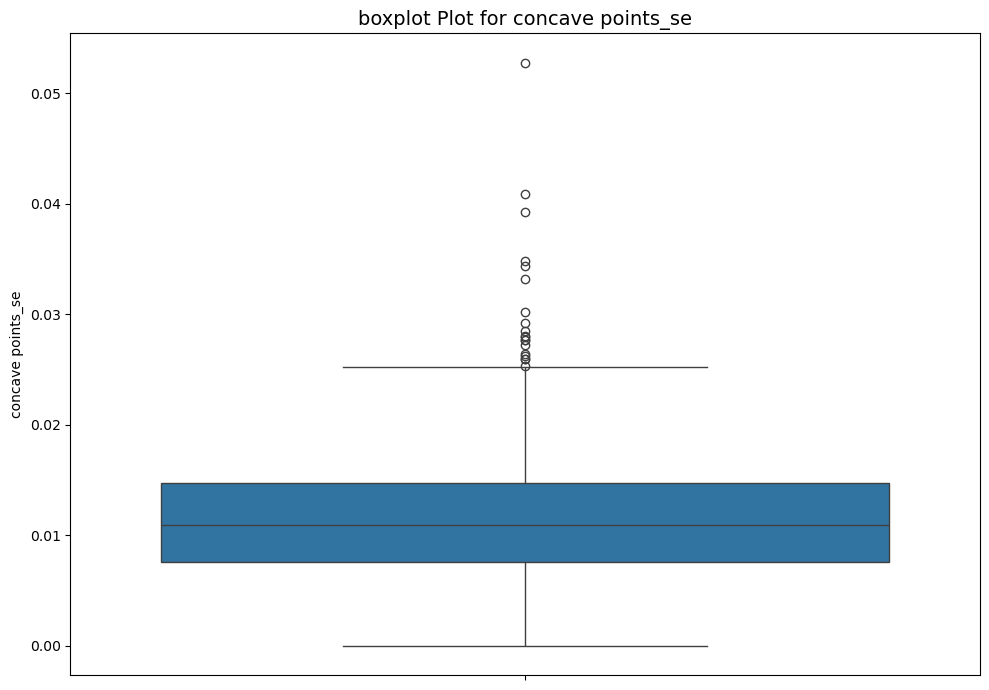

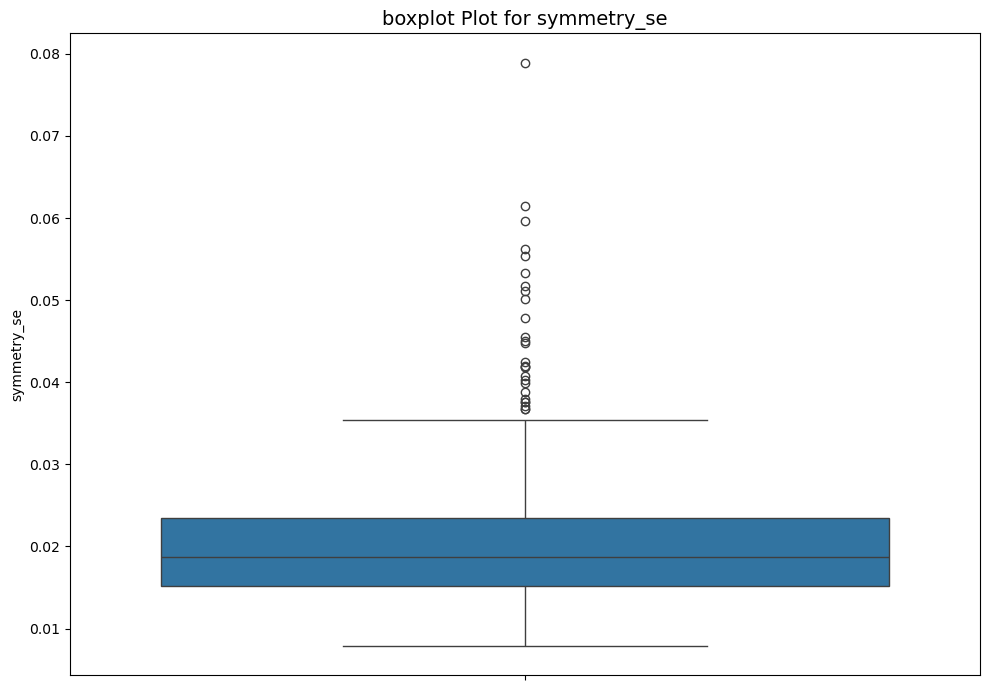

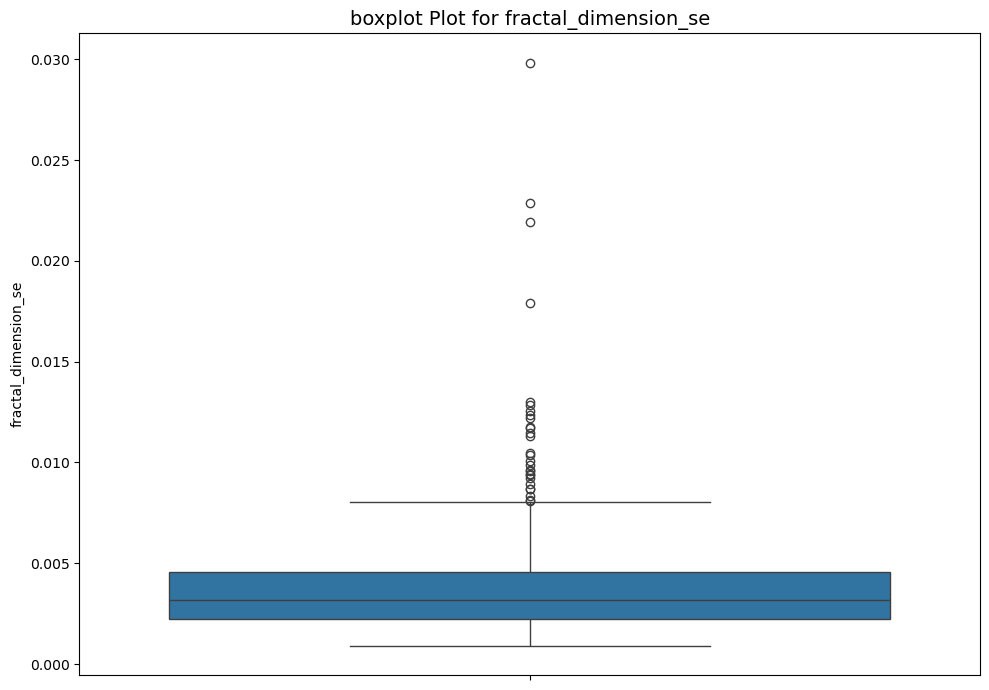

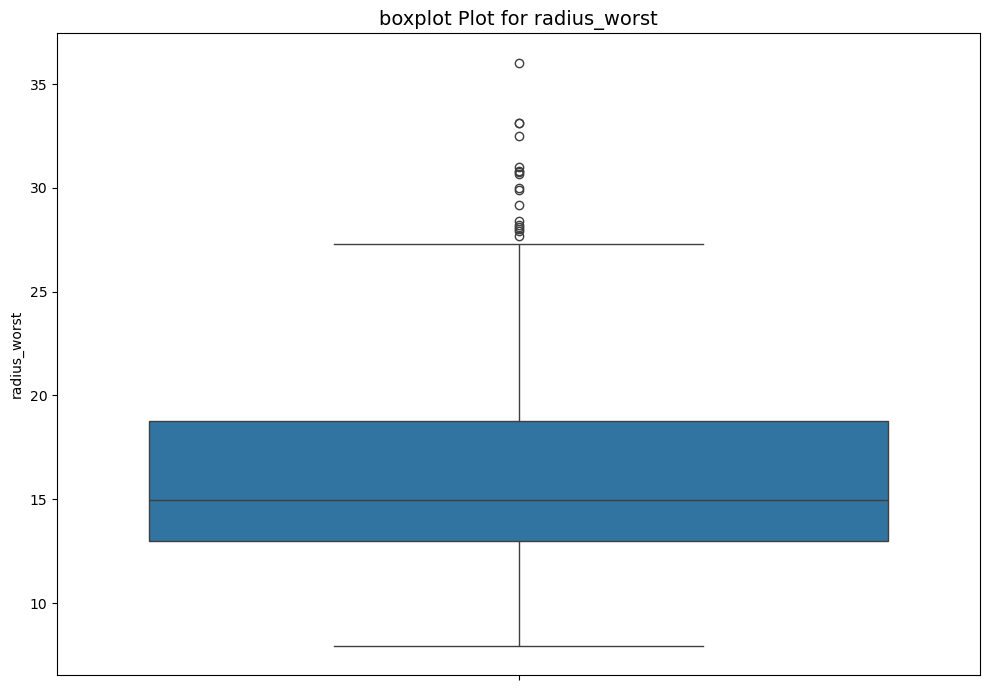

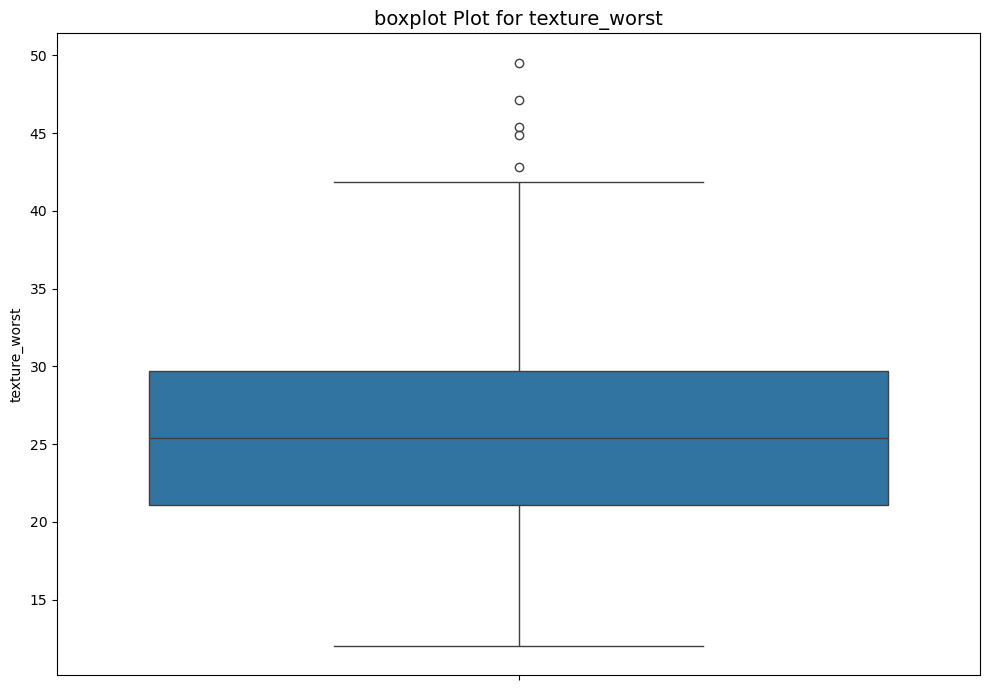

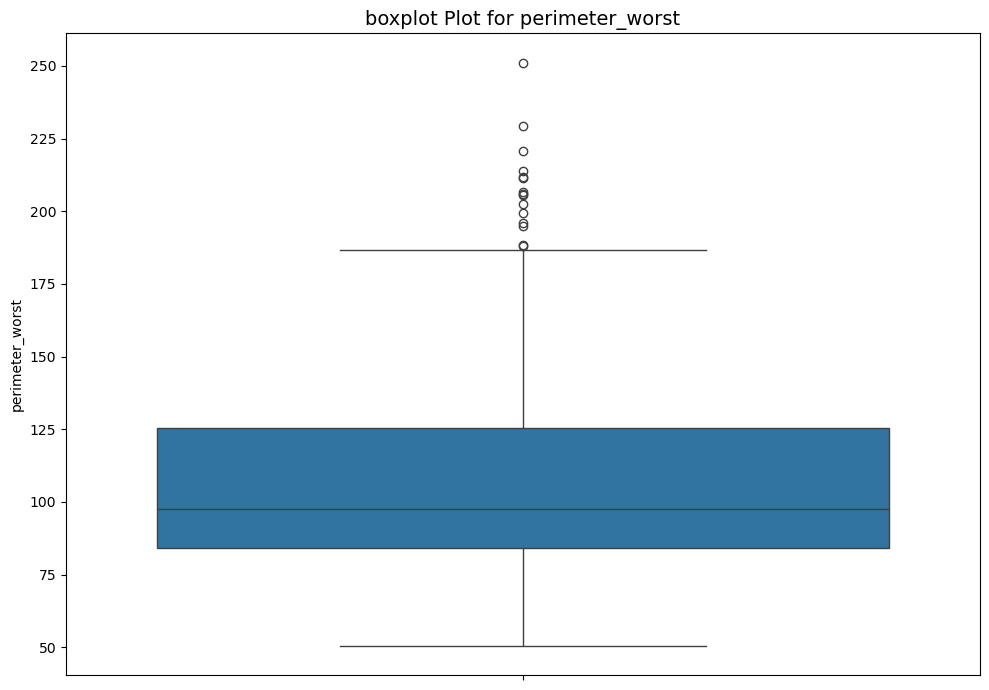

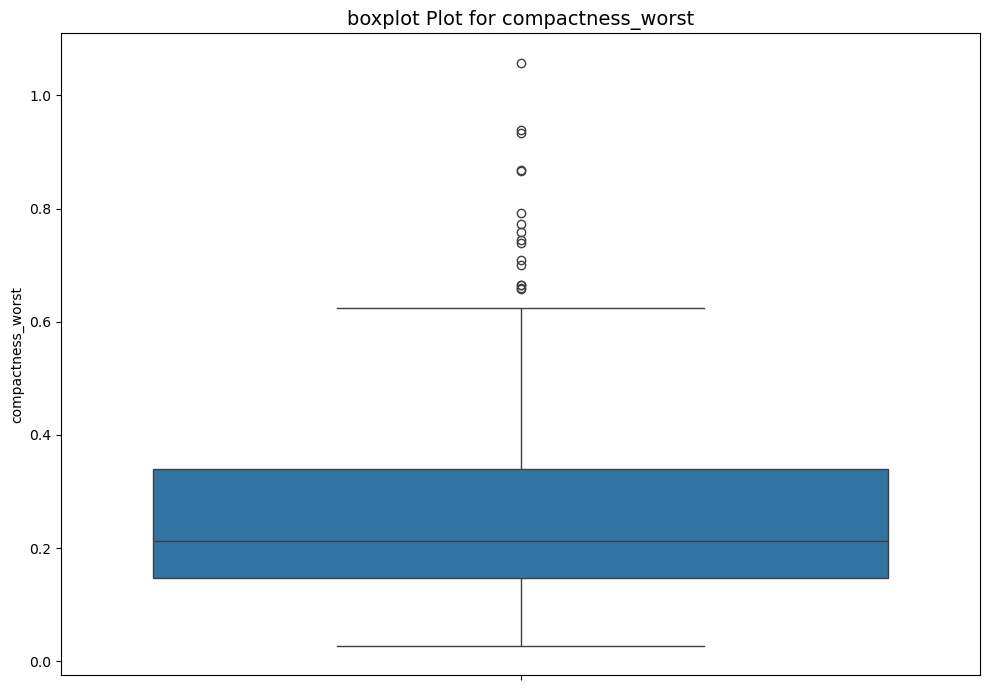

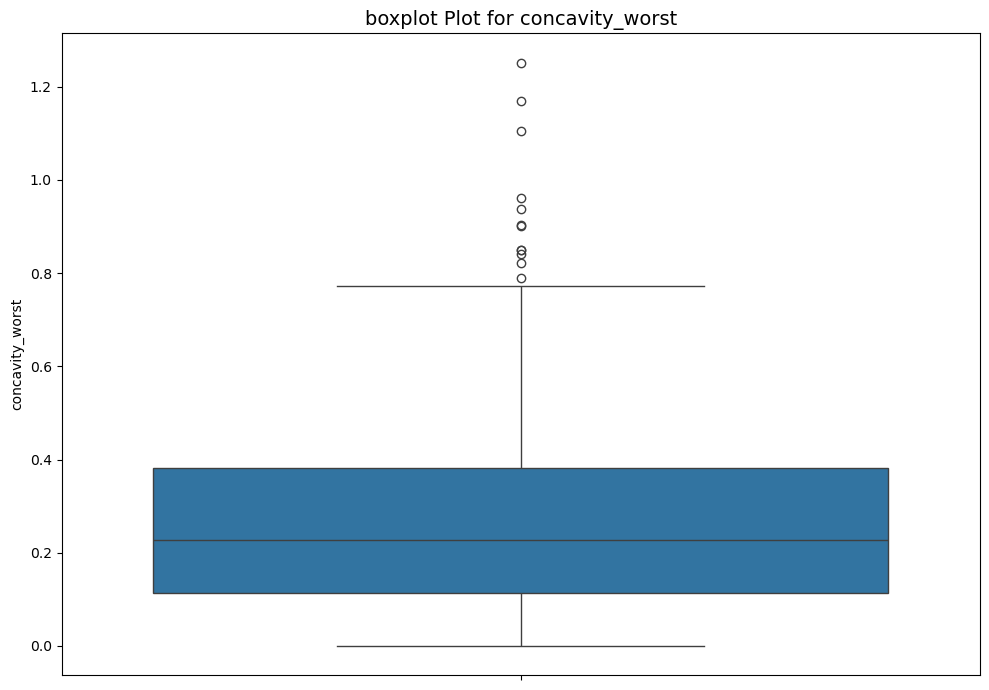

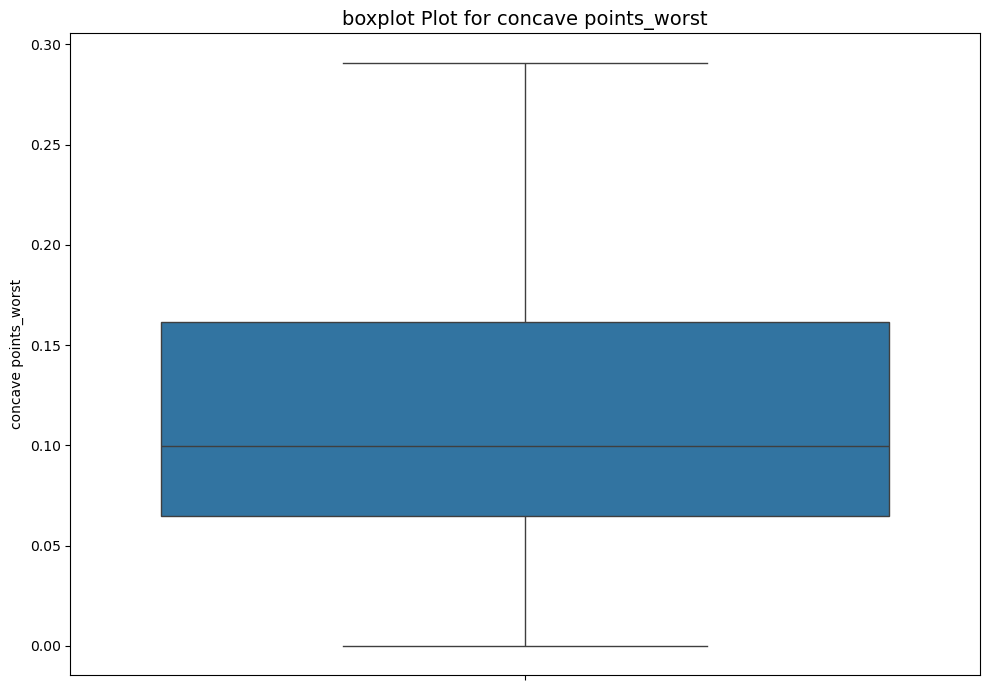

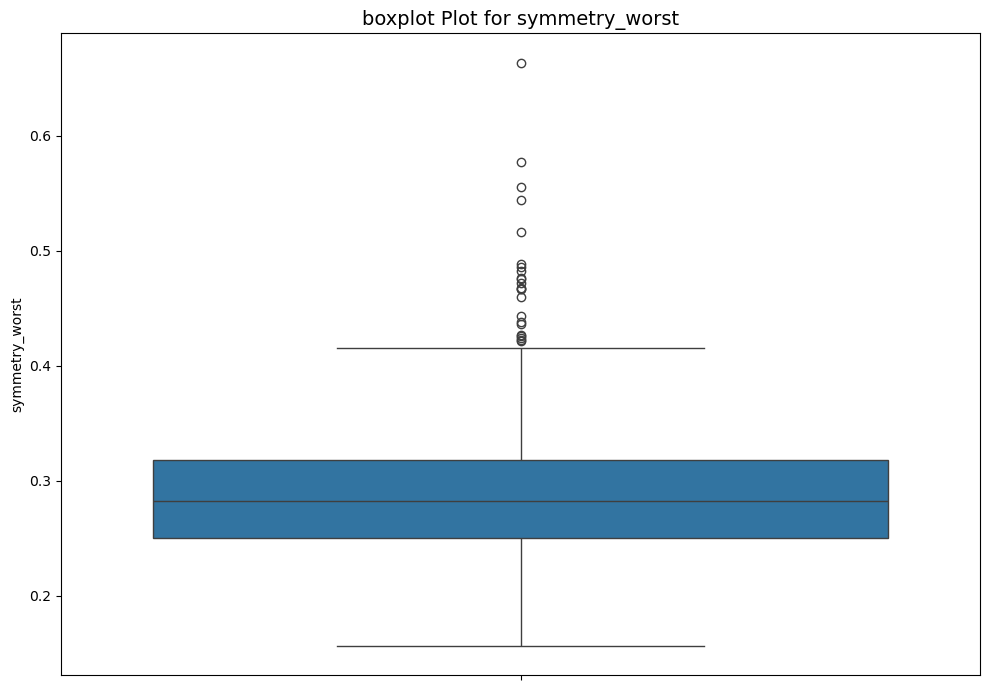

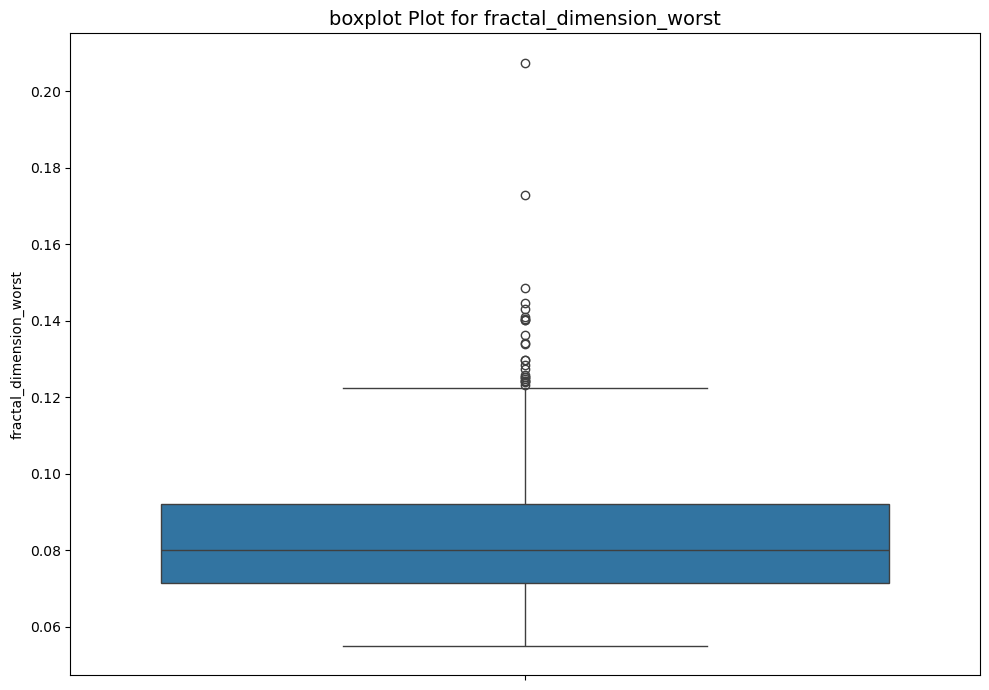

In [13]:
# Loop through each column in the DataFrame
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):  # Check if the column is numeric
        plt.figure(figsize=(10, 7))
        
        # KDE plot
        sns.boxplot(df[column])
        plt.title(f"boxplot Plot for {column}", fontsize=14)
    
        # plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,y_train.shape

((455, 30), (455,))

In [16]:
X_test.shape,y_test.shape

((114, 30), (114,))

In [17]:
# Define the ColumnTransformer with dynamic numeric column selection
yeo_johnson_transformer = ColumnTransformer(
    transformers=[
        ('yeo_johnson', PowerTransformer(method='yeo-johnson'), X_train.select_dtypes(include=[np.number]).columns)
    ],
    remainder='passthrough'  # Retain other columns (non-numeric) as is
)

In [18]:
# Fit and transform the data
X_train_transformed = yeo_johnson_transformer.fit_transform(X_train)
X_test_transformed = yeo_johnson_transformer.transform(X_test)

In [19]:
# Convert transformed data back to a DataFrame with appropriate column names
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [20]:
X_test_transformed.shape , y_test.shape

((114, 30), (114,))

radius_mean: Skewness = 0.01 (Positive Skewness)


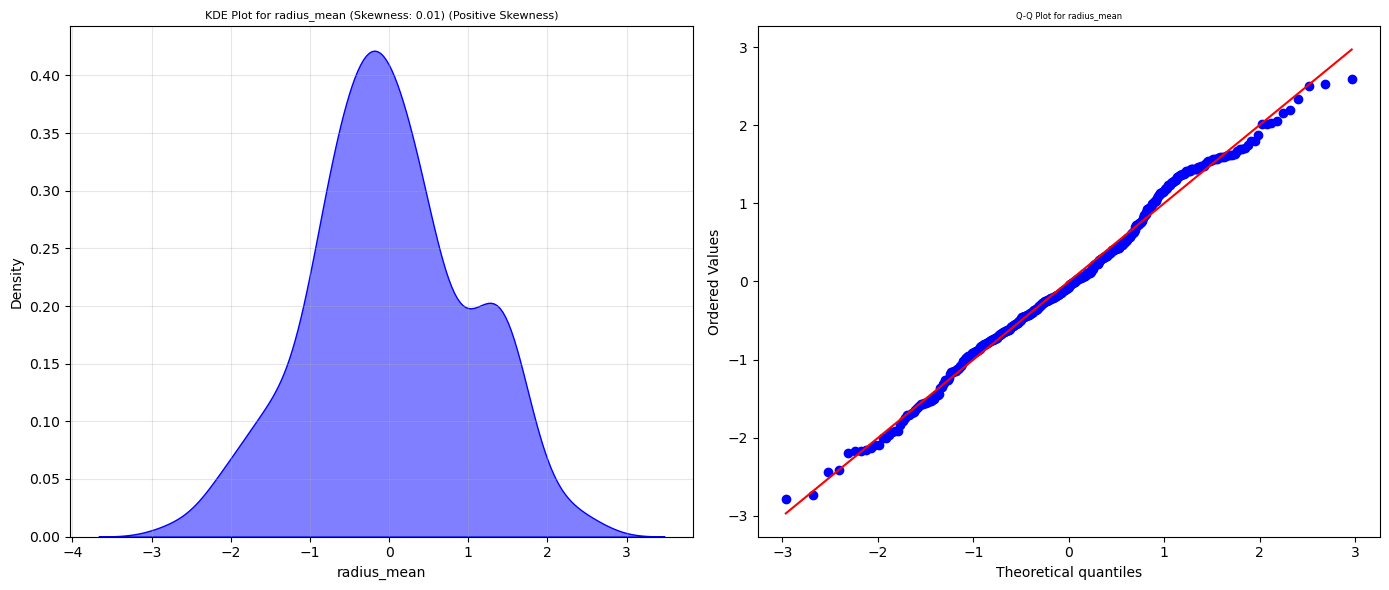

texture_mean: Skewness = -0.00 (Negative Skewness)


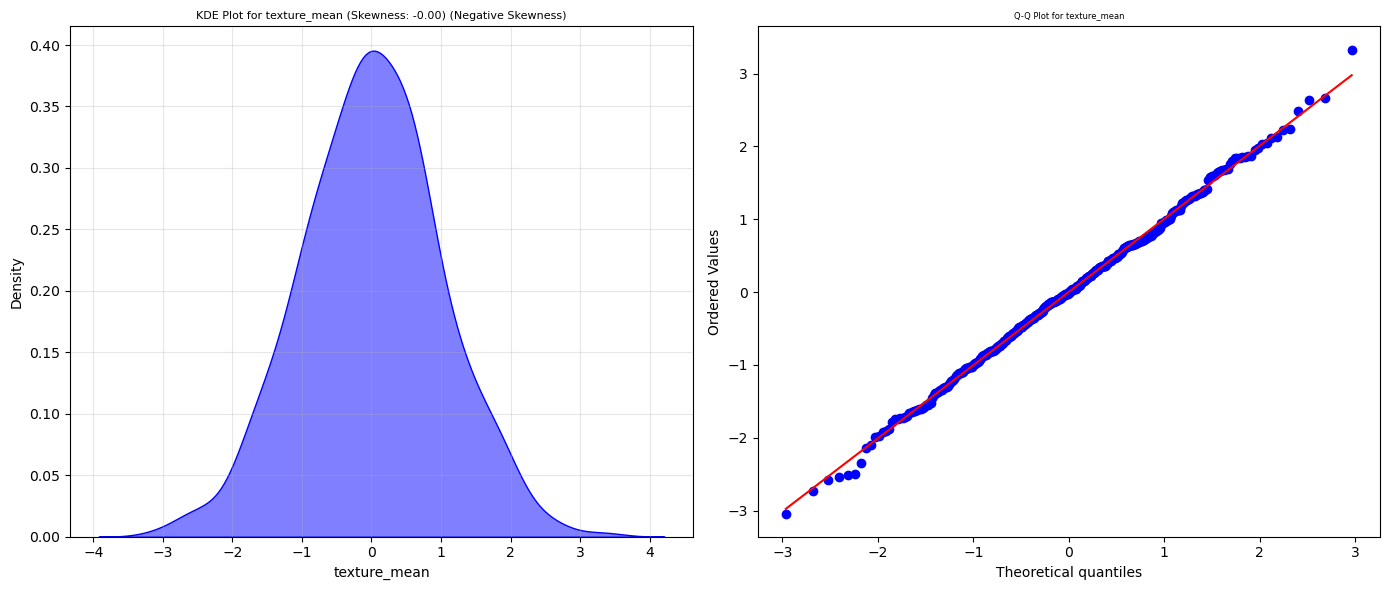

perimeter_mean: Skewness = 0.01 (Positive Skewness)


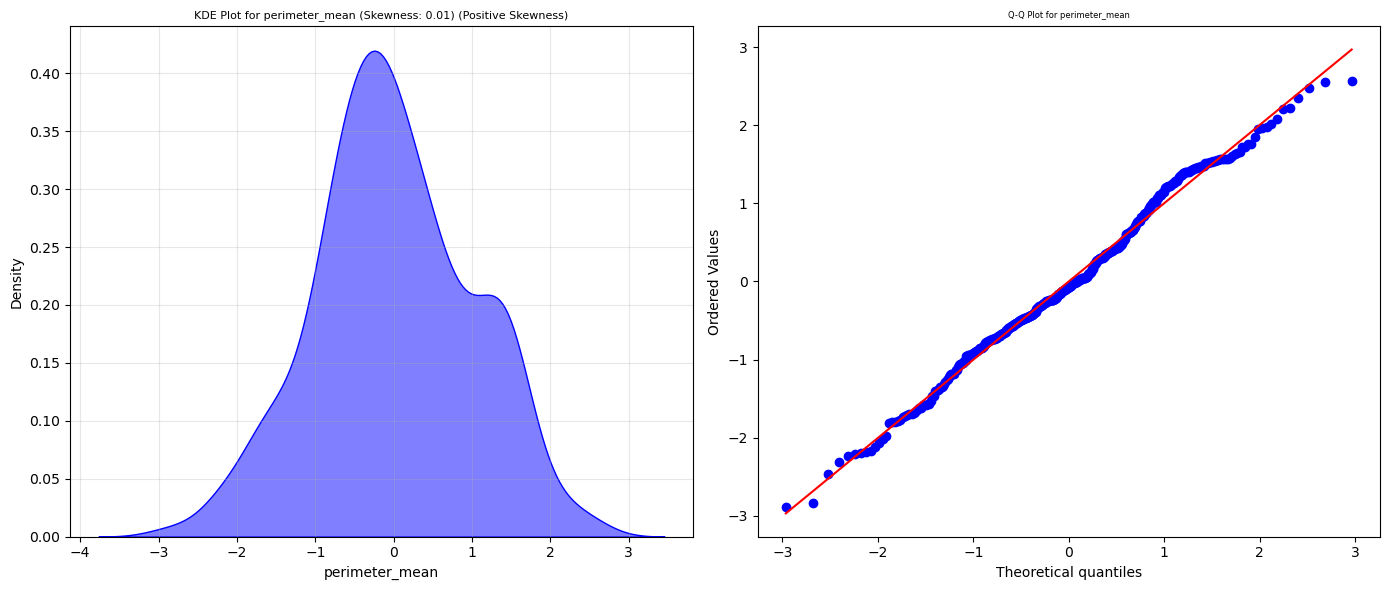

area_mean: Skewness = 0.01 (Positive Skewness)


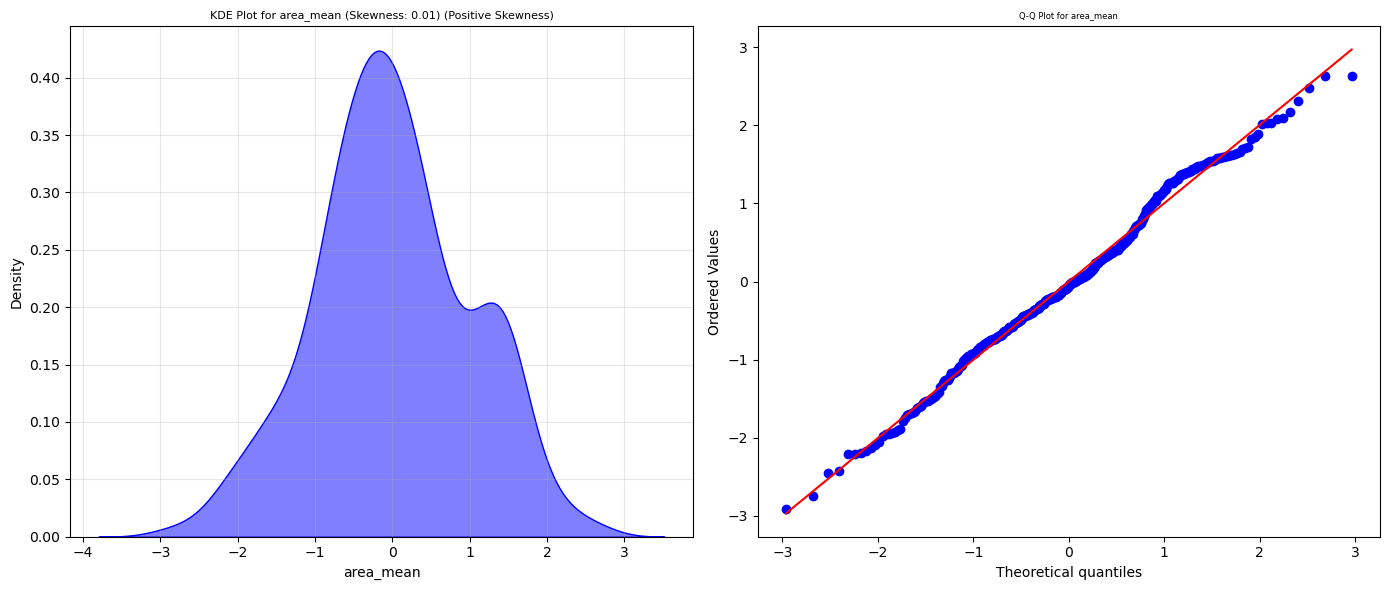

smoothness_mean: Skewness = -0.02 (Negative Skewness)


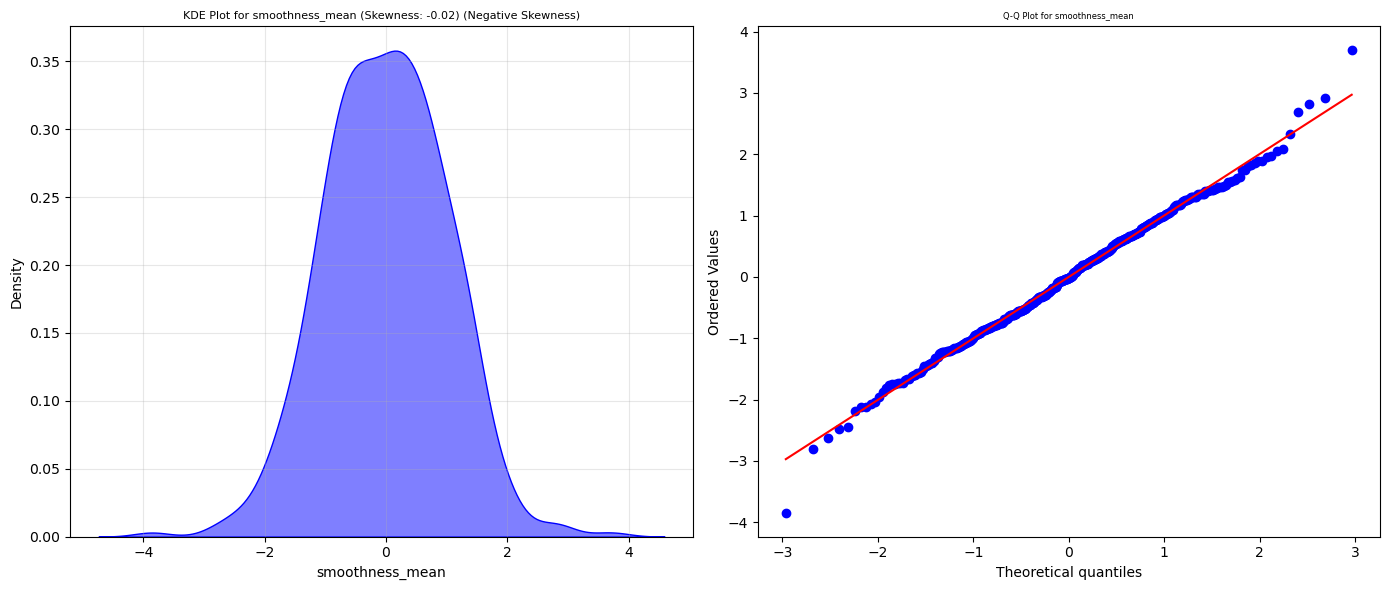

compactness_mean: Skewness = 0.11 (Positive Skewness)


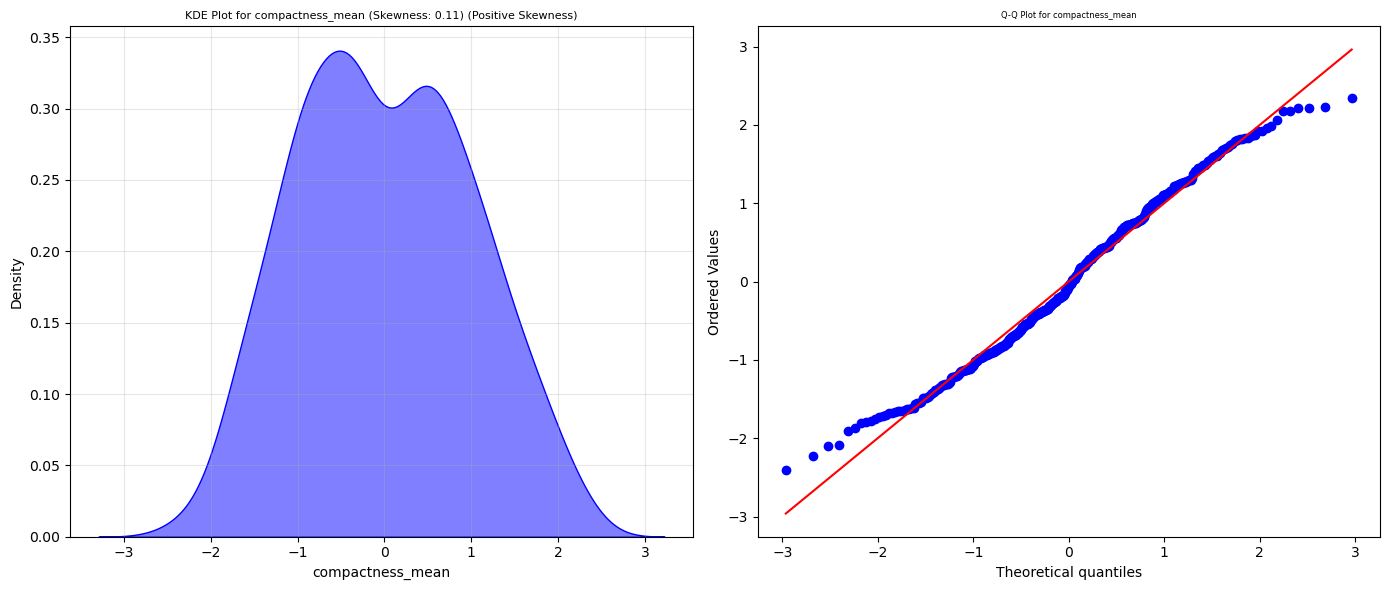

concavity_mean: Skewness = 0.23 (Positive Skewness)


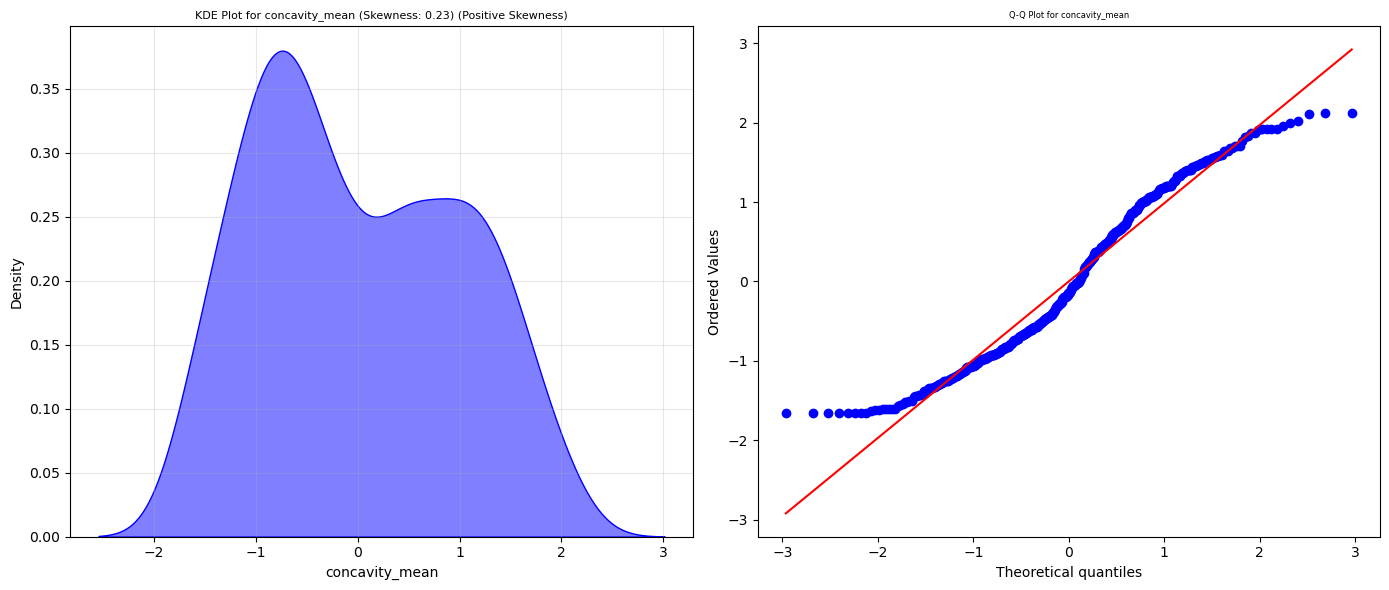

concave points_mean: Skewness = 0.20 (Positive Skewness)


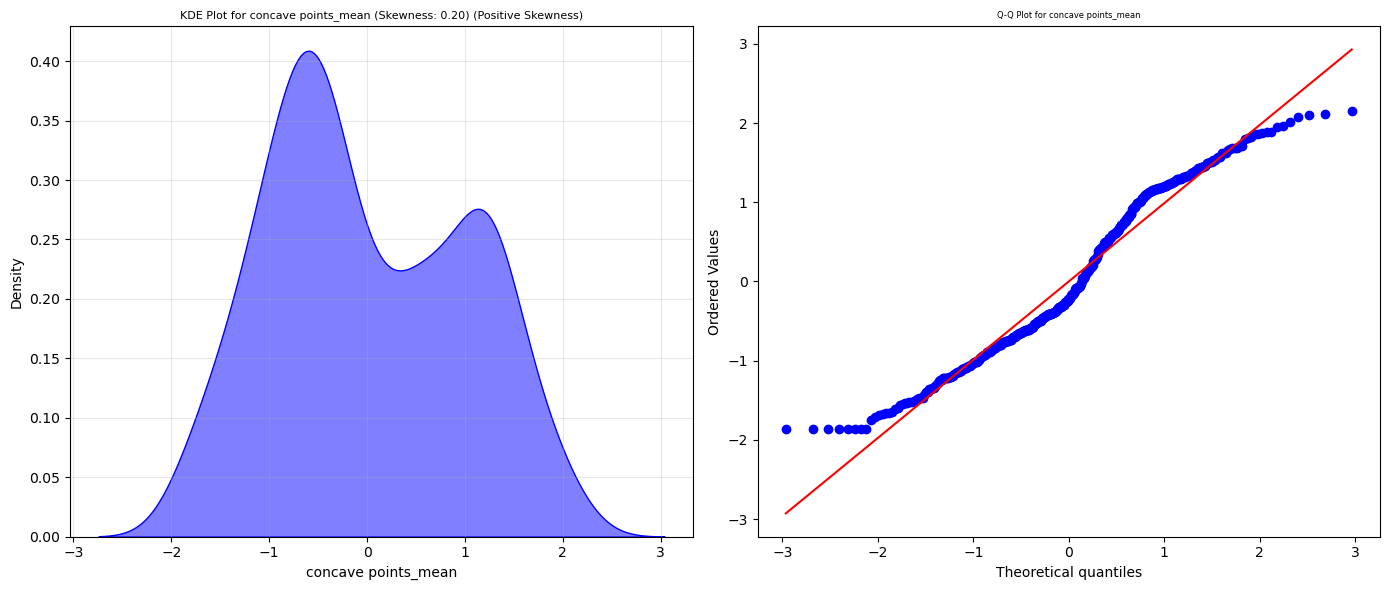

symmetry_mean: Skewness = -0.00 (Negative Skewness)


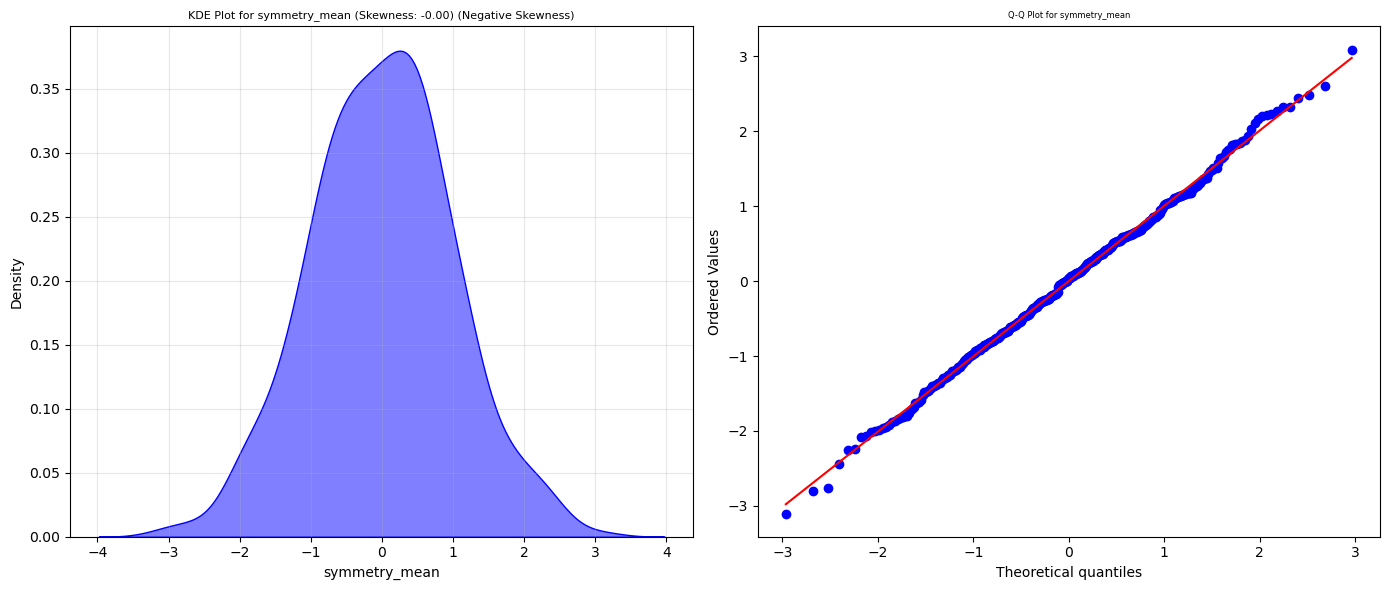

fractal_dimension_mean: Skewness = 0.03 (Positive Skewness)


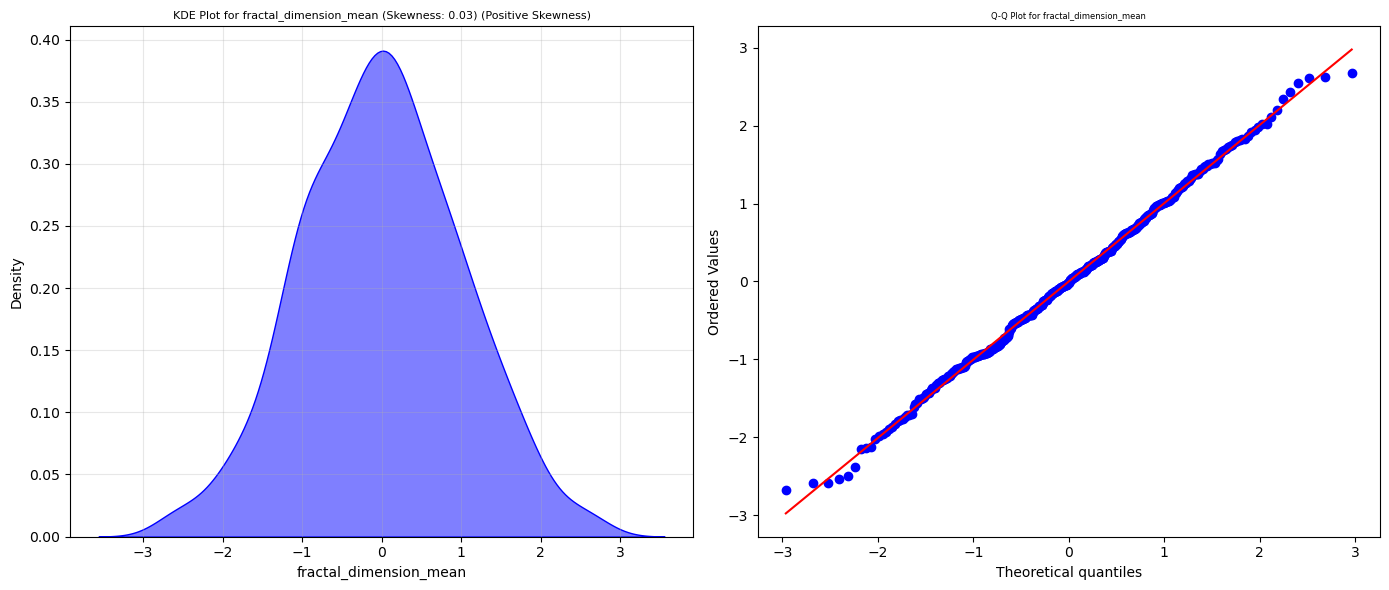

radius_se: Skewness = 0.19 (Positive Skewness)


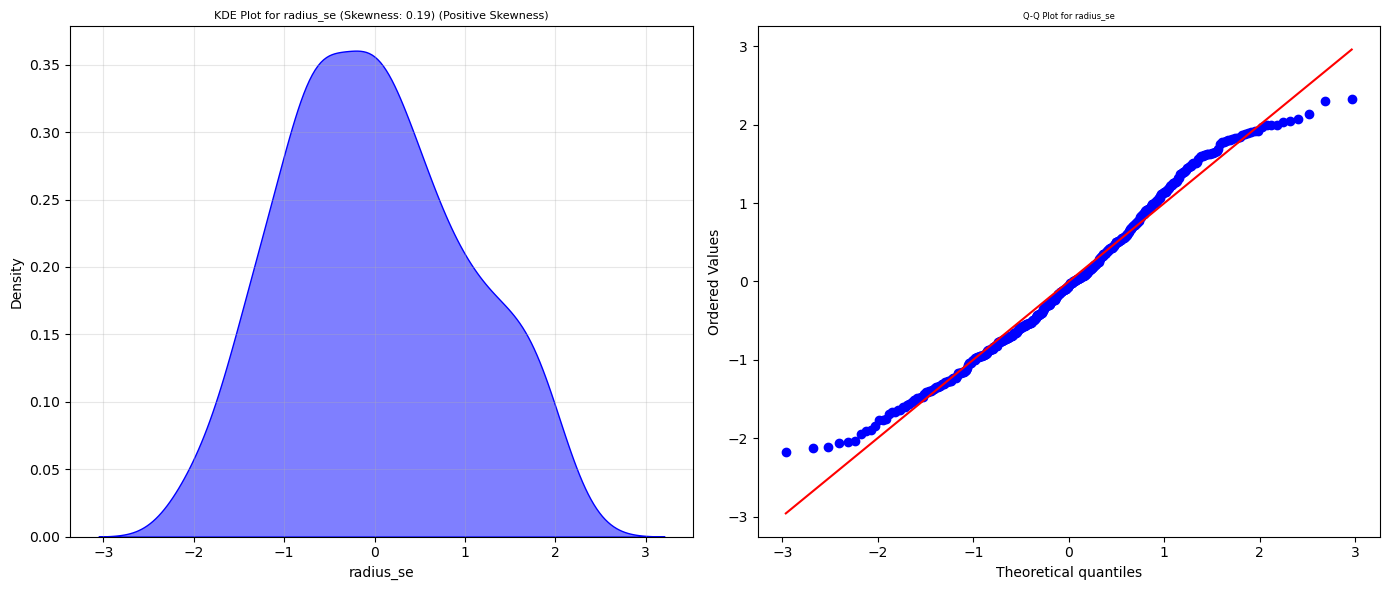

texture_se: Skewness = 0.01 (Positive Skewness)


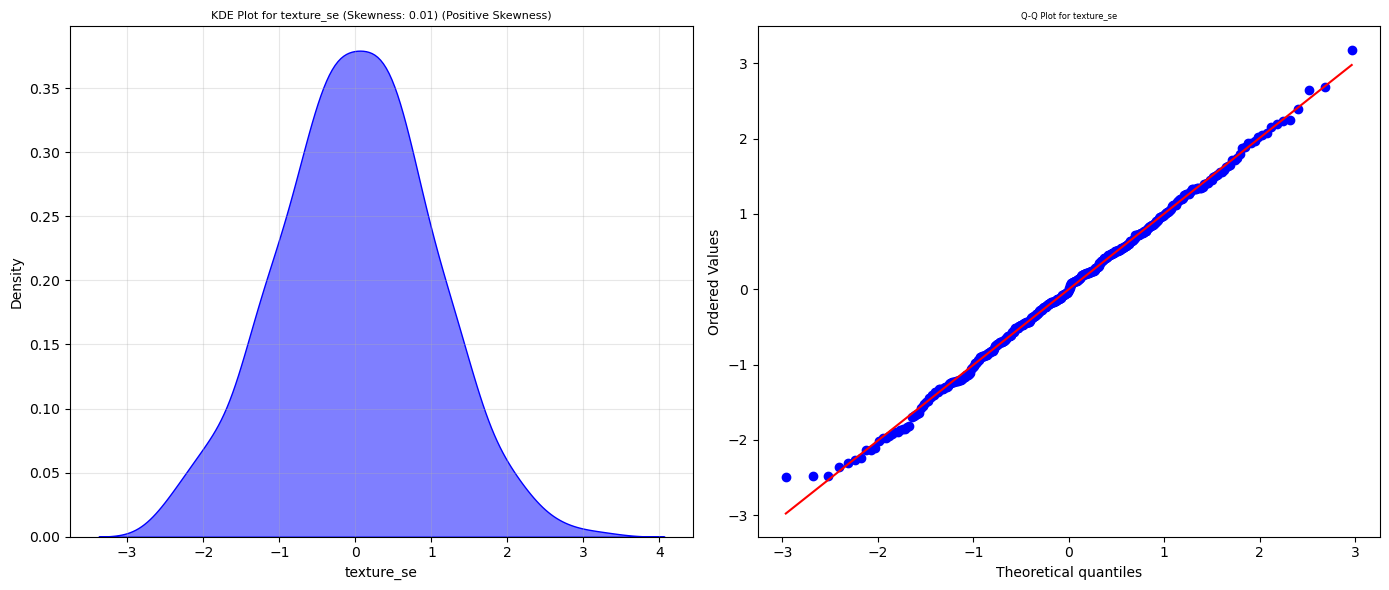

perimeter_se: Skewness = 0.07 (Positive Skewness)


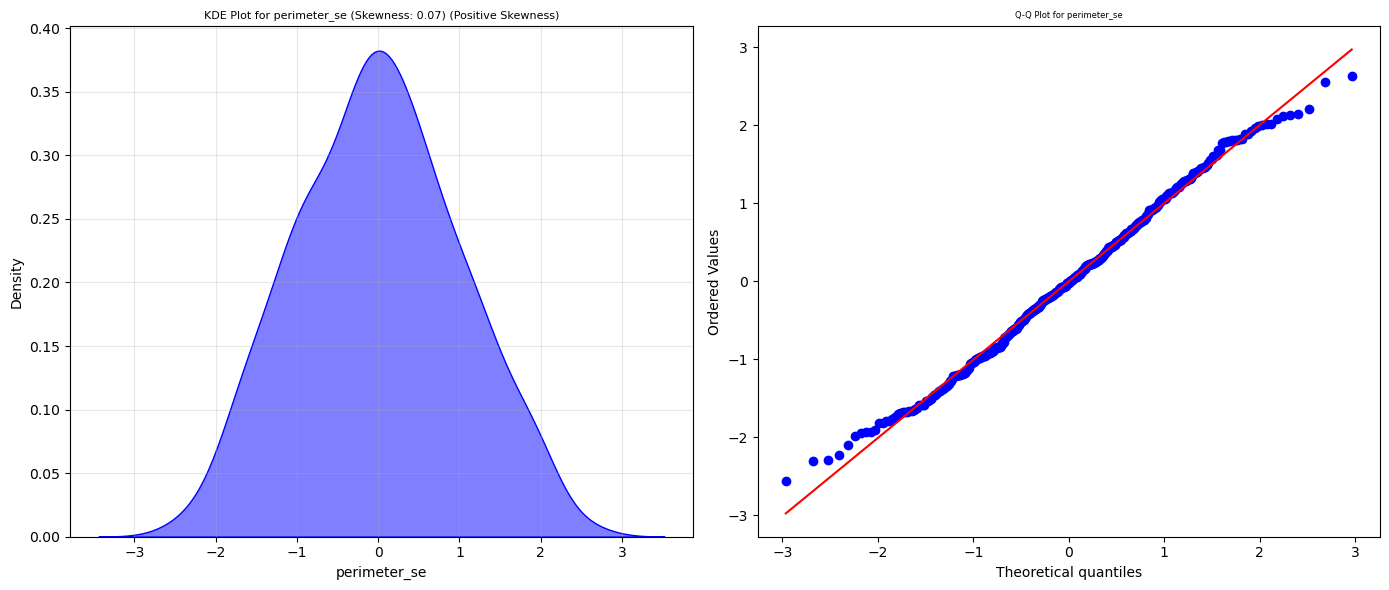

area_se: Skewness = 0.05 (Positive Skewness)


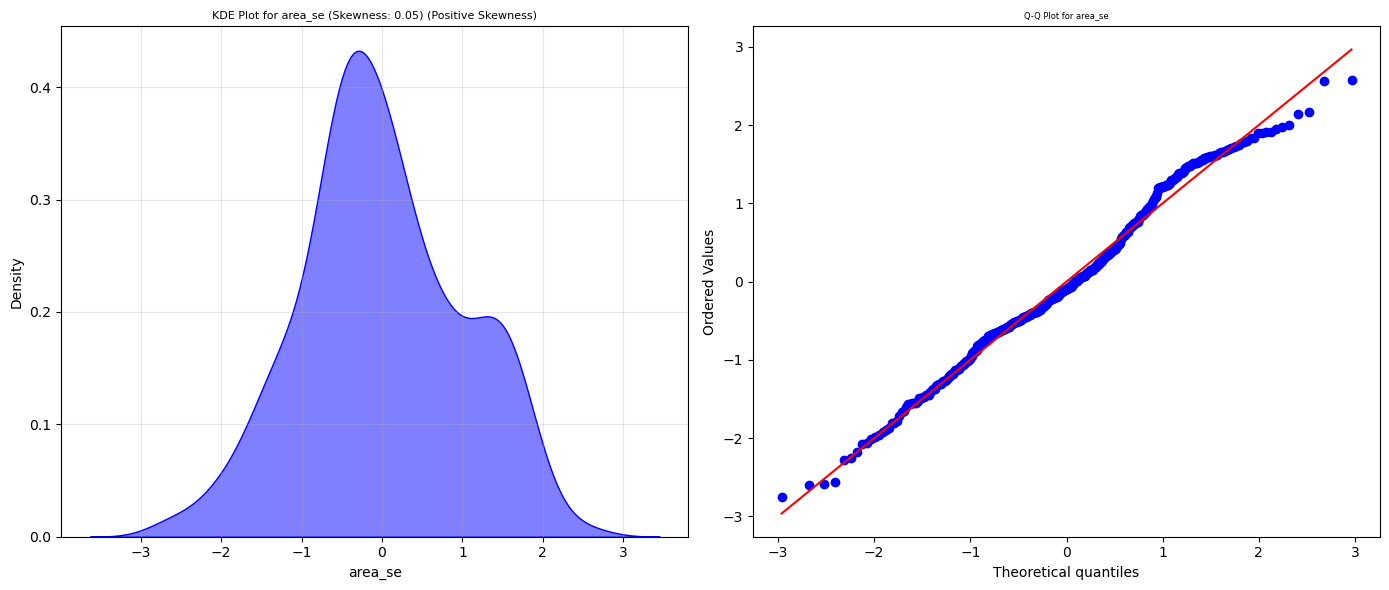

smoothness_se: Skewness = 0.07 (Positive Skewness)


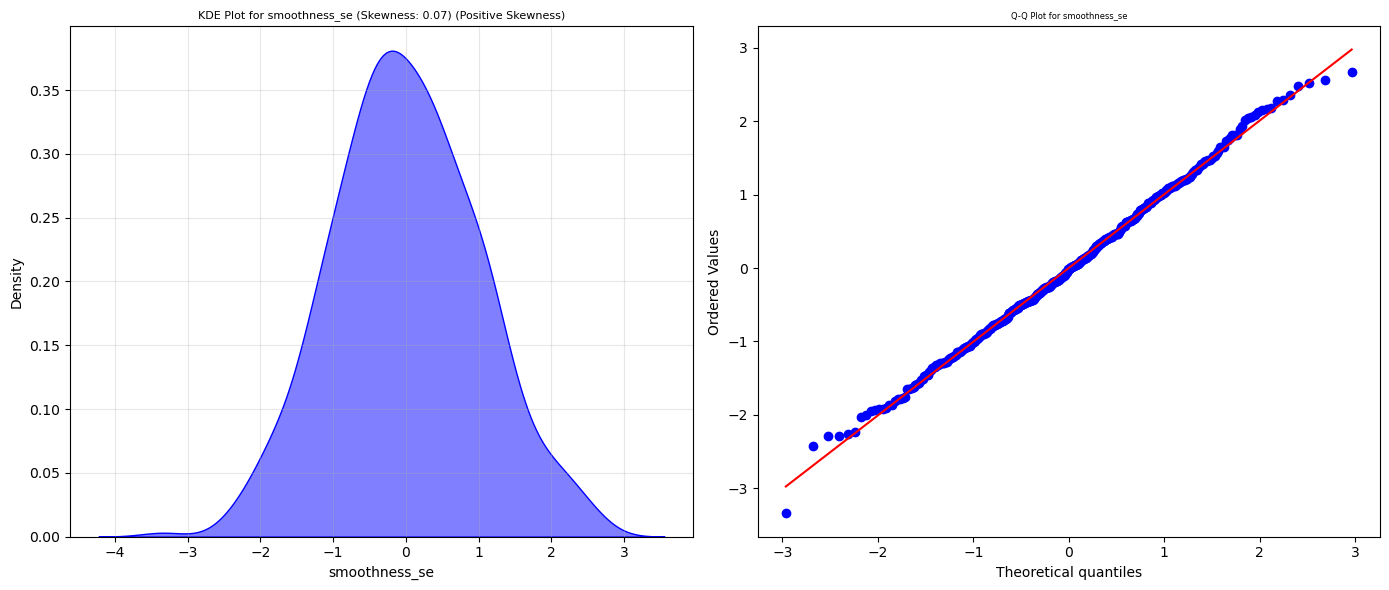

compactness_se: Skewness = 0.22 (Positive Skewness)


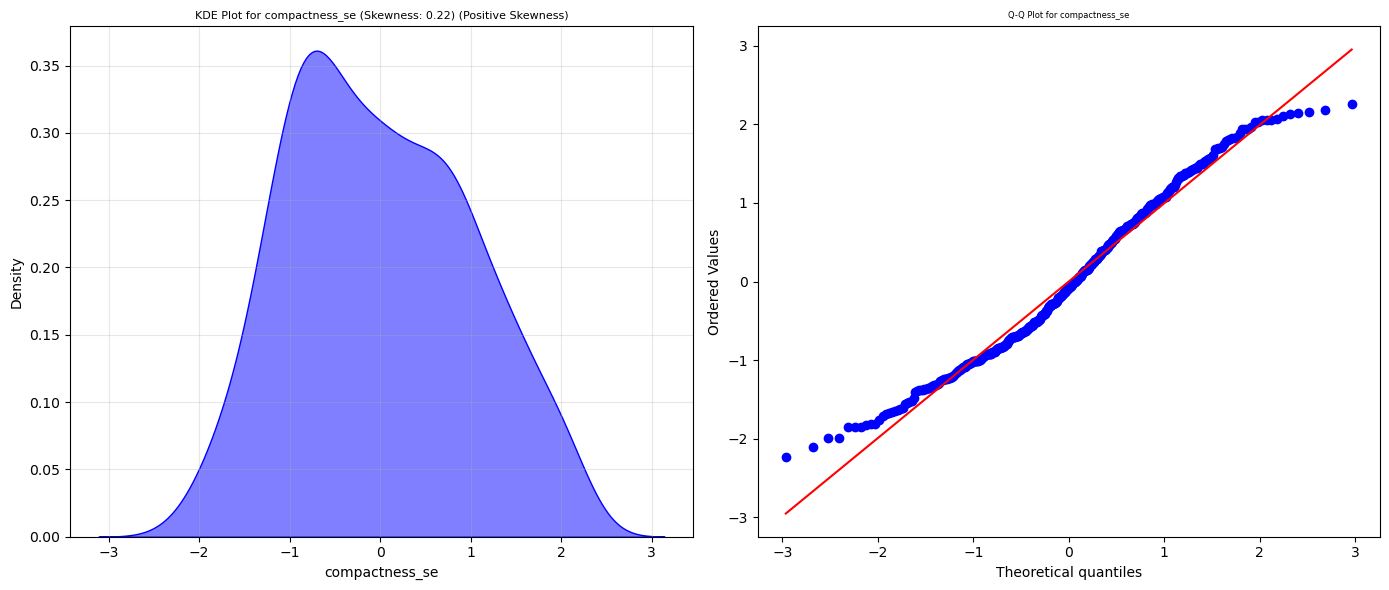

concavity_se: Skewness = 0.16 (Positive Skewness)


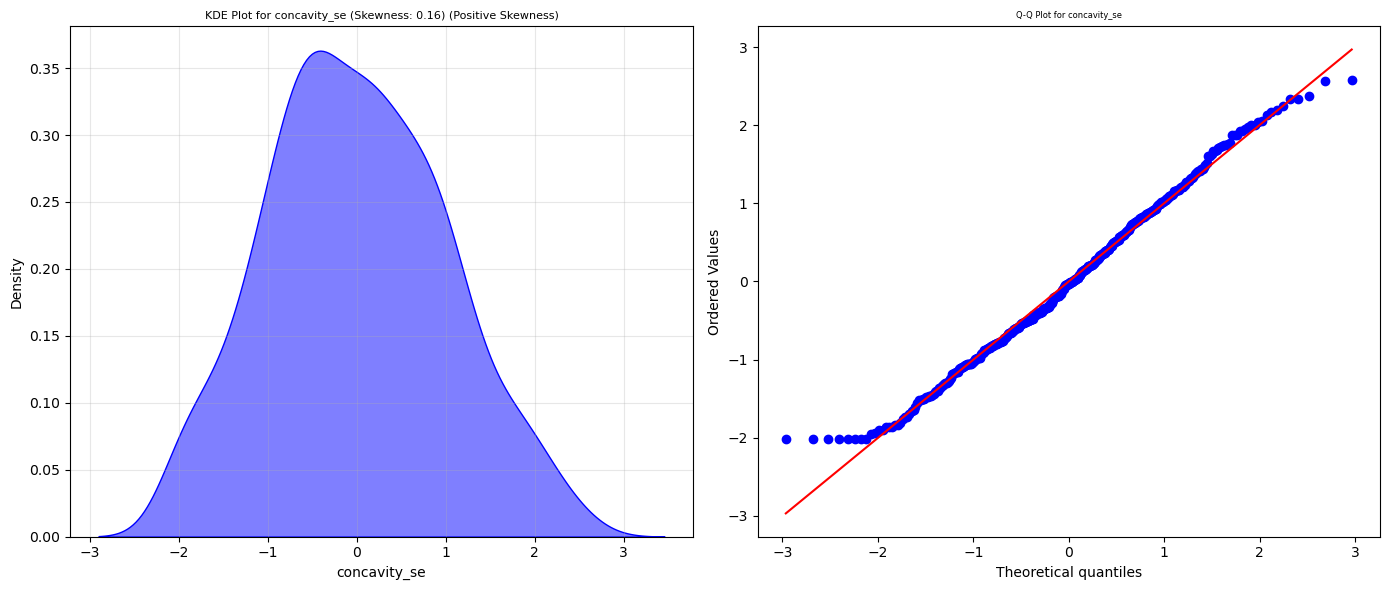

concave points_se: Skewness = -0.04 (Negative Skewness)


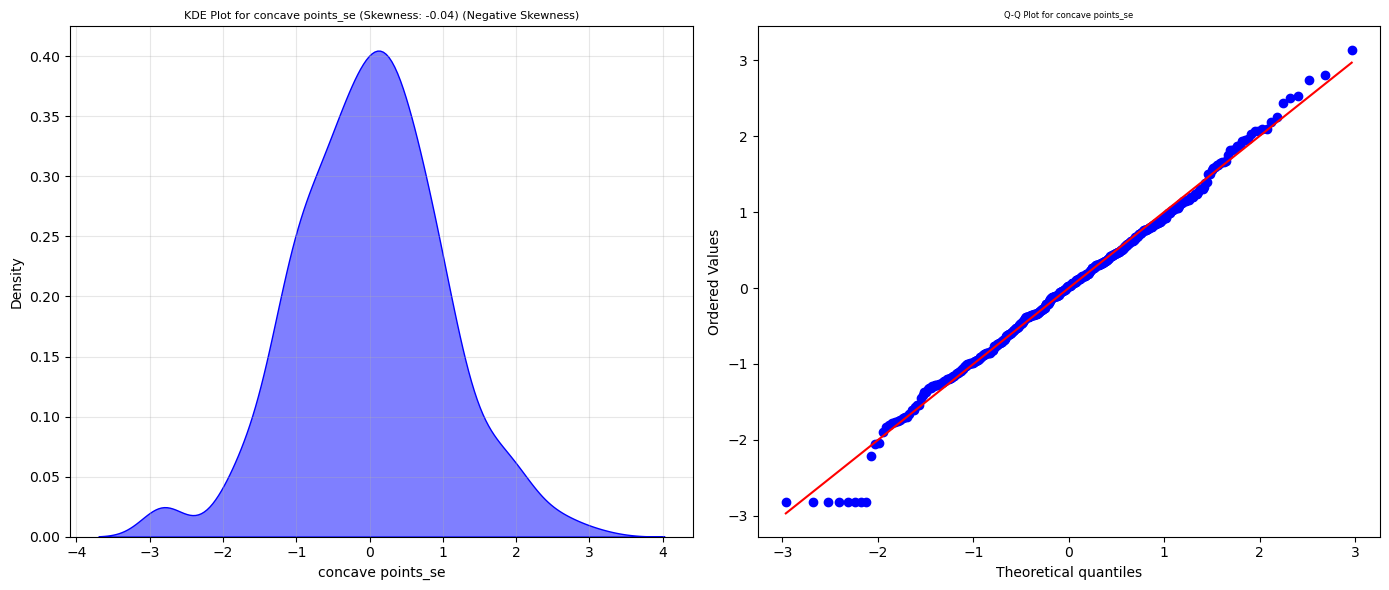

symmetry_se: Skewness = 0.13 (Positive Skewness)


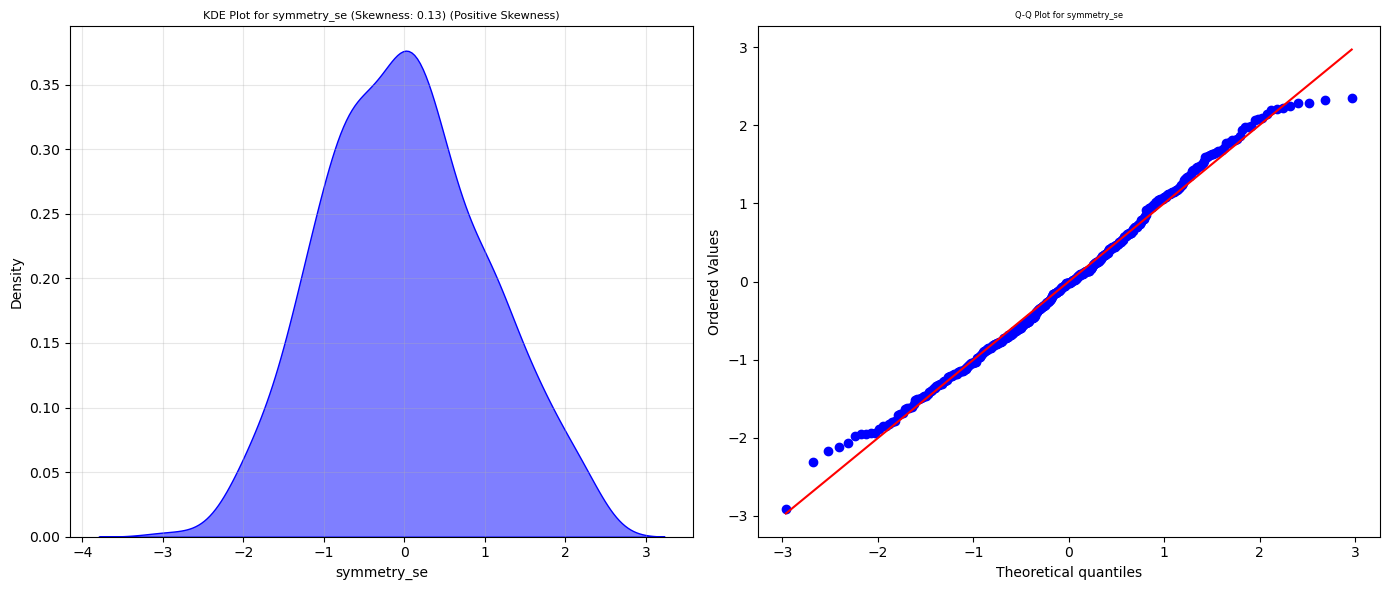

fractal_dimension_se: Skewness = 0.24 (Positive Skewness)


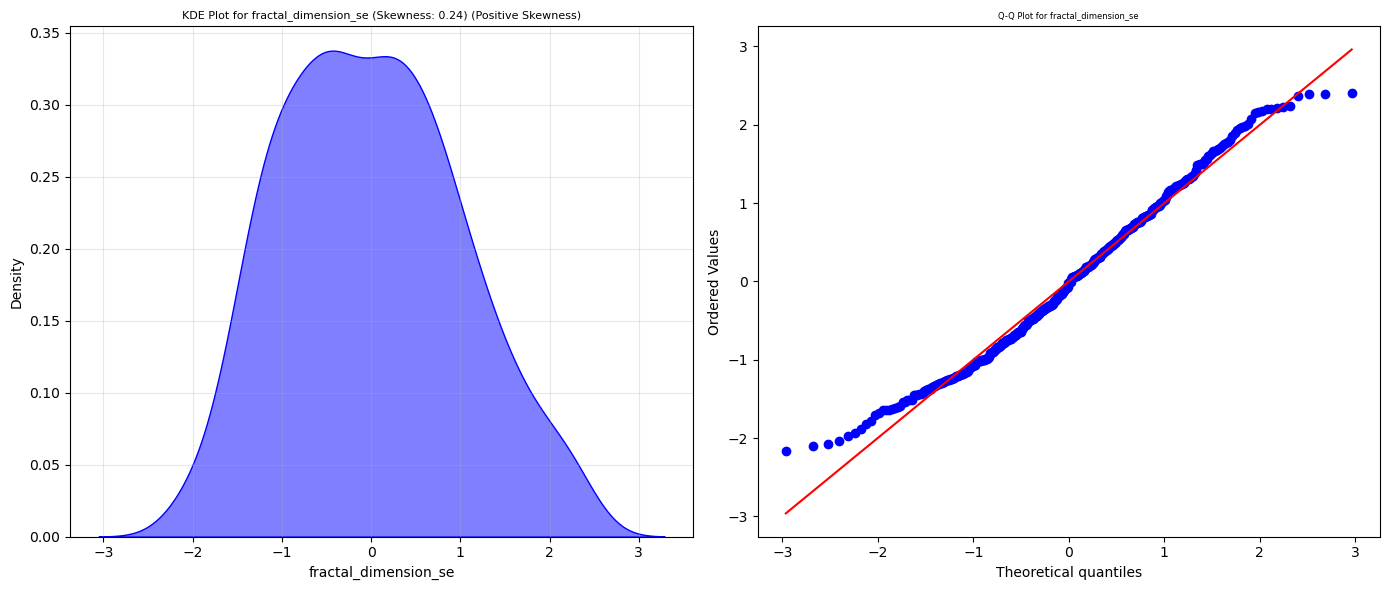

radius_worst: Skewness = 0.04 (Positive Skewness)


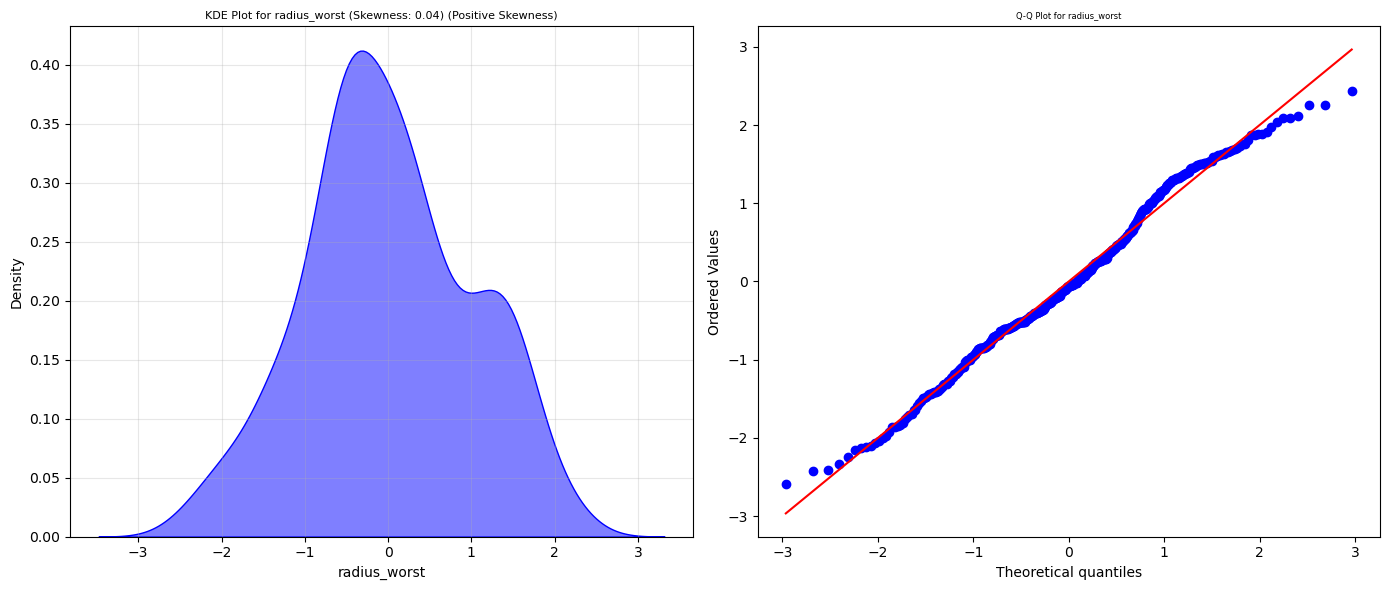

texture_worst: Skewness = -0.00 (Negative Skewness)


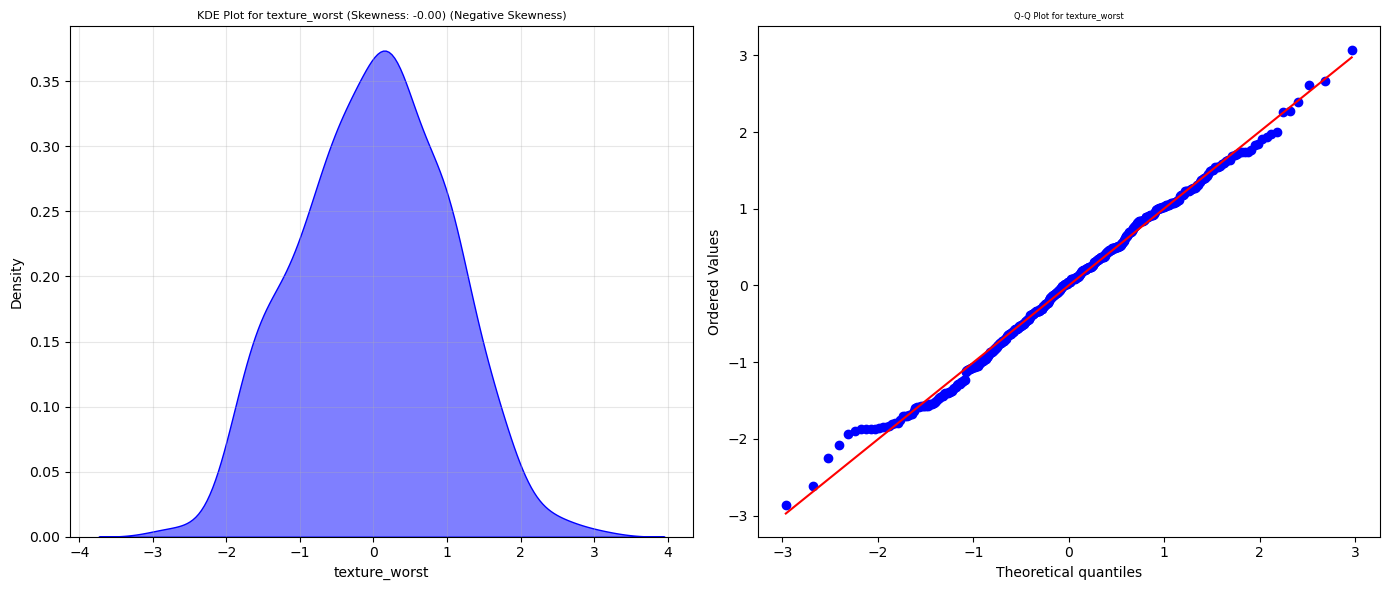

perimeter_worst: Skewness = 0.03 (Positive Skewness)


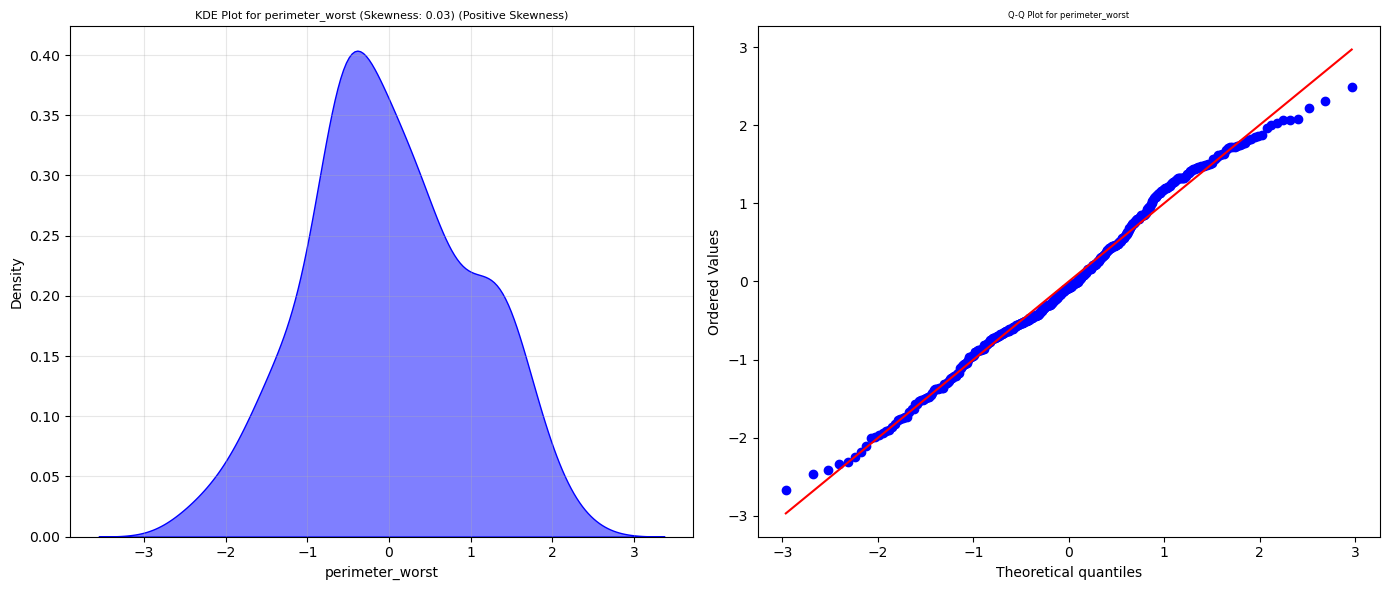

area_worst: Skewness = 0.03 (Positive Skewness)


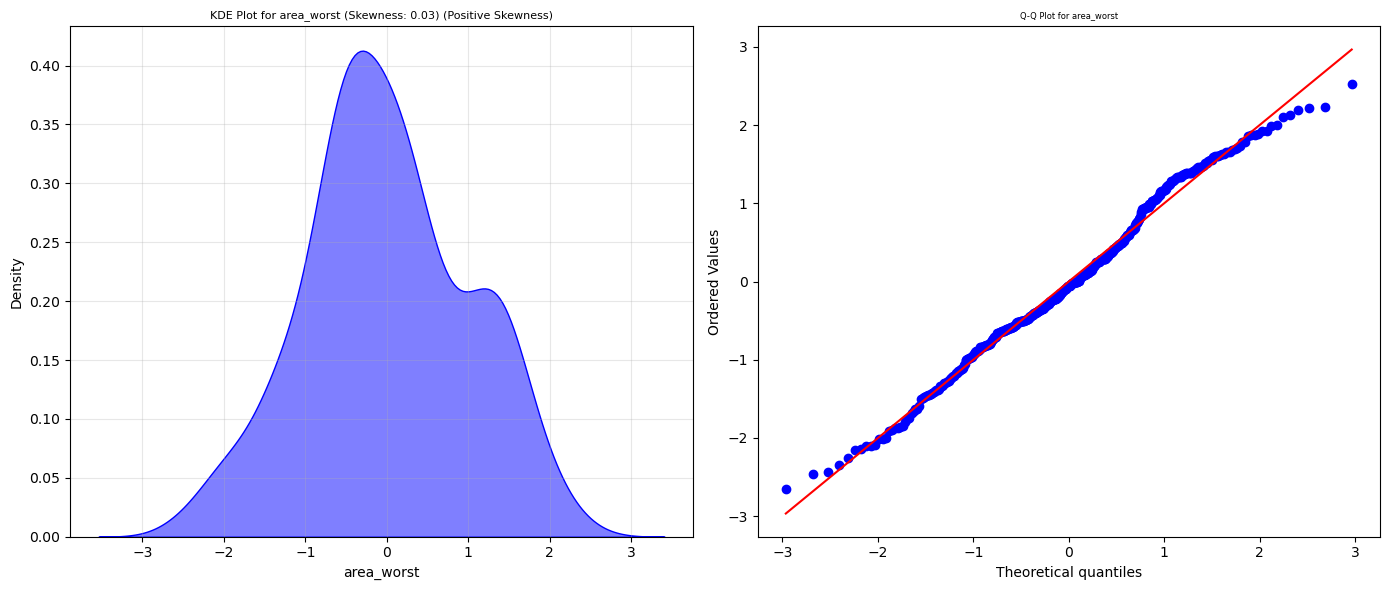

smoothness_worst: Skewness = 0.00 (Positive Skewness)


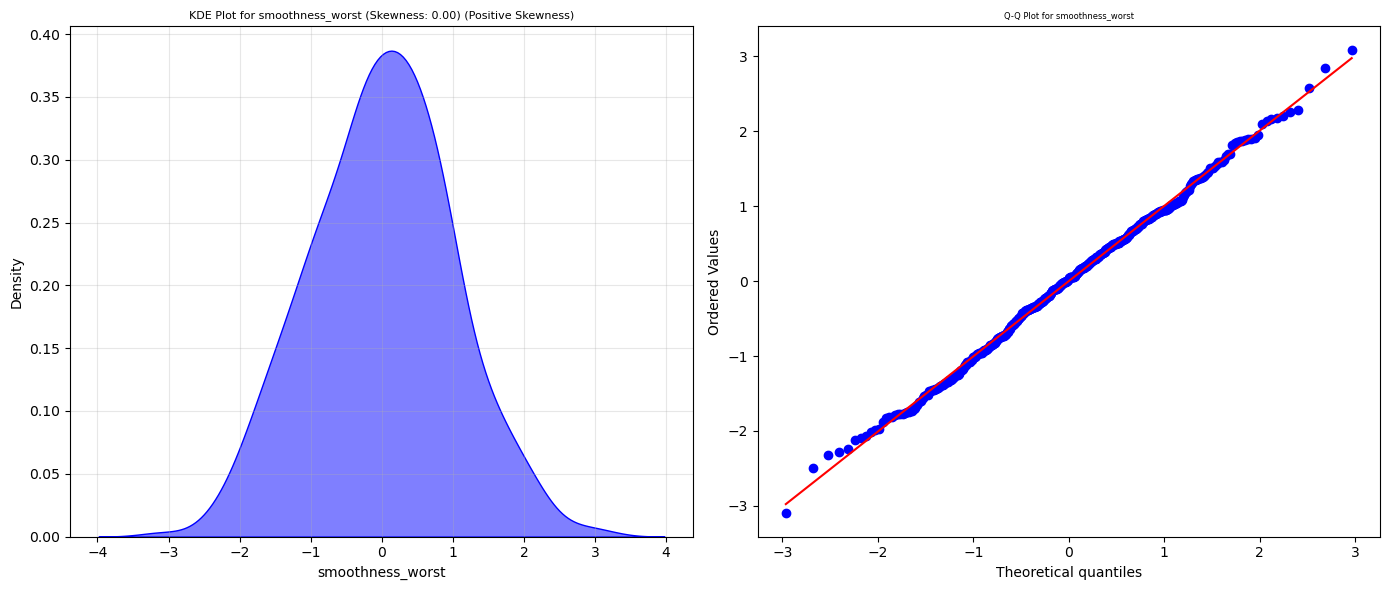

compactness_worst: Skewness = 0.09 (Positive Skewness)


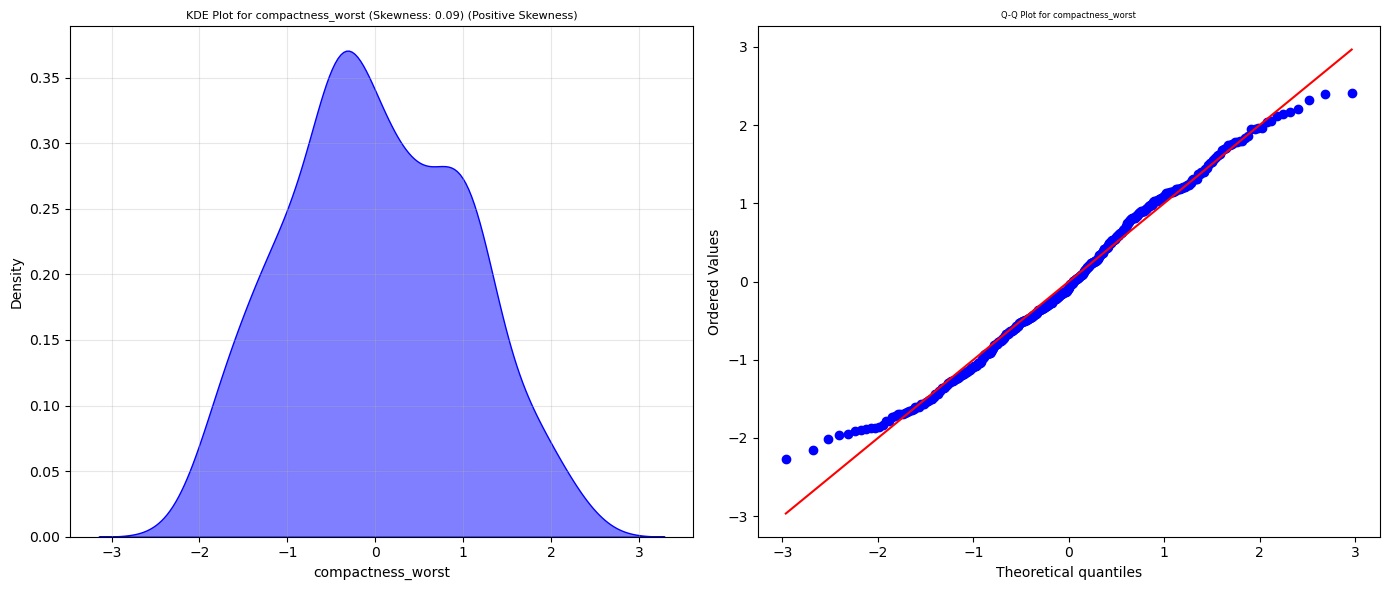

concavity_worst: Skewness = 0.09 (Positive Skewness)


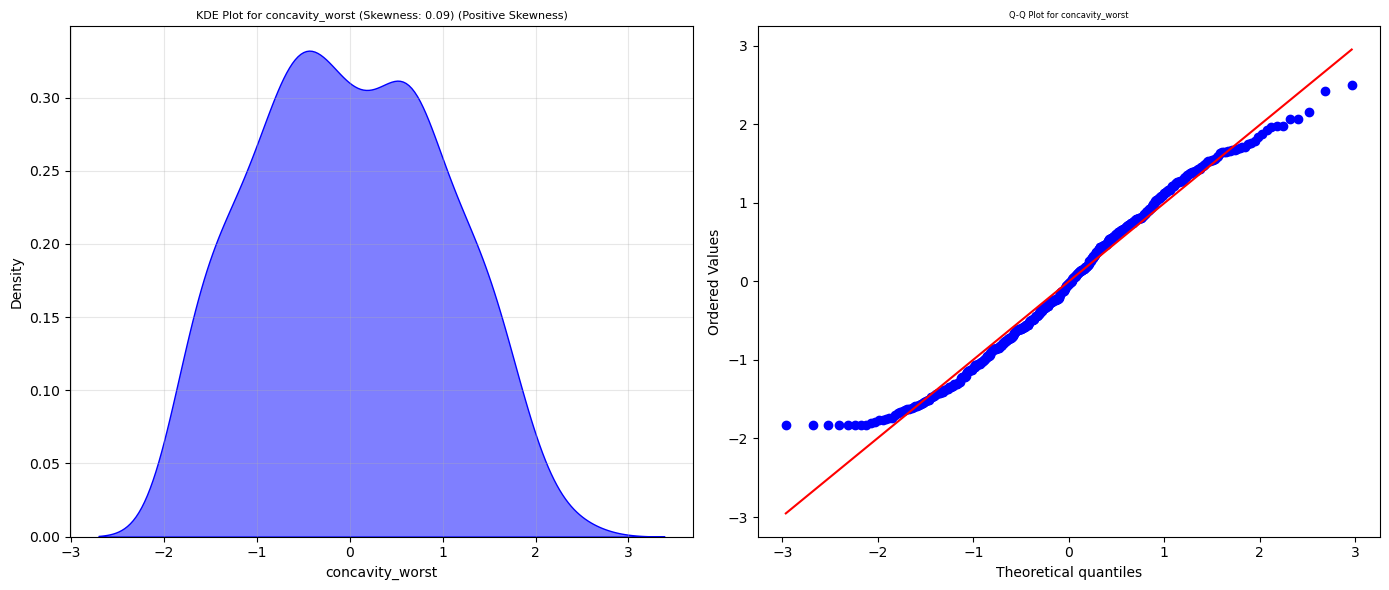

concave points_worst: Skewness = 0.05 (Positive Skewness)


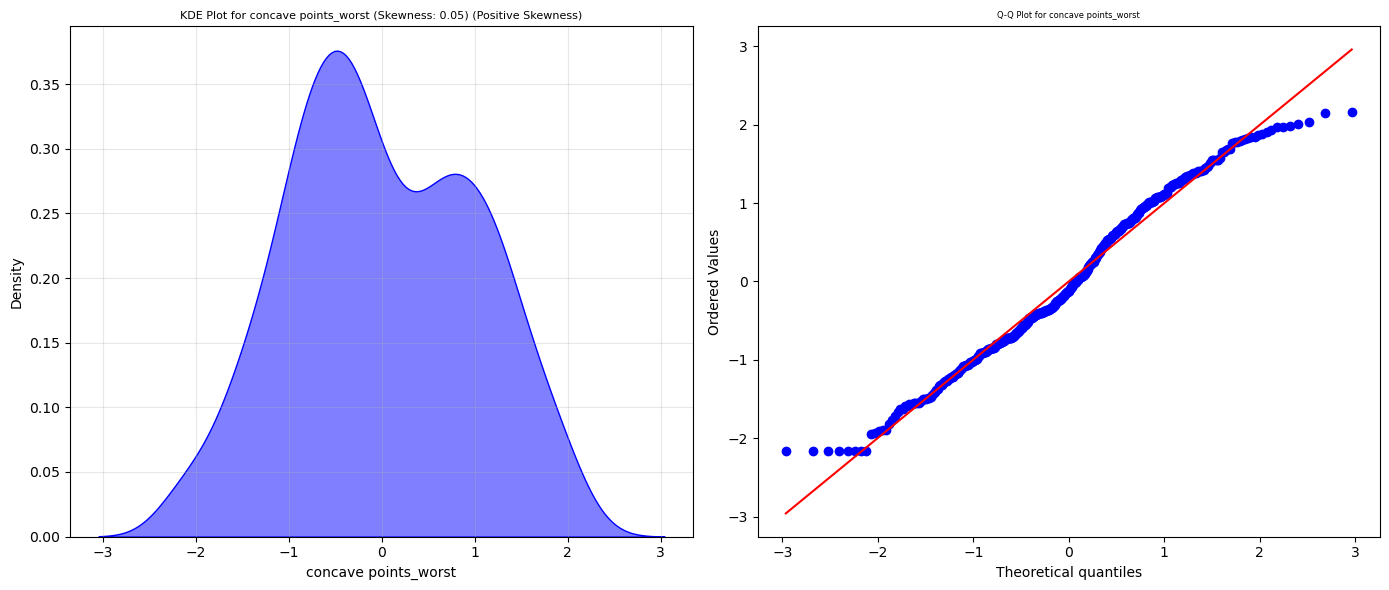

symmetry_worst: Skewness = -0.05 (Negative Skewness)


fractal_dimension_worst: Skewness = 0.08 (Positive Skewness)


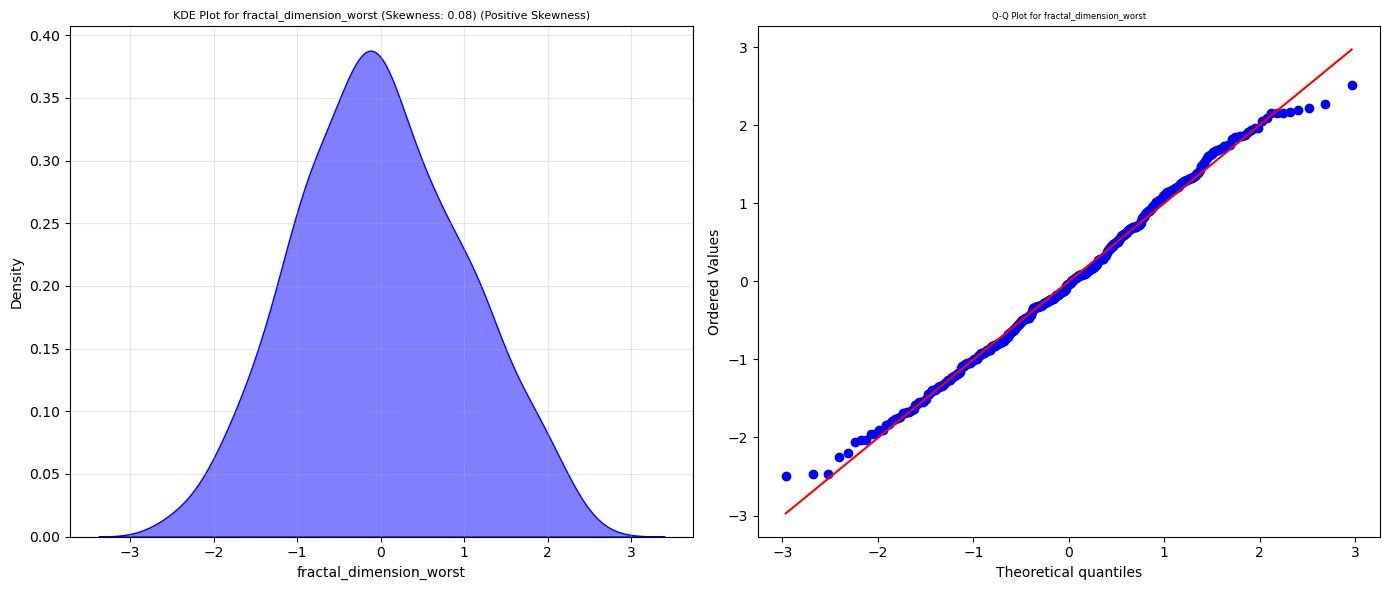

In [21]:
# Loop through each column in the DataFrame
for column in X_train_transformed.columns:
    if np.issubdtype(X_train_transformed[column].dtype, np.number):  # Check if the column is numeric
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a side-by-side plot
        
        skewness = X_train_transformed[column].skew()
        
        # Determine skewness type
        if skewness > 0:
            skew_type = "Positive Skewness"
        elif skewness < 0:
            skew_type = "Negative Skewness"
        else:
            skew_type = "Approximately Symmetrical"
        
        print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
        # KDE plot
        sns.kdeplot(X_train_transformed[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
        skewness = X_train_transformed[column].skew()  # Calculate skewness
        axes[0].set_title(f"KDE Plot for {column} (Skewness: {skewness:.2f}) ({skew_type})", fontsize=8)
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Density')
        axes[0].grid(alpha=0.3)
        
        # Q-Q plot
        stats.probplot(X_train_transformed[column].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q-Q Plot for {column}", fontsize=6)
        
        plt.tight_layout()
        plt.show()

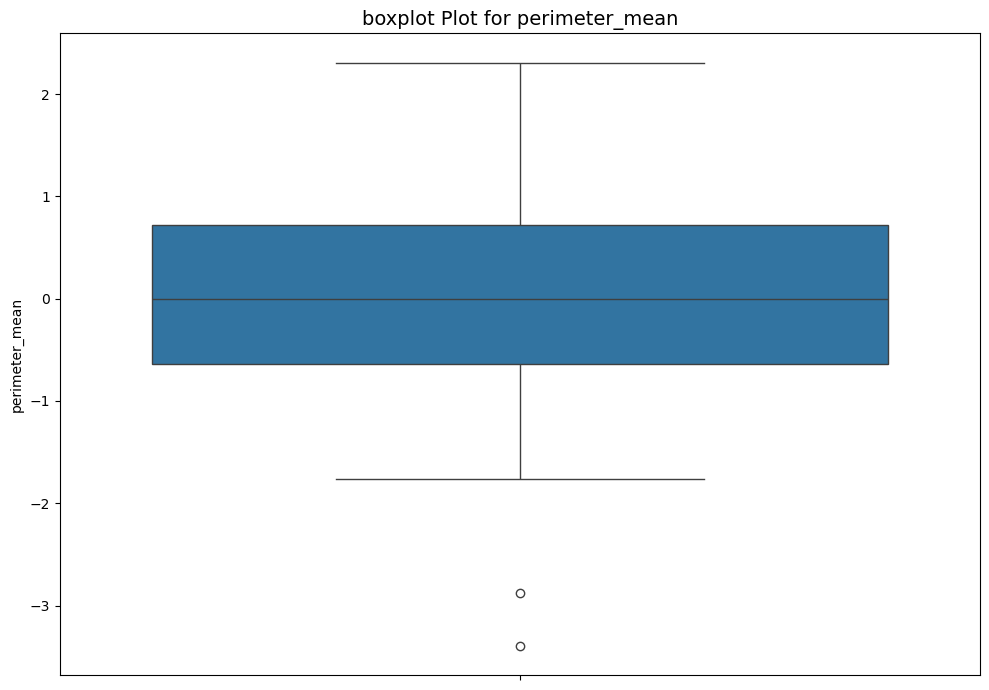

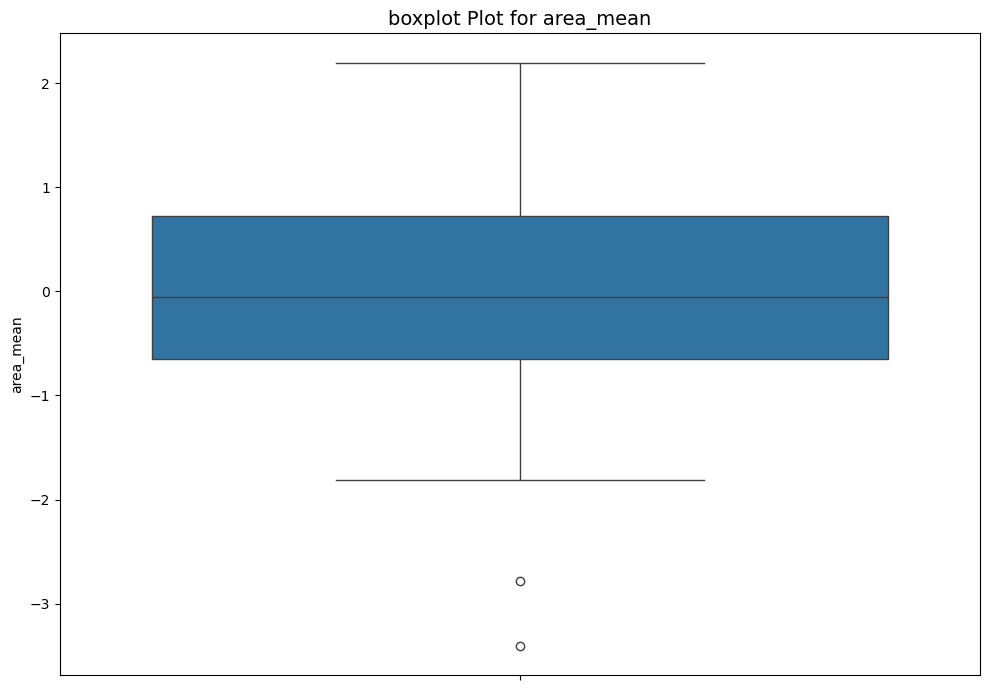

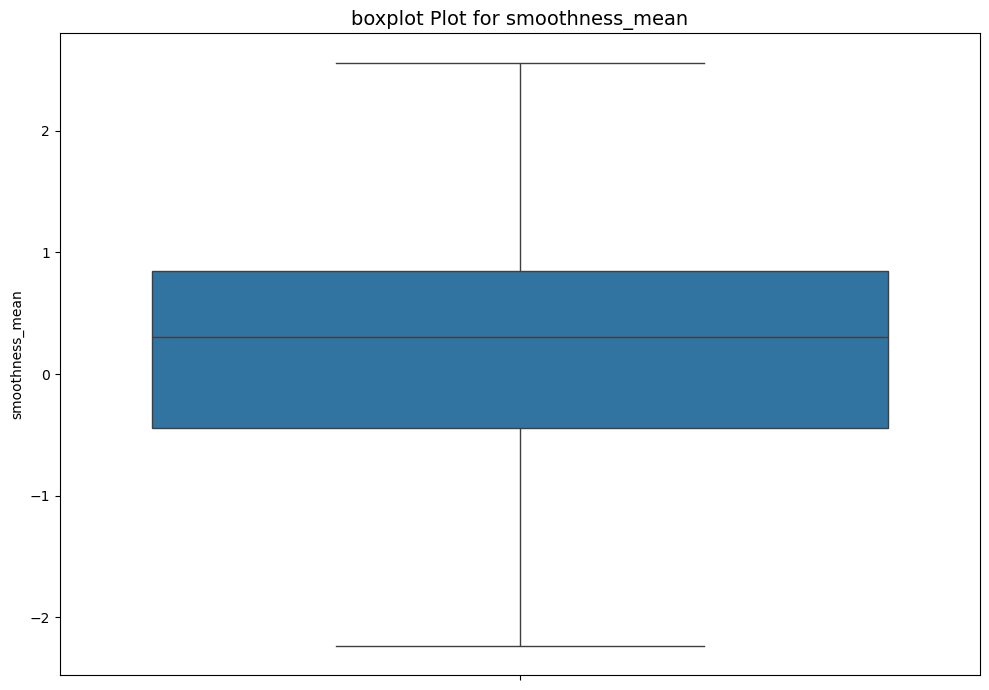

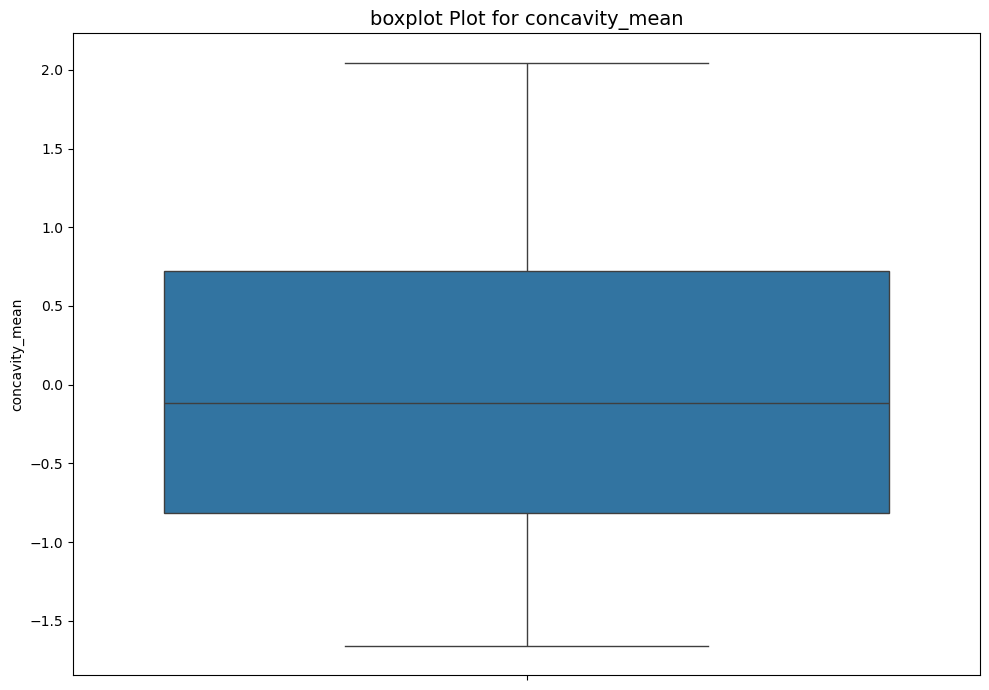

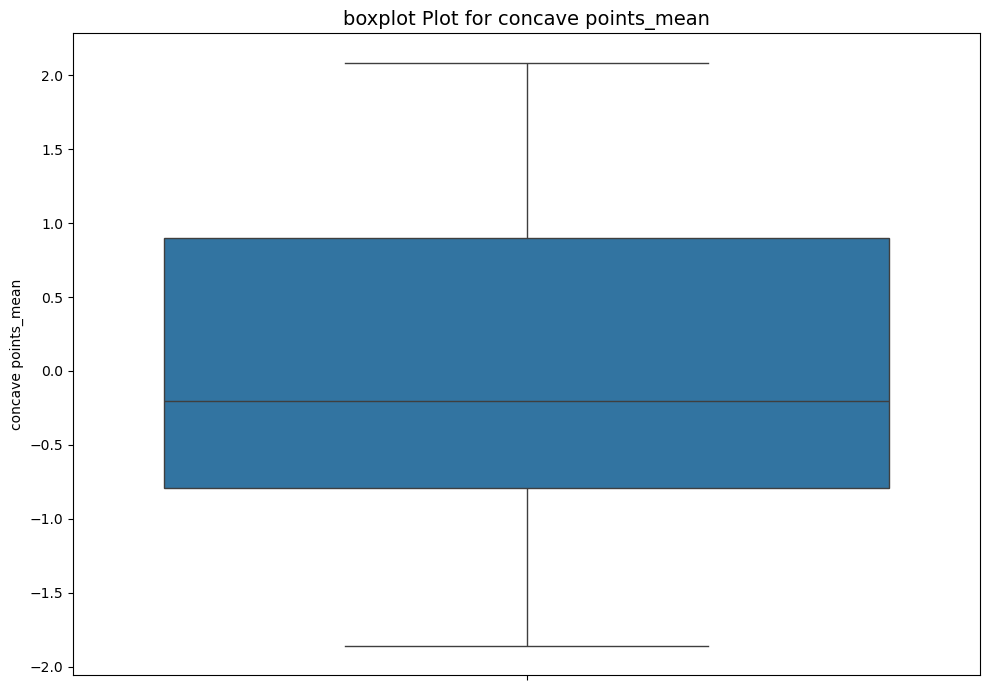

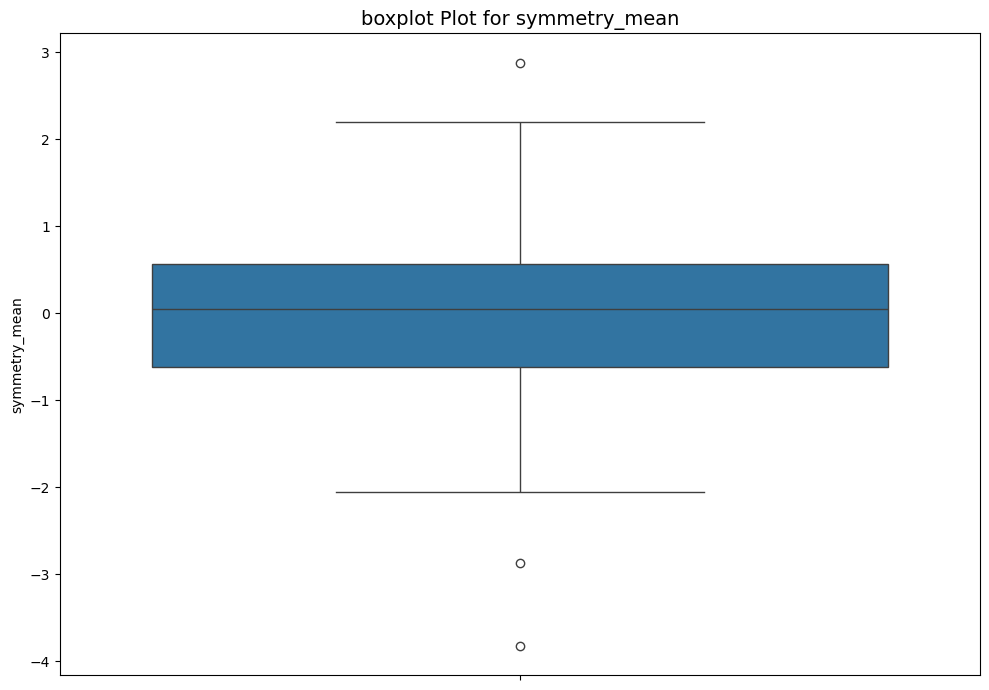

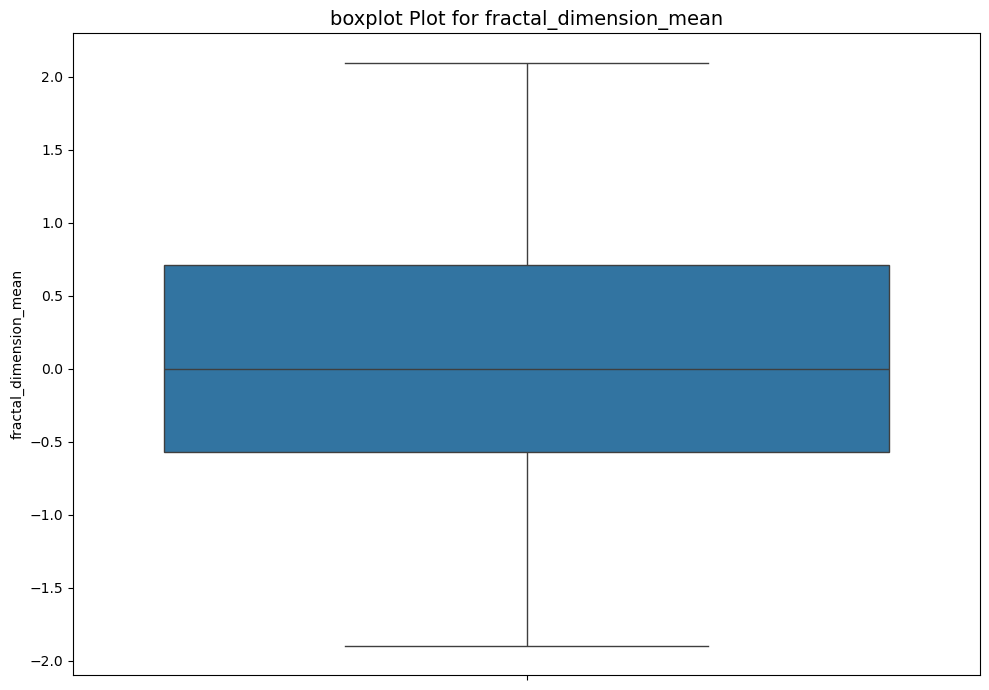

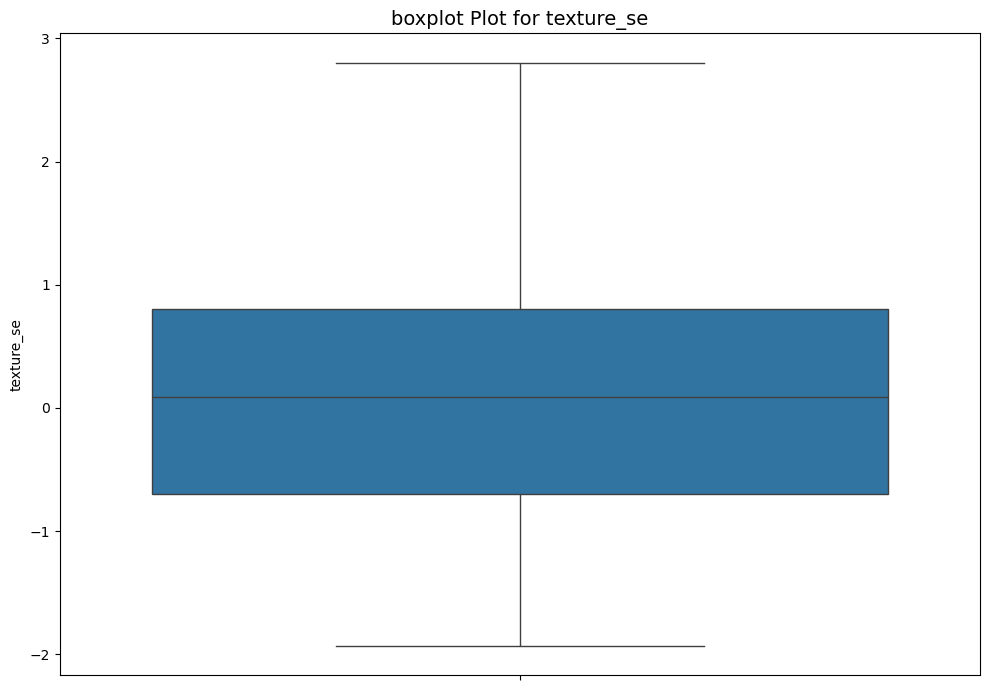

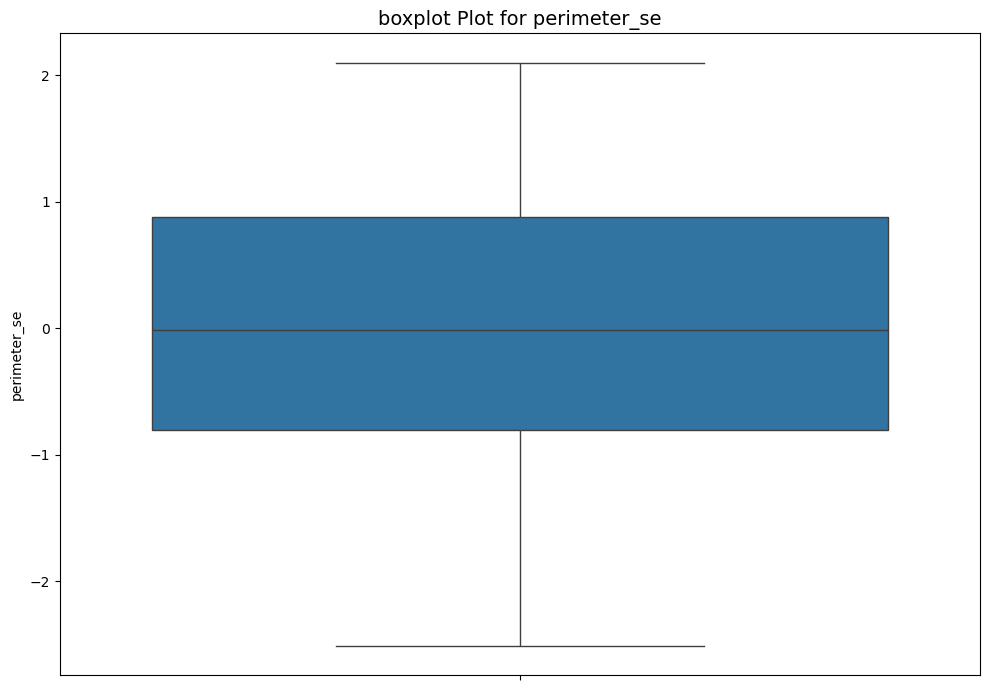

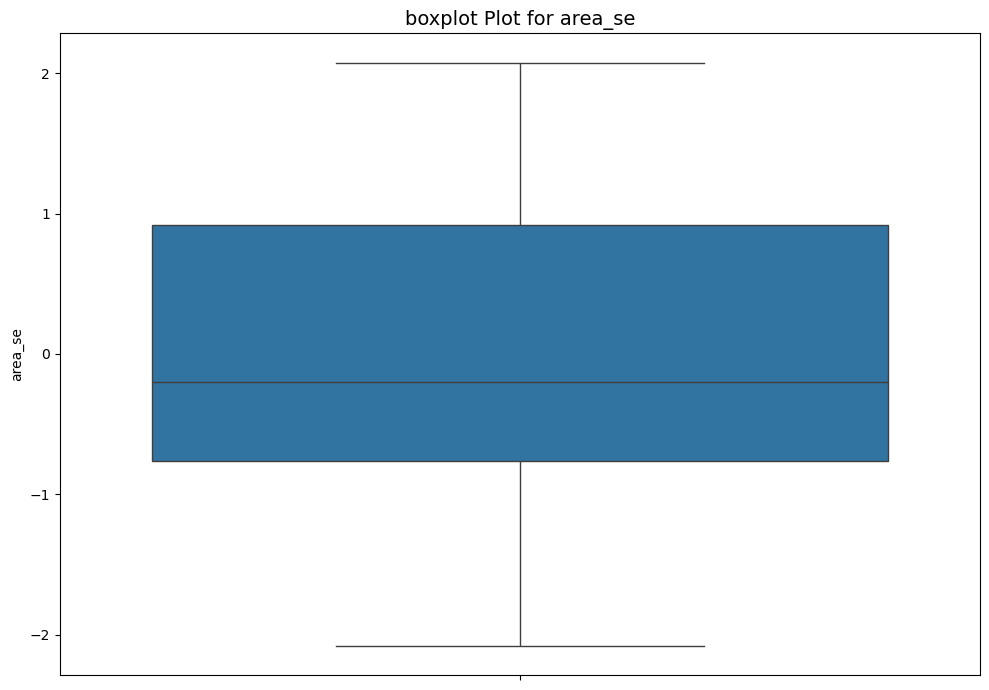

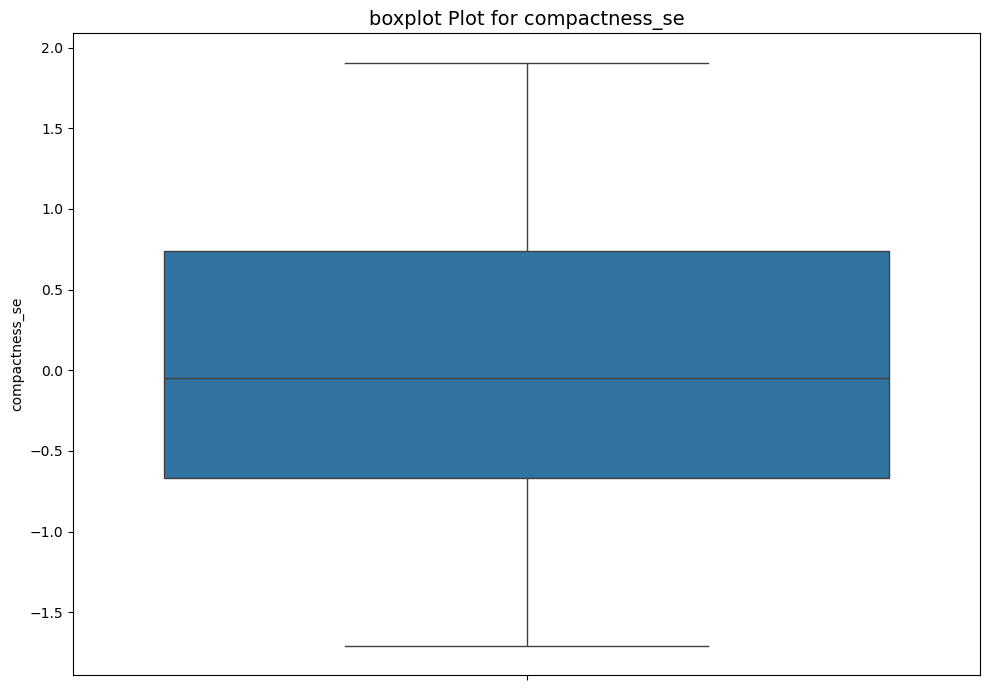

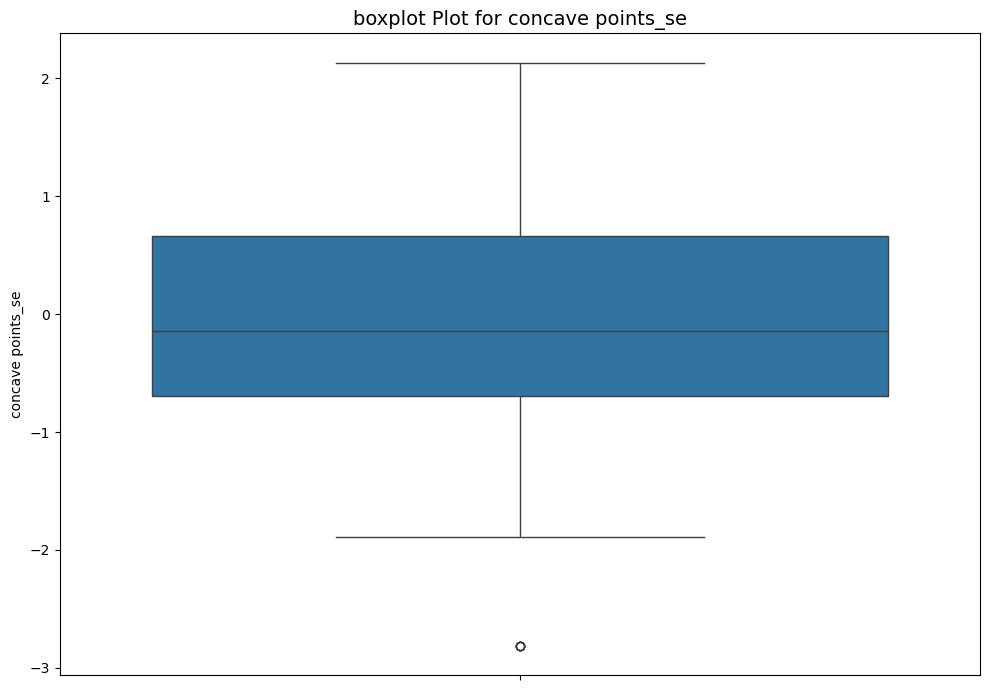

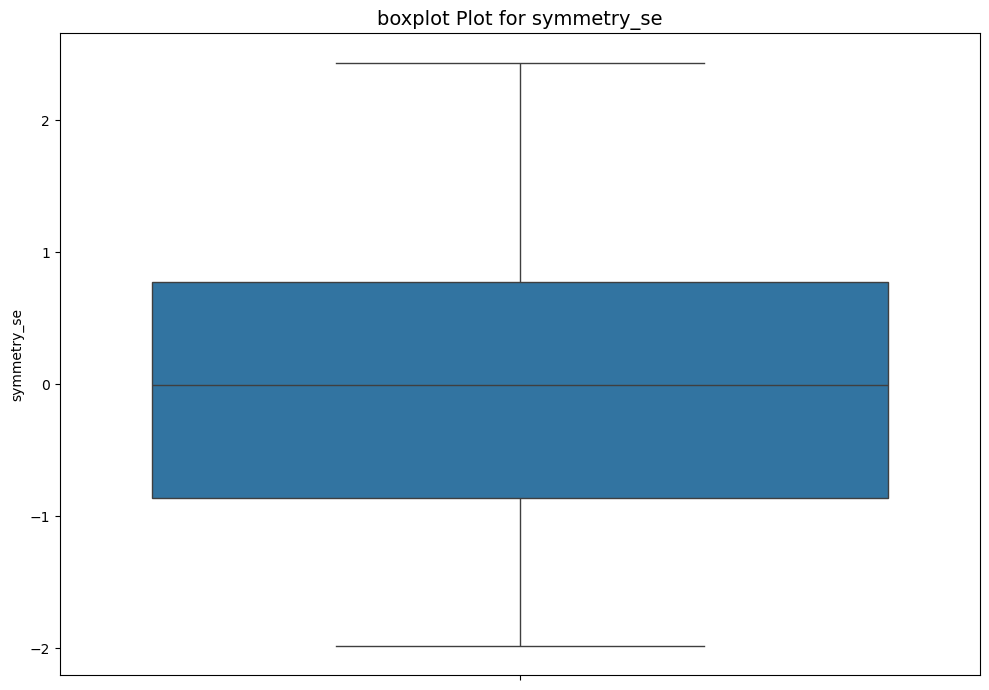

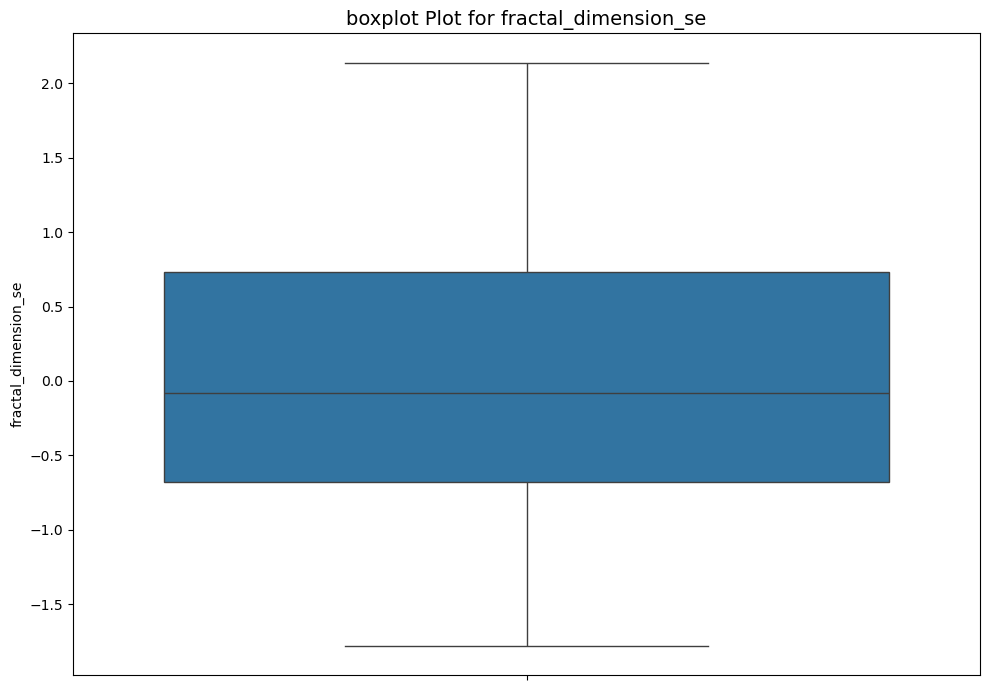

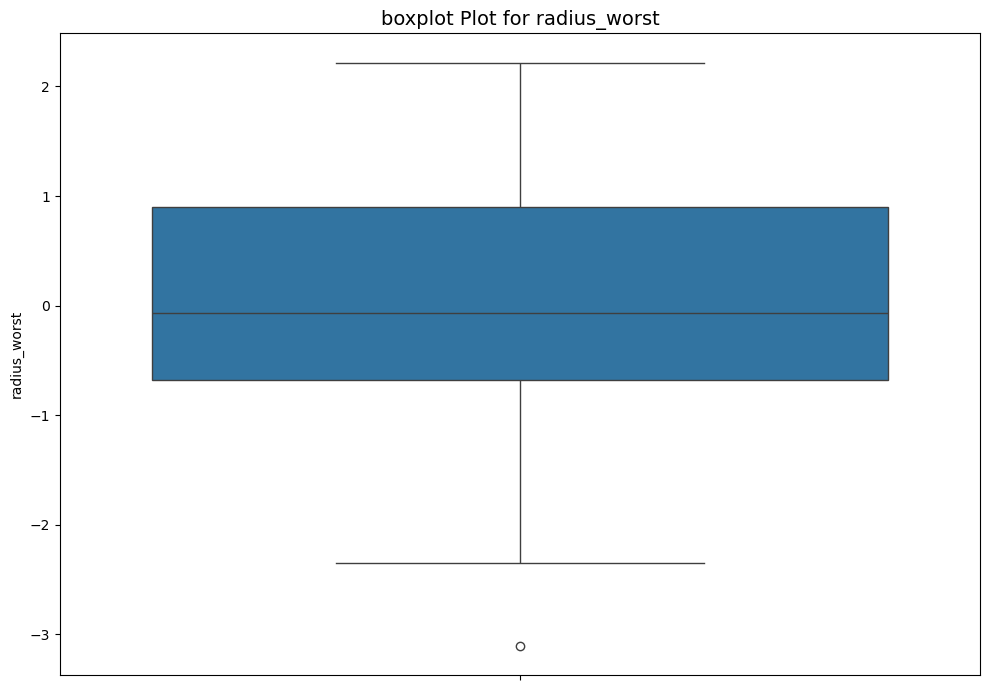

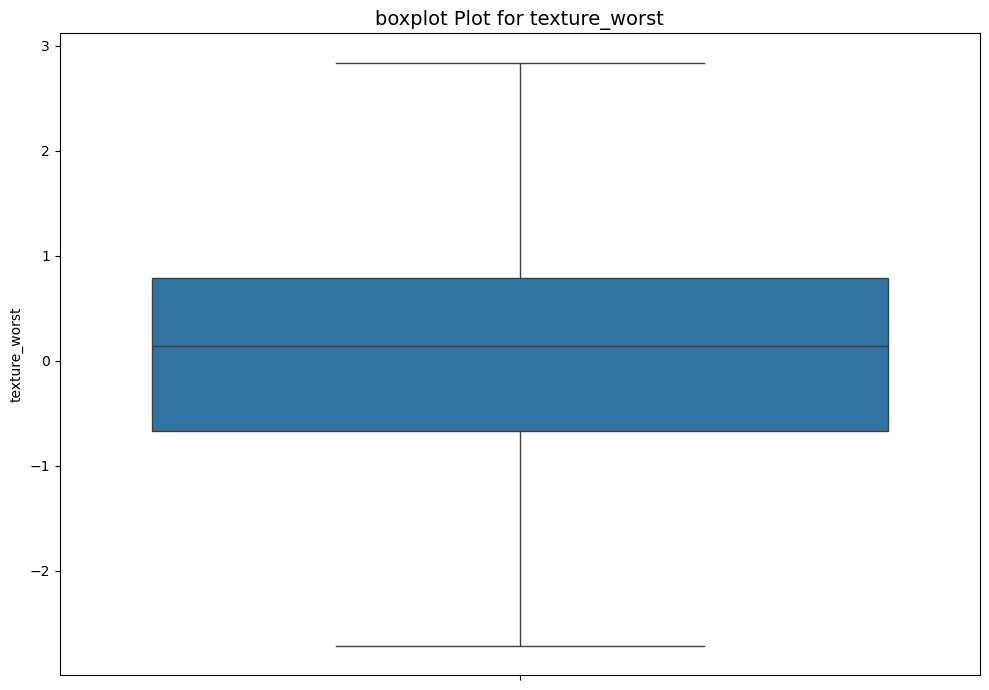

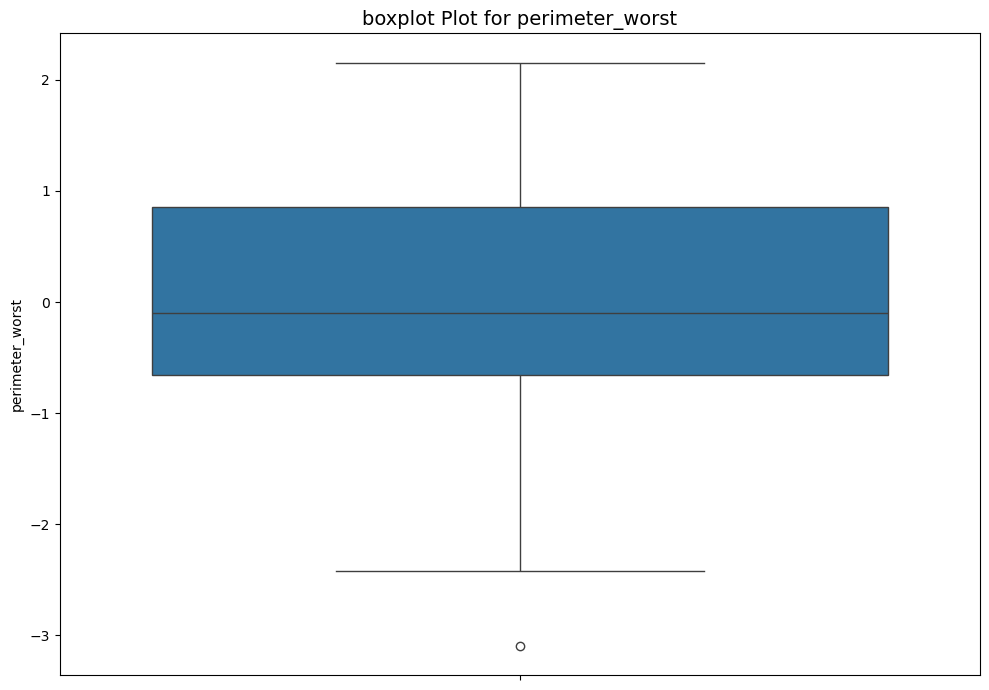

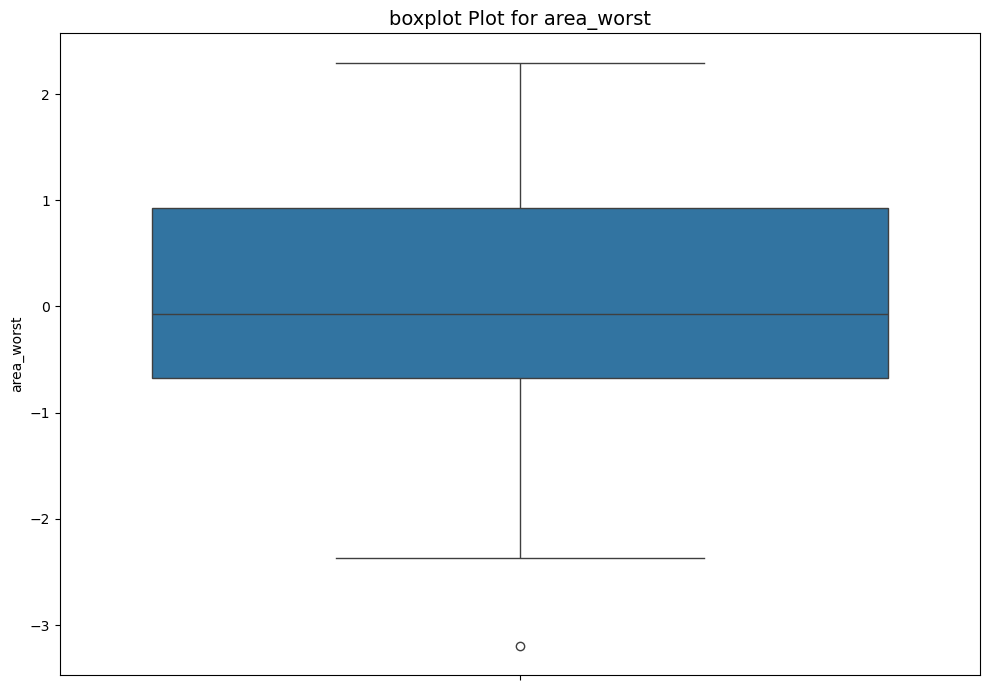

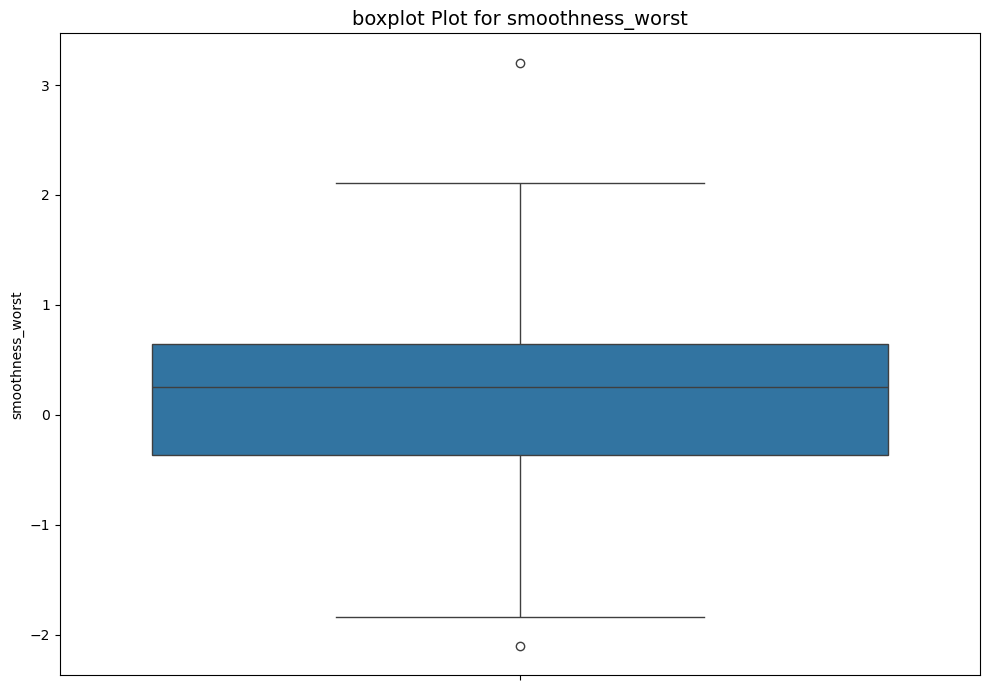

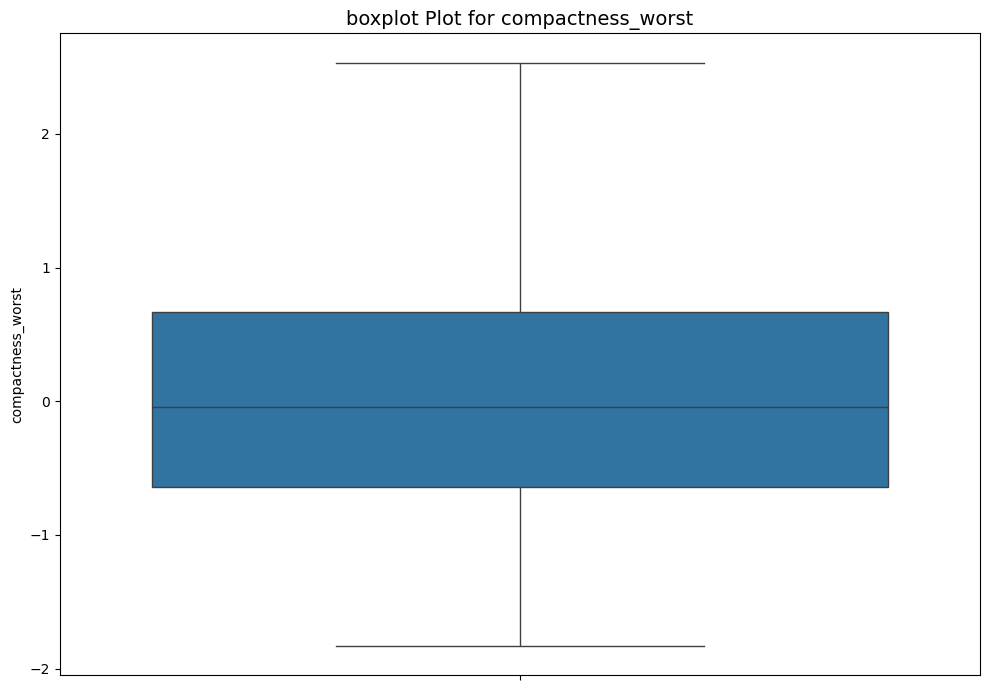

In [22]:
# Loop through each column in the DataFrame
for column in X_test_transformed.columns:
    if np.issubdtype(X_test_transformed[column].dtype, np.number):  # Check if the column is numeric
        plt.figure(figsize=(10, 7))
        
        # KDE plot
        sns.boxplot(X_test_transformed[column])
        plt.title(f"boxplot Plot for {column}", fontsize=14)
    
        # plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

In [23]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Make a copy to avoid modifying the original DataFrame

    # Loop through numeric columns and cap outliers based on IQR
    for column in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper bound
        df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)

    return df_capped

In [24]:
# Fit and transform the data
X_train_transformed_out = cap_outliers_iqr(X_train_transformed)
X_test_transformed_out = cap_outliers_iqr(X_test_transformed)

In [25]:
X_test_transformed_out.shape,X_train_transformed_out.shape

((114, 30), (455, 30))

In [26]:
# Convert the transformed data back to a DataFrame (keeping original column names)
X_train_transformed_out_df = pd.DataFrame(X_train_transformed_out, columns=X_train_transformed.columns)
X_test_transformed_out_df = pd.DataFrame(X_test_transformed_out, columns=X_test_transformed.columns)
X_train_transformed_out_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -1.916535     -0.352411       -1.802848  -1.883764         0.820044   
1       1.699088      1.593731        1.756689   1.608284         1.295858   
2      -1.834107     -1.385035       -1.768097  -1.780265        -1.416490   
3      -1.086072      1.358717       -1.099777  -1.082211         0.127551   
4      -1.311450     -1.055986       -1.345718  -1.337685         1.252881   
..           ...           ...             ...        ...              ...   
450    -1.999134     -1.131270       -1.802848  -1.951191         0.218280   
451    -0.665790     -0.094536       -0.646474  -0.681608         1.301974   
452     0.235167     -0.489969        0.125248   0.240429        -2.623821   
453     0.143300      0.217211        0.161415   0.129694         0.780477   
454    -0.458427      0.422237       -0.528586  -0.443768        -1.164402   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.901411        1.903073             0.136915       1.118094   
1            2.210581        1.675694             1.885634       1.874970   
2           -0.143822       -0.172040            -0.700786       1.743645   
3           -0.536485       -0.974966            -0.965221       0.424666   
4           -0.316012       -1.329978            -1.127971       2.601464   
..                ...             ...                  ...            ...   
450          1.074422        0.274754            -0.406312       0.442258   
451          0.179660        0.024490            -0.169913       0.072796   
452         -2.090191       -1.435776            -1.487341      -1.188348   
453          0.416479        0.639431             0.716267      -0.458032   
454         -1.557353       -0.973930            -0.890399      -0.169430   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  1.983966  ...     -1.692201      -0.405235   
1                  1.510829  ...      1.756155       1.269366   
2                  1.089515  ...     -1.839596      -1.069720   
3                  0.272557  ...     -0.886628       1.491834   
4                  1.086260  ...     -1.370059      -1.453761   
..                      ...  ...           ...            ...   
450                2.437032  ...     -1.982307      -1.870241   
451                0.548204  ...     -0.584700       0.677922   
452               -1.613082  ...     -0.076069      -0.783179   
453                0.580903  ...      0.414728       0.901338   
454               -0.910891  ...     -0.521539       1.183719   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0          -1.746461   -1.680205          0.762864           1.261414   
1           1.709411    1.703855          0.798725           2.146080   
2          -1.739962   -1.793983         -1.536757          -0.467877   
3          -0.965592   -0.894508          0.830451          -0.754720   
4          -1.447588   -1.375617         -0.113859          -1.233275   
..               ...         ...               ...                ...   
450        -1.967177   -2.012793         -0.424965           0.180870   
451        -0.587257   -0.605346          1.540553           0.342763   
452        -0.204257   -0.063118         -2.235559          -1.899227   
453         0.453734    0.373747          1.267586           0.891293   
454        -0.630960   -0.504205         -0.826324          -1.361697   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.504454              0.980344        1.849870   
1           1.642220              2.151342        1.728193   
2          -0.592724             -1.006365        0.761014   
3          -0.796734             -0.797347        0.938374   
4          -1.598342             -1.545276        1.131296   
..               ...                   ...             ...   
450        -0.566078             -1.068058       -1

In [27]:
X_train_transformed_out_df.shape,X_test_transformed_out_df.shape

((455, 30), (114, 30))

In [28]:
# for column in X_train_transformed_out_df.columns:
#     if np.issubdtype(X_train_transformed_out_df[column].dtype, np.number):  # Check if the column is numeric
#         plt.figure(figsize=(7, 2))
        
#         # KDE plot
#         sns.boxplot(X_train_transformed_out_df[column])
#         plt.title(f"boxplot Plot for {column}", fontsize=14)
    
#         # plt.grid(alpha=0.3)
#         plt.tight_layout()
#         plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_transformed_out_df)

X_train_scaled = scaler.transform(X_train_transformed_out_df)
X_test_scaled = scaler.transform(X_test_transformed_out_df)

In [30]:
X_test_scaled.shape

(114, 30)

In [31]:
y_test.shape

(114,)

In [32]:
from sklearn.preprocessing import OneHotEncoder
trf2 = ColumnTransformer([
    ('diagnosis_encoded',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),None)
],remainder='passthrough')

In [33]:
y_train_en = pd.get_dummies(y_train, columns=['diagnosis'], drop_first=True,dtype=int).values
y_test_en = pd.get_dummies(y_test, columns=['diagnosis'], drop_first=True,dtype=int).values

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [35]:
# Initialize the KNN model (you can adjust n_neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
# Fit the model to the training data
knn.fit(X_train_scaled, y_train_en.ravel())

KNeighborsClassifier(n_neighbors=3)

In [100]:
# Predict on the test set
y_pred = knn.predict(X_test_scaled)

In [38]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [39]:
y_test

204    B
70     M
131    M
431    B
540    B
      ..
486    B
75     M
249    B
238    B
265    M
Name: diagnosis, Length: 114, dtype: object

In [40]:
y_test_en.ravel()

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [41]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test_en, y_pred)

In [42]:
accuracy

0.956140350877193

In [43]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test_en, y_pred)

In [44]:
cm

array([[68,  3],
       [ 2, 41]], dtype=int64)

In [45]:
def count_class(y, y_p):
    b = 0  # True Negative
    m = 0  # True Positive
    f = 0  # False Positive / False Negative (You can adjust based on your preference)
    
    # Loop over the actual labels (y) and predicted labels (y_p)
    for actual, predicted in zip(y, y_p):
        if actual == 0 and predicted == 0:
            b += 1  # True Negative
        elif actual == 1 and predicted == 1:
            m += 1  # True Positive
        else:
            f += 1  # False Positive or False Negative
    
    # Output the counts
    print('B (True Negative):', b)
    print('M (True Positive):', m)
    print('F (False):', f)

In [46]:
count_class(y_test_en.ravel(), y_pred)

B (True Negative): 68
M (True Positive): 41
F (False): 5


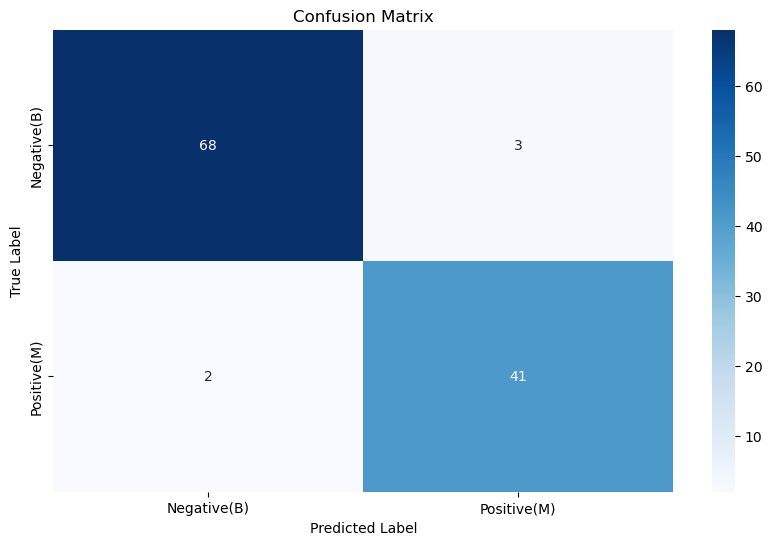

In [47]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative(B)', 'Positive(M)'], 
            yticklabels=['Negative(B)', 'Positive(M)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(knn, X_train_scaled, y_train_en.ravel(), cv=10, scoring='accuracy')))
cross_val_score(knn, X_train_scaled, y_train_en.ravel(), cv=10, scoring='accuracy')

0.9736231884057972


array([1.        , 0.97826087, 0.97826087, 0.91304348, 1.        ,
       1.        , 0.97777778, 0.97777778, 0.97777778, 0.93333333])

In [102]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Try different random_state values and evaluate using cross-validation
best_score = 0
best_random_state = None

for state in range(50):  # Try different random_state values (from 0 to 9)
    # Define the cross-validation strategy with random_state
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=state)
    
    # Perform cross-validation using cross_val_score
    scores = cross_val_score(knn, X_train_scaled,y_train_en.ravel(), cv=cv, scoring='accuracy')
    
    # Calculate the mean accuracy score for this random_state
    mean_score = np.mean(scores)
    
    print(f"Random state {state}: Mean accuracy = {mean_score:.4f}")
    
    # If the current random_state gives a better result, save it
    if mean_score > best_score:
        best_score = mean_score
        best_random_state = state

# Print the best random_state and its corresponding accuracy
print(f"\nBest random_state: {best_random_state} with mean accuracy = {best_score:.4f}")

Random state 0: Mean accuracy = 0.9758
Random state 1: Mean accuracy = 0.9671
Random state 2: Mean accuracy = 0.9737
Random state 3: Mean accuracy = 0.9715
Random state 4: Mean accuracy = 0.9691
Random state 5: Mean accuracy = 0.9735
Random state 6: Mean accuracy = 0.9736
Random state 7: Mean accuracy = 0.9736
Random state 8: Mean accuracy = 0.9737
Random state 9: Mean accuracy = 0.9692
Random state 10: Mean accuracy = 0.9715
Random state 11: Mean accuracy = 0.9735
Random state 12: Mean accuracy = 0.9715
Random state 13: Mean accuracy = 0.9694
Random state 14: Mean accuracy = 0.9714
Random state 15: Mean accuracy = 0.9734
Random state 16: Mean accuracy = 0.9693
Random state 17: Mean accuracy = 0.9737
Random state 18: Mean accuracy = 0.9737
Random state 19: Mean accuracy = 0.9779
Random state 20: Mean accuracy = 0.9715
Random state 21: Mean accuracy = 0.9736
Random state 22: Mean accuracy = 0.9714
Random state 23: Mean accuracy = 0.9735
Random state 24: Mean accuracy = 0.9692
Random sta